<a href="https://colab.research.google.com/github/conanak/Dataset-TikiBook/blob/main/Databooktiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import library

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
from PIL import Image
import matplotlib.pyplot as plt


plt.style.use("seaborn-v0_8-poster")
plt.rcParams['figure.figsize'] = (13, 7)

Crawl book id

In [ ]:
import requests
import time
import random
import pandas as pd

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'vi-VN,vi;q=0.9,en-US;q=0.8,en;q=0.7',
    'Referer': 'https://tiki.vn/sach-truyen-tieng-viet/c316?sort=top_seller',
    'x-guest-token': '8jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY',
    'Connection': 'keep-alive',
    'TE': 'Trailers',
}

params = {
    'limit': '40',
    'include': 'advertisement',
    'aggregations': '2',
    'trackity_id': 'ffb8e445-358f-8742-b7fb-f4d454a4d69e',
    'category': '316',
    'page': '1',
    'sort': 'top_seller',
    'src': 'c1883',
    'urlKey': 'sach-truyen-tieng-viet',
}

product_id = []

for i in range(1, 51):
    params['page'] = i
    response = requests.get('https://tiki.vn/api/personalish/v1/blocks/listings', headers=headers, params=params)
    if response.status_code == 200:
        print(f'Page {i} crawled successfully!')
        for record in response.json().get('data'):
            product_id.append({'id': record.get('id')})
    time.sleep(random.randrange(3, 10))

df = pd.DataFrame(product_id)
df.to_csv('book_id.csv', index=False)

Page 1 crawled successfully!
Page 2 crawled successfully!
Page 3 crawled successfully!
Page 4 crawled successfully!
Page 5 crawled successfully!
Page 6 crawled successfully!
Page 7 crawled successfully!
Page 8 crawled successfully!
Page 9 crawled successfully!
Page 10 crawled successfully!
Page 11 crawled successfully!
Page 12 crawled successfully!
Page 13 crawled successfully!
Page 14 crawled successfully!
Page 15 crawled successfully!
Page 16 crawled successfully!
Page 17 crawled successfully!
Page 18 crawled successfully!
Page 19 crawled successfully!
Page 20 crawled successfully!
Page 21 crawled successfully!
Page 22 crawled successfully!
Page 23 crawled successfully!
Page 24 crawled successfully!
Page 25 crawled successfully!
Page 26 crawled successfully!
Page 27 crawled successfully!
Page 28 crawled successfully!
Page 29 crawled successfully!
Page 30 crawled successfully!
Page 31 crawled successfully!
Page 32 crawled successfully!
Page 33 crawled successfully!
Page 34 crawled suc

Crawl Book Data

In [ ]:
import requests
import time
import random
import pandas as pd
from tqdm import tqdm
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'vi-VN,vi;q=0.9,en-US;q=0.8,en;q=0.7',
    'Referer': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'x-guest-token': '8jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY',
    'Connection': 'keep-alive',
    'TE': 'Trailers',
}

params = (
    ('platform', 'web'),
    ('spid', 74021318)
    #('include', 'tag,images,gallery,promotions,badges,stock_item,variants,product_links,discount_tag,ranks,breadcrumbs,top_features,cta_desktop'),
)

def parser_product(json):
    d = dict()
    d['title'] = json.get('name')

    # Get author(s)
    try:
        d['authors'] = json.get('authors')[0].get('name')
    except:
        d['authors'] = ""
    d['original_price'] = json.get('original_price')
    d['current_price'] = json.get('current_seller').get('price')
    d['quantity'] = json.get('all_time_quantity_sold')
    d['catagory'] = json.get('breadcrumbs')[3].get('name')
    d['n_review'] = json.get('review_count')
    d['avg_rating'] = json.get('rating_average')

    # Get number of pages
    d['pages'] = ""
    for i in range(15):
        try:
            if json.get('specifications')[0].get('attributes')[i].get('code')  == 'number_of_page':
                d['pages'] = json.get('specifications')[0].get('attributes')[i].get('value')
                break
        except:
            continue

    # Get publisher
    d['manufacturer'] = ""
    for i in range(15):
        try:
            if json.get('specifications')[0].get('attributes')[i].get('code') == 'manufacturer':
                d['manufacturer'] = json.get('specifications')[0].get('attributes')[i].get('value')
                break
        except:
            continue

    # Get cover_link
    try:
        d['cover_link'] = json.get('images')[1].get('base_url')
    except:
        d['cover_link'] = json.get('images')[0].get('base_url')

    return d


df_id = pd.read_csv('book_id.csv')
p_ids = df_id.id.to_list()
print(p_ids)
result = []
for pid in tqdm(p_ids, total=len(p_ids)):
    try:
        response = requests.get('https://tiki.vn/api/v2/products/{}'.format(pid), headers=headers, params=params)
        if response.status_code == 200:
            print('Crawling product id {} successful!'.format(pid))
            result.append(parser_product(response.json()))
    except:
        continue
df_product = pd.DataFrame(result)
df_product.to_csv('crawled_book_data.csv', index=False)

[262977989, 275025208, 270546273, 262590428, 275599939, 190843478, 271379451, 273844986, 49002009, 263070154, 275264393, 170708233, 175845415, 274363543, 52789367, 272000024, 74021317, 3954355, 187827003, 3304875, 57815506, 157432544, 275905229, 275613236, 52788072, 13419678, 186265449, 272449818, 202879294, 249875170, 214186189, 247858753, 95289208, 273819808, 274649745, 271380890, 26114399, 274031576, 274546151, 4780917, 54266567, 199216988, 276075631, 73787185, 140416370, 275406600, 10005245, 270114030, 66619715, 117238177, 10095276, 273114488, 145288029, 3639597, 275702538, 190238356, 114937969, 139303869, 68585576, 275408103, 161008715, 249875150, 58695343, 273844978, 253360429, 275945034, 275044457, 161310103, 79672197, 42230121, 85923342, 50322710, 275717681, 76013378, 275882937, 103379147, 107802183, 55319105, 19792256, 109017985, 184419723, 35191892, 57325187, 276019606, 147920903, 225912339, 275793521, 271118010, 555504, 8886007, 95218451, 275624199, 275580767, 189643105, 195

  0%|          | 1/2000 [00:00<03:47,  8.77it/s]

Crawling product id 262977989 successful!
Crawling product id 275025208 successful!


  0%|          | 4/2000 [00:00<07:02,  4.72it/s]

Crawling product id 270546273 successful!
Crawling product id 262590428 successful!


  0%|          | 5/2000 [00:00<06:14,  5.33it/s]

Crawling product id 275599939 successful!


  0%|          | 6/2000 [00:01<09:31,  3.49it/s]

Crawling product id 190843478 successful!


  0%|          | 7/2000 [00:01<11:46,  2.82it/s]

Crawling product id 271379451 successful!


  0%|          | 9/2000 [00:02<10:46,  3.08it/s]

Crawling product id 273844986 successful!
Crawling product id 49002009 successful!


  0%|          | 10/2000 [00:02<10:51,  3.05it/s]

Crawling product id 263070154 successful!


  1%|          | 12/2000 [00:03<09:52,  3.36it/s]

Crawling product id 275264393 successful!
Crawling product id 170708233 successful!


  1%|          | 13/2000 [00:04<11:51,  2.79it/s]

Crawling product id 175845415 successful!
Crawling product id 274363543 successful!


  1%|          | 15/2000 [00:04<10:06,  3.27it/s]

Crawling product id 52789367 successful!
Crawling product id 272000024 successful!


  1%|          | 18/2000 [00:05<08:12,  4.02it/s]

Crawling product id 74021317 successful!
Crawling product id 3954355 successful!


  1%|          | 20/2000 [00:05<07:58,  4.14it/s]

Crawling product id 187827003 successful!
Crawling product id 3304875 successful!


  1%|          | 21/2000 [00:06<10:18,  3.20it/s]

Crawling product id 57815506 successful!
Crawling product id 157432544 successful!


  1%|          | 24/2000 [00:06<07:57,  4.14it/s]

Crawling product id 275905229 successful!
Crawling product id 275613236 successful!


  1%|▏         | 25/2000 [00:06<06:52,  4.79it/s]

Crawling product id 52788072 successful!


  1%|▏         | 26/2000 [00:07<07:31,  4.37it/s]

Crawling product id 13419678 successful!


  1%|▏         | 27/2000 [00:07<07:18,  4.50it/s]

Crawling product id 186265449 successful!
Crawling product id 272449818 successful!


  1%|▏         | 29/2000 [00:07<06:13,  5.27it/s]

Crawling product id 202879294 successful!


  2%|▏         | 30/2000 [00:08<07:03,  4.65it/s]

Crawling product id 249875170 successful!


  2%|▏         | 32/2000 [00:08<07:57,  4.12it/s]

Crawling product id 214186189 successful!
Crawling product id 247858753 successful!
Crawling product id 95289208 successful!


  2%|▏         | 34/2000 [00:09<08:57,  3.66it/s]

Crawling product id 273819808 successful!


  2%|▏         | 36/2000 [00:09<09:18,  3.52it/s]

Crawling product id 274649745 successful!
Crawling product id 271380890 successful!


  2%|▏         | 37/2000 [00:10<07:56,  4.12it/s]

Crawling product id 26114399 successful!


  2%|▏         | 38/2000 [00:10<10:54,  3.00it/s]

Crawling product id 274031576 successful!


  2%|▏         | 39/2000 [00:11<11:44,  2.78it/s]

Crawling product id 274546151 successful!


  2%|▏         | 41/2000 [00:11<10:18,  3.17it/s]

Crawling product id 4780917 successful!
Crawling product id 54266567 successful!


  2%|▏         | 42/2000 [00:11<08:57,  3.64it/s]

Crawling product id 199216988 successful!


  2%|▏         | 44/2000 [00:12<07:55,  4.12it/s]

Crawling product id 276075631 successful!
Crawling product id 73787185 successful!


  2%|▏         | 45/2000 [00:12<06:32,  4.98it/s]

Crawling product id 140416370 successful!


  2%|▏         | 47/2000 [00:12<07:42,  4.22it/s]

Crawling product id 275406600 successful!
Crawling product id 10005245 successful!


  2%|▏         | 48/2000 [00:13<10:00,  3.25it/s]

Crawling product id 270114030 successful!
Crawling product id 66619715 successful!


  2%|▎         | 50/2000 [00:14<09:56,  3.27it/s]

Crawling product id 117238177 successful!


  3%|▎         | 51/2000 [00:14<11:26,  2.84it/s]

Crawling product id 10095276 successful!


  3%|▎         | 53/2000 [00:15<10:12,  3.18it/s]

Crawling product id 273114488 successful!
Crawling product id 145288029 successful!


  3%|▎         | 55/2000 [00:15<09:34,  3.39it/s]

Crawling product id 3639597 successful!
Crawling product id 275702538 successful!


  3%|▎         | 56/2000 [00:15<07:47,  4.16it/s]

Crawling product id 190238356 successful!


  3%|▎         | 57/2000 [00:16<09:24,  3.44it/s]

Crawling product id 114937969 successful!


  3%|▎         | 58/2000 [00:16<11:15,  2.88it/s]

Crawling product id 139303869 successful!
Crawling product id 68585576 successful!


  3%|▎         | 61/2000 [00:17<08:50,  3.65it/s]

Crawling product id 275408103 successful!
Crawling product id 161008715 successful!


  3%|▎         | 63/2000 [00:17<07:59,  4.04it/s]

Crawling product id 249875150 successful!
Crawling product id 58695343 successful!


  3%|▎         | 64/2000 [00:18<10:38,  3.03it/s]

Crawling product id 273844978 successful!
Crawling product id 253360429 successful!


  3%|▎         | 67/2000 [00:19<07:59,  4.03it/s]

Crawling product id 275945034 successful!
Crawling product id 275044457 successful!


  3%|▎         | 69/2000 [00:19<07:27,  4.32it/s]

Crawling product id 161310103 successful!
Crawling product id 79672197 successful!


  4%|▎         | 70/2000 [00:19<06:31,  4.92it/s]

Crawling product id 42230121 successful!


  4%|▎         | 71/2000 [00:20<07:11,  4.47it/s]

Crawling product id 85923342 successful!


  4%|▎         | 73/2000 [00:20<07:51,  4.08it/s]

Crawling product id 50322710 successful!
Crawling product id 275717681 successful!


  4%|▎         | 74/2000 [00:20<06:29,  4.94it/s]

Crawling product id 76013378 successful!


  4%|▍         | 75/2000 [00:21<08:12,  3.91it/s]

Crawling product id 275882937 successful!


  4%|▍         | 76/2000 [00:21<10:37,  3.02it/s]

Crawling product id 103379147 successful!


  4%|▍         | 78/2000 [00:22<09:44,  3.29it/s]

Crawling product id 107802183 successful!
Crawling product id 55319105 successful!


  4%|▍         | 79/2000 [00:22<11:36,  2.76it/s]

Crawling product id 19792256 successful!


  4%|▍         | 80/2000 [00:23<12:46,  2.50it/s]

Crawling product id 109017985 successful!


  4%|▍         | 81/2000 [00:23<13:40,  2.34it/s]

Crawling product id 184419723 successful!
Crawling product id 35191892 successful!


  4%|▍         | 83/2000 [00:23<08:53,  3.59it/s]

Crawling product id 57325187 successful!


  4%|▍         | 85/2000 [00:24<08:29,  3.76it/s]

Crawling product id 276019606 successful!
Crawling product id 147920903 successful!


  4%|▍         | 86/2000 [00:24<10:25,  3.06it/s]

Crawling product id 225912339 successful!
Crawling product id 275793521 successful!


  4%|▍         | 89/2000 [00:25<08:38,  3.69it/s]

Crawling product id 271118010 successful!
Crawling product id 555504 successful!


  5%|▍         | 91/2000 [00:26<08:35,  3.70it/s]

Crawling product id 8886007 successful!
Crawling product id 95218451 successful!


  5%|▍         | 93/2000 [00:26<08:27,  3.76it/s]

Crawling product id 275624199 successful!
Crawling product id 275580767 successful!


  5%|▍         | 95/2000 [00:27<07:57,  3.99it/s]

Crawling product id 189643105 successful!
Crawling product id 195291930 successful!


  5%|▍         | 96/2000 [00:27<10:14,  3.10it/s]

Crawling product id 14453314 successful!


  5%|▍         | 97/2000 [00:28<11:58,  2.65it/s]

Crawling product id 185909452 successful!


  5%|▍         | 98/2000 [00:28<12:53,  2.46it/s]

Crawling product id 262523000 successful!
Crawling product id 186876107 successful!


  5%|▌         | 101/2000 [00:29<09:39,  3.28it/s]

Crawling product id 161008717 successful!
Crawling product id 32490132 successful!
Crawling product id 276034377 successful!


  5%|▌         | 103/2000 [00:30<09:30,  3.33it/s]

Crawling product id 157255752 successful!


  5%|▌         | 105/2000 [00:30<09:06,  3.47it/s]

Crawling product id 275886508 successful!
Crawling product id 272349560 successful!
Crawling product id 275188029 successful!


  5%|▌         | 108/2000 [00:31<07:26,  4.24it/s]

Crawling product id 243223577 successful!
Crawling product id 16284286 successful!


  5%|▌         | 109/2000 [00:31<06:38,  4.75it/s]

Crawling product id 275789810 successful!


  6%|▌         | 110/2000 [00:31<06:58,  4.52it/s]

Crawling product id 261982682 successful!


  6%|▌         | 112/2000 [00:32<05:59,  5.25it/s]

Crawling product id 15267827 successful!
Crawling product id 7833728 successful!


  6%|▌         | 114/2000 [00:32<07:07,  4.41it/s]

Crawling product id 174842858 successful!
Crawling product id 75307228 successful!
Crawling product id 275140709 successful!


  6%|▌         | 116/2000 [00:33<08:07,  3.87it/s]

Crawling product id 68049234 successful!
Crawling product id 51574033 successful!


  6%|▌         | 118/2000 [00:33<08:19,  3.76it/s]

Crawling product id 273346856 successful!


  6%|▌         | 119/2000 [00:34<09:29,  3.30it/s]

Crawling product id 274120615 successful!
Crawling product id 274936522 successful!


  6%|▌         | 122/2000 [00:34<06:35,  4.74it/s]

Crawling product id 195545304 successful!
Crawling product id 274466425 successful!


  6%|▌         | 124/2000 [00:34<05:27,  5.72it/s]

Crawling product id 273717706 successful!
Crawling product id 194960730 successful!


  6%|▋         | 126/2000 [00:35<04:49,  6.47it/s]

Crawling product id 188940817 successful!
Crawling product id 49910019 successful!


  6%|▋         | 128/2000 [00:35<04:20,  7.18it/s]

Crawling product id 273457566 successful!
Crawling product id 207841114 successful!


  6%|▋         | 130/2000 [00:35<04:12,  7.42it/s]

Crawling product id 205942263 successful!
Crawling product id 275178313 successful!


  7%|▋         | 132/2000 [00:35<04:04,  7.63it/s]

Crawling product id 207946236 successful!
Crawling product id 152875147 successful!


  7%|▋         | 134/2000 [00:36<03:59,  7.80it/s]

Crawling product id 2619499 successful!
Crawling product id 52329763 successful!


  7%|▋         | 136/2000 [00:36<03:57,  7.84it/s]

Crawling product id 275975628 successful!
Crawling product id 121635152 successful!


  7%|▋         | 138/2000 [00:36<03:58,  7.81it/s]

Crawling product id 111070969 successful!
Crawling product id 190335975 successful!


  7%|▋         | 140/2000 [00:36<03:52,  7.99it/s]

Crawling product id 252385478 successful!
Crawling product id 274845354 successful!


  7%|▋         | 142/2000 [00:37<03:51,  8.03it/s]

Crawling product id 201845361 successful!
Crawling product id 275736784 successful!


  7%|▋         | 144/2000 [00:37<03:55,  7.88it/s]

Crawling product id 192475873 successful!
Crawling product id 271337379 successful!


  7%|▋         | 146/2000 [00:37<03:53,  7.95it/s]

Crawling product id 275251807 successful!
Crawling product id 247446852 successful!


  7%|▋         | 148/2000 [00:38<03:59,  7.72it/s]

Crawling product id 49317816 successful!
Crawling product id 154245455 successful!


  8%|▊         | 150/2000 [00:38<03:58,  7.75it/s]

Crawling product id 147999778 successful!
Crawling product id 1926761 successful!


  8%|▊         | 152/2000 [00:38<03:57,  7.78it/s]

Crawling product id 250335067 successful!
Crawling product id 52584834 successful!


  8%|▊         | 154/2000 [00:38<04:00,  7.66it/s]

Crawling product id 199030585 successful!
Crawling product id 94173458 successful!


  8%|▊         | 156/2000 [00:39<04:01,  7.65it/s]

Crawling product id 275955976 successful!
Crawling product id 120219394 successful!


  8%|▊         | 158/2000 [00:39<04:01,  7.63it/s]

Crawling product id 12107394 successful!
Crawling product id 273910316 successful!


  8%|▊         | 160/2000 [00:39<03:58,  7.72it/s]

Crawling product id 209349142 successful!
Crawling product id 176909221 successful!


  8%|▊         | 162/2000 [00:39<04:03,  7.55it/s]

Crawling product id 249374002 successful!
Crawling product id 17336364 successful!


  8%|▊         | 164/2000 [00:40<04:09,  7.35it/s]

Crawling product id 273119666 successful!
Crawling product id 12138656 successful!


  8%|▊         | 166/2000 [00:40<04:01,  7.59it/s]

Crawling product id 273119477 successful!
Crawling product id 112110014 successful!


  8%|▊         | 168/2000 [00:40<03:55,  7.78it/s]

Crawling product id 158019964 successful!
Crawling product id 274824605 successful!


  8%|▊         | 170/2000 [00:40<03:48,  8.02it/s]

Crawling product id 12377498 successful!
Crawling product id 111285062 successful!


  9%|▊         | 172/2000 [00:41<03:53,  7.82it/s]

Crawling product id 7718737 successful!
Crawling product id 273534078 successful!


  9%|▊         | 174/2000 [00:41<03:57,  7.70it/s]

Crawling product id 274937556 successful!
Crawling product id 90056907 successful!


  9%|▉         | 176/2000 [00:41<03:49,  7.94it/s]

Crawling product id 267208813 successful!
Crawling product id 275993133 successful!


  9%|▉         | 178/2000 [00:41<03:45,  8.08it/s]

Crawling product id 274940913 successful!
Crawling product id 260811707 successful!


  9%|▉         | 180/2000 [00:42<03:45,  8.06it/s]

Crawling product id 155550591 successful!
Crawling product id 72459686 successful!


  9%|▉         | 182/2000 [00:42<03:51,  7.86it/s]

Crawling product id 275786407 successful!
Crawling product id 153045603 successful!


  9%|▉         | 184/2000 [00:42<03:51,  7.84it/s]

Crawling product id 186286187 successful!
Crawling product id 275251664 successful!


  9%|▉         | 186/2000 [00:42<03:58,  7.60it/s]

Crawling product id 335337 successful!
Crawling product id 206678865 successful!


  9%|▉         | 188/2000 [00:43<03:54,  7.74it/s]

Crawling product id 13446508 successful!
Crawling product id 271317275 successful!


 10%|▉         | 190/2000 [00:43<03:50,  7.86it/s]

Crawling product id 57762732 successful!
Crawling product id 40933971 successful!


 10%|▉         | 192/2000 [00:43<03:44,  8.07it/s]

Crawling product id 275907750 successful!
Crawling product id 56365400 successful!


 10%|▉         | 194/2000 [00:43<03:47,  7.93it/s]

Crawling product id 73207240 successful!
Crawling product id 275580341 successful!


 10%|▉         | 196/2000 [00:44<03:51,  7.80it/s]

Crawling product id 243097256 successful!
Crawling product id 274937579 successful!


 10%|▉         | 198/2000 [00:44<03:52,  7.76it/s]

Crawling product id 66067655 successful!
Crawling product id 73878873 successful!


 10%|█         | 200/2000 [00:44<03:48,  7.89it/s]

Crawling product id 275269362 successful!
Crawling product id 135552451 successful!


 10%|█         | 202/2000 [00:44<03:50,  7.81it/s]

Crawling product id 54748899 successful!
Crawling product id 1702825 successful!


 10%|█         | 204/2000 [00:45<03:47,  7.90it/s]

Crawling product id 48481763 successful!
Crawling product id 11508322 successful!


 10%|█         | 206/2000 [00:45<03:41,  8.11it/s]

Crawling product id 274936903 successful!
Crawling product id 10581200 successful!


 10%|█         | 208/2000 [00:45<03:46,  7.93it/s]

Crawling product id 73207098 successful!
Crawling product id 275335272 successful!


 10%|█         | 210/2000 [00:45<03:41,  8.10it/s]

Crawling product id 72308265 successful!
Crawling product id 82912488 successful!


 11%|█         | 212/2000 [00:47<10:03,  2.96it/s]

Crawling product id 100931418 successful!
Crawling product id 273333606 successful!


 11%|█         | 214/2000 [00:47<06:47,  4.38it/s]

Crawling product id 100958457 successful!
Crawling product id 10227722 successful!


 11%|█         | 216/2000 [00:47<05:09,  5.77it/s]

Crawling product id 272392514 successful!
Crawling product id 40933969 successful!


 11%|█         | 218/2000 [00:47<04:27,  6.67it/s]

Crawling product id 210277880 successful!
Crawling product id 271337381 successful!


 11%|█         | 220/2000 [00:48<04:02,  7.34it/s]

Crawling product id 275946550 successful!
Crawling product id 272367381 successful!


 11%|█         | 222/2000 [00:48<03:52,  7.63it/s]

Crawling product id 275625159 successful!
Crawling product id 171212880 successful!


 11%|█         | 224/2000 [00:48<03:52,  7.64it/s]

Crawling product id 275907782 successful!
Crawling product id 76776245 successful!


 11%|█▏        | 226/2000 [00:48<03:41,  8.02it/s]

Crawling product id 242424688 successful!
Crawling product id 158019962 successful!


 11%|█▏        | 228/2000 [00:49<03:48,  7.77it/s]

Crawling product id 275276809 successful!
Crawling product id 229714486 successful!


 12%|█▏        | 230/2000 [00:49<03:47,  7.78it/s]

Crawling product id 275157720 successful!
Crawling product id 275611833 successful!


 12%|█▏        | 232/2000 [00:49<03:43,  7.90it/s]

Crawling product id 194960744 successful!
Crawling product id 750578 successful!


 12%|█▏        | 234/2000 [00:49<03:42,  7.93it/s]

Crawling product id 153518797 successful!
Crawling product id 274876038 successful!


 12%|█▏        | 236/2000 [00:50<03:39,  8.02it/s]

Crawling product id 275243138 successful!
Crawling product id 117254517 successful!


 12%|█▏        | 238/2000 [00:50<03:44,  7.85it/s]

Crawling product id 195801321 successful!
Crawling product id 59262880 successful!


 12%|█▏        | 240/2000 [00:50<03:49,  7.66it/s]

Crawling product id 274557494 successful!
Crawling product id 86517373 successful!


 12%|█▏        | 242/2000 [00:51<03:48,  7.68it/s]

Crawling product id 274724185 successful!
Crawling product id 253237308 successful!


 12%|█▏        | 244/2000 [00:51<03:49,  7.64it/s]

Crawling product id 275251480 successful!
Crawling product id 248930292 successful!


 12%|█▏        | 246/2000 [00:51<03:52,  7.54it/s]

Crawling product id 184070223 successful!
Crawling product id 105663942 successful!


 12%|█▏        | 248/2000 [00:51<03:52,  7.52it/s]

Crawling product id 106365090 successful!
Crawling product id 261151722 successful!


 12%|█▎        | 250/2000 [00:52<03:44,  7.79it/s]

Crawling product id 170298038 successful!
Crawling product id 100347901 successful!


 13%|█▎        | 252/2000 [00:52<03:45,  7.75it/s]

Crawling product id 10383904 successful!
Crawling product id 275243821 successful!


 13%|█▎        | 254/2000 [00:52<03:50,  7.57it/s]

Crawling product id 127844385 successful!
Crawling product id 260819797 successful!


 13%|█▎        | 256/2000 [00:52<03:54,  7.44it/s]

Crawling product id 263210029 successful!
Crawling product id 95311757 successful!


 13%|█▎        | 258/2000 [00:53<03:53,  7.45it/s]

Crawling product id 136340700 successful!
Crawling product id 220665663 successful!


 13%|█▎        | 260/2000 [00:53<03:50,  7.56it/s]

Crawling product id 74341297 successful!
Crawling product id 44976191 successful!


 13%|█▎        | 262/2000 [00:53<03:47,  7.63it/s]

Crawling product id 271916321 successful!
Crawling product id 143217512 successful!


 13%|█▎        | 264/2000 [00:53<03:44,  7.72it/s]

Crawling product id 9729890 successful!
Crawling product id 74460137 successful!


 13%|█▎        | 266/2000 [00:54<03:37,  7.96it/s]

Crawling product id 249178401 successful!
Crawling product id 273732354 successful!


 13%|█▎        | 268/2000 [00:54<03:44,  7.73it/s]

Crawling product id 71345381 successful!
Crawling product id 177637709 successful!


 14%|█▎        | 270/2000 [00:54<03:46,  7.62it/s]

Crawling product id 273321955 successful!
Crawling product id 205581885 successful!


 14%|█▎        | 272/2000 [00:54<03:42,  7.77it/s]

Crawling product id 76105910 successful!
Crawling product id 274941606 successful!


 14%|█▎        | 274/2000 [00:55<03:37,  7.95it/s]

Crawling product id 124767704 successful!
Crawling product id 195624160 successful!


 14%|█▍        | 276/2000 [00:55<03:37,  7.92it/s]

Crawling product id 190843397 successful!
Crawling product id 274498228 successful!


 14%|█▍        | 278/2000 [00:55<03:33,  8.06it/s]

Crawling product id 540040 successful!
Crawling product id 207256575 successful!


 14%|█▍        | 280/2000 [00:55<03:35,  7.97it/s]

Crawling product id 206840682 successful!
Crawling product id 3082815 successful!


 14%|█▍        | 282/2000 [00:56<03:34,  8.02it/s]

Crawling product id 273316208 successful!
Crawling product id 275732951 successful!


 14%|█▍        | 284/2000 [00:56<03:28,  8.22it/s]

Crawling product id 57325189 successful!
Crawling product id 168283405 successful!


 14%|█▍        | 286/2000 [00:56<03:34,  8.01it/s]

Crawling product id 197657913 successful!
Crawling product id 274937448 successful!


 14%|█▍        | 288/2000 [00:56<03:38,  7.82it/s]

Crawling product id 274171942 successful!
Crawling product id 275793457 successful!


 14%|█▍        | 290/2000 [00:57<03:41,  7.71it/s]

Crawling product id 248541389 successful!
Crawling product id 104074997 successful!


 15%|█▍        | 292/2000 [00:57<03:40,  7.74it/s]

Crawling product id 10397241 successful!
Crawling product id 77982982 successful!


 15%|█▍        | 294/2000 [00:57<03:37,  7.84it/s]

Crawling product id 271537839 successful!
Crawling product id 2496281 successful!


 15%|█▍        | 296/2000 [00:57<03:35,  7.92it/s]

Crawling product id 275386898 successful!
Crawling product id 7369223 successful!


 15%|█▍        | 298/2000 [00:58<03:31,  8.05it/s]

Crawling product id 41299108 successful!
Crawling product id 7982628 successful!


 15%|█▌        | 300/2000 [00:58<03:45,  7.52it/s]

Crawling product id 275698427 successful!
Crawling product id 49722650 successful!


 15%|█▌        | 302/2000 [00:58<03:41,  7.66it/s]

Crawling product id 275576878 successful!
Crawling product id 54614797 successful!


 15%|█▌        | 304/2000 [00:58<03:37,  7.78it/s]

Crawling product id 275138977 successful!
Crawling product id 52749673 successful!


 15%|█▌        | 306/2000 [00:59<03:36,  7.82it/s]

Crawling product id 76013370 successful!
Crawling product id 274844704 successful!


 15%|█▌        | 308/2000 [00:59<03:37,  7.79it/s]

Crawling product id 274634502 successful!
Crawling product id 204051994 successful!


 15%|█▌        | 309/2000 [00:59<03:26,  8.19it/s]

Crawling product id 214186191 successful!


 16%|█▌        | 311/2000 [01:00<05:29,  5.12it/s]

Crawling product id 78015053 successful!
Crawling product id 214493090 successful!
Crawling product id 275849380 successful!


 16%|█▌        | 313/2000 [01:00<06:50,  4.11it/s]

Crawling product id 52805060 successful!


 16%|█▌        | 314/2000 [01:01<08:41,  3.23it/s]

Crawling product id 69764541 successful!


 16%|█▌        | 315/2000 [01:01<09:59,  2.81it/s]

Crawling product id 249960247 successful!
Crawling product id 275286273 successful!


 16%|█▌        | 317/2000 [01:02<08:45,  3.20it/s]

Crawling product id 271808190 successful!


 16%|█▌        | 319/2000 [01:02<08:15,  3.39it/s]

Crawling product id 275332762 successful!
Crawling product id 66712456 successful!
Crawling product id 108501279 successful!


 16%|█▌        | 321/2000 [01:03<08:18,  3.37it/s]

Crawling product id 129381098 successful!


 16%|█▌        | 322/2000 [01:04<09:37,  2.90it/s]

Crawling product id 275972360 successful!
Crawling product id 87959748 successful!


 16%|█▋        | 325/2000 [01:04<07:25,  3.76it/s]

Crawling product id 274940712 successful!
Crawling product id 48629535 successful!


 16%|█▋        | 326/2000 [01:04<06:22,  4.38it/s]

Crawling product id 66090079 successful!


 16%|█▋        | 328/2000 [01:05<05:39,  4.92it/s]

Crawling product id 99513994 successful!
Crawling product id 110448022 successful!


 16%|█▋        | 329/2000 [01:05<07:51,  3.54it/s]

Crawling product id 274168273 successful!
Crawling product id 274937088 successful!


 17%|█▋        | 331/2000 [01:06<08:03,  3.45it/s]

Crawling product id 44433397 successful!


 17%|█▋        | 332/2000 [01:06<09:33,  2.91it/s]

Crawling product id 274411010 successful!


 17%|█▋        | 333/2000 [01:07<10:34,  2.63it/s]

Crawling product id 270835318 successful!


 17%|█▋        | 335/2000 [01:07<09:56,  2.79it/s]

Crawling product id 270113892 successful!
Crawling product id 274404957 successful!


 17%|█▋        | 338/2000 [01:08<06:15,  4.42it/s]

Crawling product id 85396163 successful!
Crawling product id 72667834 successful!
Crawling product id 275625149 successful!


 17%|█▋        | 340/2000 [01:08<06:14,  4.43it/s]

Crawling product id 176909246 successful!
Crawling product id 113530805 successful!


 17%|█▋        | 342/2000 [01:09<06:22,  4.33it/s]

Crawling product id 179546078 successful!
Crawling product id 146223395 successful!


 17%|█▋        | 344/2000 [01:10<07:06,  3.88it/s]

Crawling product id 275452495 successful!
Crawling product id 253365659 successful!


 17%|█▋        | 345/2000 [01:10<08:36,  3.21it/s]

Crawling product id 187843291 successful!
Crawling product id 76388962 successful!


 17%|█▋        | 348/2000 [01:11<07:00,  3.93it/s]

Crawling product id 275421986 successful!
Crawling product id 193099631 successful!


 17%|█▋        | 349/2000 [01:11<05:59,  4.60it/s]

Crawling product id 275358557 successful!


 18%|█▊        | 351/2000 [01:11<05:27,  5.03it/s]

Crawling product id 20917699 successful!
Crawling product id 271288184 successful!


 18%|█▊        | 352/2000 [01:12<07:55,  3.47it/s]

Crawling product id 8835165 successful!
Crawling product id 146225297 successful!


 18%|█▊        | 354/2000 [01:12<07:27,  3.68it/s]

Crawling product id 138107485 successful!


 18%|█▊        | 355/2000 [01:13<08:56,  3.06it/s]

Crawling product id 8886001 successful!


 18%|█▊        | 357/2000 [01:13<08:16,  3.31it/s]

Crawling product id 272854044 successful!
Crawling product id 275909699 successful!


 18%|█▊        | 359/2000 [01:14<07:23,  3.70it/s]

Crawling product id 93249197 successful!
Crawling product id 270660514 successful!


 18%|█▊        | 361/2000 [01:14<06:34,  4.15it/s]

Crawling product id 638185 successful!
Crawling product id 76227487 successful!


 18%|█▊        | 363/2000 [01:15<06:23,  4.27it/s]

Crawling product id 35283863 successful!
Crawling product id 253398071 successful!


 18%|█▊        | 364/2000 [01:15<05:22,  5.08it/s]

Crawling product id 273612269 successful!


 18%|█▊        | 366/2000 [01:15<05:48,  4.69it/s]

Crawling product id 275243125 successful!
Crawling product id 204000450 successful!


 18%|█▊        | 367/2000 [01:16<08:09,  3.34it/s]

Crawling product id 273708841 successful!


 18%|█▊        | 369/2000 [01:17<07:48,  3.48it/s]

Crawling product id 143185998 successful!
Crawling product id 66698344 successful!


 18%|█▊        | 370/2000 [01:17<06:18,  4.30it/s]

Crawling product id 274807860 successful!


 19%|█▊        | 372/2000 [01:17<06:12,  4.36it/s]

Crawling product id 275457497 successful!
Crawling product id 107331062 successful!


 19%|█▊        | 373/2000 [01:18<08:23,  3.23it/s]

Crawling product id 273250376 successful!
Crawling product id 275519059 successful!


 19%|█▉        | 375/2000 [01:18<05:52,  4.61it/s]

Crawling product id 275625701 successful!


 19%|█▉        | 376/2000 [01:18<07:00,  3.86it/s]

Crawling product id 275697613 successful!


 19%|█▉        | 377/2000 [01:19<08:41,  3.11it/s]

Crawling product id 275128754 successful!


 19%|█▉        | 378/2000 [01:19<10:08,  2.67it/s]

Crawling product id 50475521 successful!


 19%|█▉        | 379/2000 [01:20<10:53,  2.48it/s]

Crawling product id 270854210 successful!
Crawling product id 205010298 successful!


 19%|█▉        | 382/2000 [01:20<08:00,  3.37it/s]

Crawling product id 214186194 successful!
Crawling product id 49747007 successful!


 19%|█▉        | 383/2000 [01:21<08:41,  3.10it/s]

Crawling product id 52004412 successful!
Crawling product id 198415069 successful!


 19%|█▉        | 386/2000 [01:21<06:46,  3.97it/s]

Crawling product id 185067342 successful!
Crawling product id 104611536 successful!


 19%|█▉        | 387/2000 [01:22<08:15,  3.26it/s]

Crawling product id 11368983 successful!
Crawling product id 275737930 successful!


 20%|█▉        | 390/2000 [01:23<07:01,  3.82it/s]

Crawling product id 4080373 successful!
Crawling product id 69644748 successful!


 20%|█▉        | 392/2000 [01:23<06:28,  4.14it/s]

Crawling product id 275770170 successful!
Crawling product id 55119955 successful!


 20%|█▉        | 393/2000 [01:23<05:27,  4.91it/s]

Crawling product id 273314953 successful!


 20%|█▉        | 394/2000 [01:24<07:03,  3.79it/s]

Crawling product id 109765020 successful!
Crawling product id 75615273 successful!


 20%|█▉        | 396/2000 [01:24<07:32,  3.54it/s]

Crawling product id 22634335 successful!


 20%|█▉        | 398/2000 [01:25<07:28,  3.57it/s]

Crawling product id 273355903 successful!
Crawling product id 112825941 successful!


 20%|█▉        | 399/2000 [01:25<09:02,  2.95it/s]

Crawling product id 80141527 successful!


 20%|██        | 400/2000 [01:26<10:18,  2.59it/s]

Crawling product id 185242031 successful!
Crawling product id 51215567 successful!


 20%|██        | 402/2000 [01:26<07:08,  3.73it/s]

Crawling product id 275105974 successful!


 20%|██        | 403/2000 [01:26<07:02,  3.78it/s]

Crawling product id 127654479 successful!


 20%|██        | 404/2000 [01:27<06:40,  3.98it/s]

Crawling product id 205148094 successful!


 20%|██        | 406/2000 [01:27<05:46,  4.60it/s]

Crawling product id 214490418 successful!
Crawling product id 1667307 successful!


 20%|██        | 407/2000 [01:27<07:09,  3.71it/s]

Crawling product id 139567621 successful!


 20%|██        | 408/2000 [01:28<09:19,  2.85it/s]

Crawling product id 270847918 successful!
Crawling product id 263109177 successful!


 21%|██        | 411/2000 [01:29<06:54,  3.83it/s]

Crawling product id 190605360 successful!
Crawling product id 56377195 successful!


 21%|██        | 413/2000 [01:29<06:24,  4.12it/s]

Crawling product id 121410060 successful!
Crawling product id 275834006 successful!


 21%|██        | 415/2000 [01:30<06:43,  3.92it/s]

Crawling product id 31509726 successful!
Crawling product id 109505434 successful!


 21%|██        | 416/2000 [01:30<08:38,  3.06it/s]

Crawling product id 1021663 successful!


 21%|██        | 418/2000 [01:31<07:46,  3.39it/s]

Crawling product id 274170471 successful!
Crawling product id 52329765 successful!


 21%|██        | 419/2000 [01:31<09:21,  2.82it/s]

Crawling product id 273418280 successful!
Crawling product id 124767703 successful!


 21%|██        | 422/2000 [01:32<07:12,  3.65it/s]

Crawling product id 58390336 successful!
Crawling product id 7953305 successful!
Crawling product id 275185548 successful!


 21%|██▏       | 425/2000 [01:33<05:55,  4.42it/s]

Crawling product id 275905148 successful!
Crawling product id 604295 successful!


 21%|██▏       | 426/2000 [01:33<07:37,  3.44it/s]

Crawling product id 275851249 successful!
Crawling product id 169377739 successful!


 21%|██▏       | 429/2000 [01:34<06:45,  3.88it/s]

Crawling product id 275251553 successful!
Crawling product id 111582631 successful!


 22%|██▏       | 431/2000 [01:34<05:12,  5.02it/s]

Crawling product id 274246275 successful!
Crawling product id 274940600 successful!


 22%|██▏       | 433/2000 [01:34<04:16,  6.11it/s]

Crawling product id 113583126 successful!
Crawling product id 270699871 successful!


 22%|██▏       | 435/2000 [01:35<03:49,  6.83it/s]

Crawling product id 262301191 successful!
Crawling product id 146988856 successful!


 22%|██▏       | 437/2000 [01:35<03:28,  7.50it/s]

Crawling product id 275923492 successful!
Crawling product id 200877611 successful!


 22%|██▏       | 439/2000 [01:35<03:24,  7.63it/s]

Crawling product id 40774181 successful!
Crawling product id 274772011 successful!


 22%|██▏       | 441/2000 [01:35<03:19,  7.82it/s]

Crawling product id 271096617 successful!
Crawling product id 169546325 successful!


 22%|██▏       | 443/2000 [01:36<03:15,  7.95it/s]

Crawling product id 207841177 successful!
Crawling product id 6915413 successful!


 22%|██▏       | 445/2000 [01:36<03:17,  7.87it/s]

Crawling product id 275942950 successful!
Crawling product id 275188071 successful!


 22%|██▏       | 447/2000 [01:36<03:13,  8.01it/s]

Crawling product id 274919182 successful!
Crawling product id 270745659 successful!


 22%|██▏       | 449/2000 [01:36<03:14,  7.98it/s]

Crawling product id 275025274 successful!
Crawling product id 184466860 successful!


 23%|██▎       | 451/2000 [01:37<03:13,  7.99it/s]

Crawling product id 84970841 successful!
Crawling product id 273426143 successful!


 23%|██▎       | 453/2000 [01:37<03:14,  7.96it/s]

Crawling product id 206837303 successful!
Crawling product id 53452969 successful!


 23%|██▎       | 455/2000 [01:37<03:17,  7.84it/s]

Crawling product id 73553846 successful!
Crawling product id 365780 successful!


 23%|██▎       | 457/2000 [01:37<03:17,  7.83it/s]

Crawling product id 272112002 successful!
Crawling product id 274801865 successful!


 23%|██▎       | 459/2000 [01:38<03:10,  8.10it/s]

Crawling product id 540039 successful!
Crawling product id 274953492 successful!


 23%|██▎       | 461/2000 [01:38<03:10,  8.07it/s]

Crawling product id 3737963 successful!
Crawling product id 178294073 successful!


 23%|██▎       | 463/2000 [01:38<03:12,  7.97it/s]

Crawling product id 210145959 successful!
Crawling product id 147058065 successful!


 23%|██▎       | 465/2000 [01:38<03:14,  7.90it/s]

Crawling product id 94878710 successful!
Crawling product id 203937562 successful!


 23%|██▎       | 467/2000 [01:39<03:16,  7.79it/s]

Crawling product id 212213013 successful!
Crawling product id 274928291 successful!


 23%|██▎       | 469/2000 [01:39<03:15,  7.84it/s]

Crawling product id 220669871 successful!
Crawling product id 251930952 successful!


 24%|██▎       | 471/2000 [01:39<03:13,  7.91it/s]

Crawling product id 275362670 successful!
Crawling product id 219148748 successful!


 24%|██▎       | 473/2000 [01:39<03:14,  7.83it/s]

Crawling product id 275843796 successful!
Crawling product id 275128810 successful!


 24%|██▍       | 475/2000 [01:40<03:07,  8.12it/s]

Crawling product id 275613240 successful!
Crawling product id 77105707 successful!


 24%|██▍       | 477/2000 [01:40<03:08,  8.10it/s]

Crawling product id 75813201 successful!
Crawling product id 168662171 successful!


 24%|██▍       | 479/2000 [01:40<03:11,  7.95it/s]

Crawling product id 2987221 successful!
Crawling product id 41131985 successful!


 24%|██▍       | 481/2000 [01:40<03:10,  7.97it/s]

Crawling product id 248755023 successful!
Crawling product id 275854201 successful!


 24%|██▍       | 483/2000 [01:41<03:11,  7.90it/s]

Crawling product id 4790475 successful!
Crawling product id 15634596 successful!


 24%|██▍       | 485/2000 [01:41<03:11,  7.89it/s]

Crawling product id 274728364 successful!
Crawling product id 275576876 successful!


 24%|██▍       | 487/2000 [01:41<03:12,  7.87it/s]

Crawling product id 145288026 successful!
Crawling product id 274566783 successful!


 24%|██▍       | 489/2000 [01:41<03:13,  7.83it/s]

Crawling product id 1738471 successful!
Crawling product id 5852521 successful!


 25%|██▍       | 491/2000 [01:42<03:09,  7.97it/s]

Crawling product id 170352966 successful!
Crawling product id 56757447 successful!


 25%|██▍       | 493/2000 [01:42<03:14,  7.75it/s]

Crawling product id 273280353 successful!
Crawling product id 45663008 successful!


 25%|██▍       | 495/2000 [01:42<03:17,  7.63it/s]

Crawling product id 275688024 successful!
Crawling product id 275278631 successful!


 25%|██▍       | 497/2000 [01:42<03:19,  7.53it/s]

Crawling product id 176550321 successful!
Crawling product id 1565657 successful!


 25%|██▍       | 499/2000 [01:43<03:18,  7.56it/s]

Crawling product id 74488125 successful!
Crawling product id 1864759 successful!


 25%|██▌       | 501/2000 [01:43<03:12,  7.78it/s]

Crawling product id 114451807 successful!
Crawling product id 111537683 successful!


 25%|██▌       | 503/2000 [01:43<03:11,  7.82it/s]

Crawling product id 229809138 successful!
Crawling product id 21367457 successful!


 25%|██▌       | 505/2000 [01:43<03:08,  7.93it/s]

Crawling product id 80657321 successful!
Crawling product id 125362334 successful!


 25%|██▌       | 507/2000 [01:44<03:09,  7.87it/s]

Crawling product id 67712887 successful!
Crawling product id 464132 successful!


 25%|██▌       | 509/2000 [01:44<03:13,  7.69it/s]

Crawling product id 167301575 successful!
Crawling product id 262783932 successful!


 26%|██▌       | 511/2000 [01:44<03:12,  7.72it/s]

Crawling product id 269897426 successful!
Crawling product id 272269839 successful!


 26%|██▌       | 513/2000 [01:44<03:12,  7.73it/s]

Crawling product id 595724 successful!
Crawling product id 273953496 successful!


 26%|██▌       | 515/2000 [01:45<03:10,  7.80it/s]

Crawling product id 120357410 successful!
Crawling product id 179546672 successful!


 26%|██▌       | 517/2000 [01:45<03:13,  7.67it/s]

Crawling product id 273464136 successful!
Crawling product id 274123946 successful!


 26%|██▌       | 519/2000 [01:45<03:18,  7.45it/s]

Crawling product id 275607271 successful!
Crawling product id 91947689 successful!


 26%|██▌       | 521/2000 [01:45<03:16,  7.53it/s]

Crawling product id 91553053 successful!
Crawling product id 192125792 successful!


 26%|██▌       | 523/2000 [01:46<03:09,  7.78it/s]

Crawling product id 76014598 successful!
Crawling product id 90227346 successful!


 26%|██▋       | 525/2000 [01:46<03:11,  7.70it/s]

Crawling product id 205010302 successful!
Crawling product id 55506686 successful!


 26%|██▋       | 527/2000 [01:46<03:14,  7.58it/s]

Crawling product id 184036405 successful!
Crawling product id 54624820 successful!


 26%|██▋       | 529/2000 [01:46<03:10,  7.70it/s]

Crawling product id 58342212 successful!
Crawling product id 272349547 successful!


 27%|██▋       | 531/2000 [01:47<03:10,  7.69it/s]

Crawling product id 132709225 successful!
Crawling product id 115078652 successful!


 27%|██▋       | 533/2000 [01:47<03:14,  7.54it/s]

Crawling product id 147988208 successful!
Crawling product id 205576403 successful!


 27%|██▋       | 535/2000 [01:47<03:16,  7.44it/s]

Crawling product id 275176308 successful!
Crawling product id 271726666 successful!


 27%|██▋       | 537/2000 [01:48<03:10,  7.69it/s]

Crawling product id 80417220 successful!
Crawling product id 94173462 successful!


 27%|██▋       | 539/2000 [01:48<03:10,  7.69it/s]

Crawling product id 27582931 successful!
Crawling product id 724824 successful!


 27%|██▋       | 541/2000 [01:48<03:05,  7.85it/s]

Crawling product id 275955970 successful!
Crawling product id 160759005 successful!


 27%|██▋       | 543/2000 [01:48<03:09,  7.71it/s]

Crawling product id 34271371 successful!
Crawling product id 275853192 successful!


 27%|██▋       | 545/2000 [01:49<03:09,  7.69it/s]

Crawling product id 1864757 successful!
Crawling product id 1080002 successful!


 27%|██▋       | 547/2000 [01:49<03:07,  7.74it/s]

Crawling product id 275105102 successful!
Crawling product id 50477553 successful!


 27%|██▋       | 549/2000 [01:49<03:06,  7.79it/s]

Crawling product id 273378780 successful!
Crawling product id 274940828 successful!


 28%|██▊       | 551/2000 [01:49<03:03,  7.90it/s]

Crawling product id 77281352 successful!
Crawling product id 170708219 successful!


 28%|██▊       | 553/2000 [01:50<03:04,  7.86it/s]

Crawling product id 127649070 successful!
Crawling product id 155463014 successful!


 28%|██▊       | 555/2000 [01:50<03:03,  7.87it/s]

Crawling product id 274175495 successful!
Crawling product id 90480255 successful!


 28%|██▊       | 557/2000 [01:50<03:04,  7.82it/s]

Crawling product id 274941422 successful!
Crawling product id 5067155 successful!


 28%|██▊       | 559/2000 [01:50<03:04,  7.80it/s]

Crawling product id 199934692 successful!
Crawling product id 479004 successful!


 28%|██▊       | 561/2000 [01:51<03:06,  7.73it/s]

Crawling product id 258848482 successful!
Crawling product id 275622137 successful!


 28%|██▊       | 563/2000 [01:51<03:02,  7.86it/s]

Crawling product id 274802547 successful!
Crawling product id 205694860 successful!


 28%|██▊       | 565/2000 [01:51<02:57,  8.08it/s]

Crawling product id 77109209 successful!
Crawling product id 100931414 successful!


 28%|██▊       | 567/2000 [01:51<02:56,  8.10it/s]

Crawling product id 143186001 successful!
Crawling product id 274467449 successful!


 28%|██▊       | 569/2000 [01:52<02:59,  7.99it/s]

Crawling product id 273383956 successful!
Crawling product id 1822057 successful!


 29%|██▊       | 571/2000 [01:52<03:02,  7.82it/s]

Crawling product id 207841197 successful!
Crawling product id 56609155 successful!


 29%|██▊       | 573/2000 [01:52<03:01,  7.88it/s]

Crawling product id 581983 successful!
Crawling product id 271419323 successful!


 29%|██▉       | 575/2000 [01:52<02:57,  8.01it/s]

Crawling product id 205033951 successful!
Crawling product id 275403381 successful!


 29%|██▉       | 577/2000 [01:53<02:58,  7.99it/s]

Crawling product id 19274771 successful!
Crawling product id 73316977 successful!


 29%|██▉       | 579/2000 [01:53<02:53,  8.19it/s]

Crawling product id 148760924 successful!
Crawling product id 140416373 successful!


 29%|██▉       | 581/2000 [01:53<02:57,  8.02it/s]

Crawling product id 103640412 successful!
Crawling product id 165956562 successful!


 29%|██▉       | 583/2000 [01:53<02:59,  7.88it/s]

Crawling product id 184782104 successful!
Crawling product id 205973484 successful!


 29%|██▉       | 585/2000 [01:54<02:56,  8.02it/s]

Crawling product id 272370900 successful!
Crawling product id 271960042 successful!


 29%|██▉       | 587/2000 [01:54<02:58,  7.92it/s]

Crawling product id 3608623 successful!
Crawling product id 273978192 successful!


 29%|██▉       | 589/2000 [01:54<02:57,  7.93it/s]

Crawling product id 104314401 successful!
Crawling product id 57521324 successful!


 30%|██▉       | 591/2000 [01:54<02:58,  7.90it/s]

Crawling product id 6482397 successful!
Crawling product id 272857824 successful!


 30%|██▉       | 593/2000 [01:55<02:59,  7.82it/s]

Crawling product id 272269827 successful!
Crawling product id 97957715 successful!


 30%|██▉       | 595/2000 [01:55<02:58,  7.86it/s]

Crawling product id 164932521 successful!
Crawling product id 275358569 successful!


 30%|██▉       | 597/2000 [01:55<02:55,  7.98it/s]

Crawling product id 275335271 successful!
Crawling product id 1362559 successful!


 30%|██▉       | 599/2000 [01:55<03:01,  7.72it/s]

Crawling product id 197719874 successful!
Crawling product id 17937813 successful!


 30%|███       | 601/2000 [01:56<02:58,  7.83it/s]

Crawling product id 275033841 successful!
Crawling product id 275852846 successful!


 30%|███       | 603/2000 [01:56<03:00,  7.74it/s]

Crawling product id 146735967 successful!
Crawling product id 165030729 successful!


 30%|███       | 605/2000 [01:56<03:01,  7.70it/s]

Crawling product id 275605148 successful!
Crawling product id 273822788 successful!


 30%|███       | 607/2000 [01:56<02:59,  7.75it/s]

Crawling product id 272301561 successful!
Crawling product id 272226133 successful!


 30%|███       | 609/2000 [01:57<02:56,  7.88it/s]

Crawling product id 270768957 successful!
Crawling product id 263682936 successful!


 31%|███       | 611/2000 [01:57<02:55,  7.90it/s]

Crawling product id 190861557 successful!
Crawling product id 648672 successful!


 31%|███       | 613/2000 [01:57<02:55,  7.92it/s]

Crawling product id 213704979 successful!
Crawling product id 190701644 successful!


 31%|███       | 615/2000 [01:57<02:57,  7.82it/s]

Crawling product id 275286311 successful!
Crawling product id 5907393 successful!


 31%|███       | 617/2000 [01:58<02:54,  7.92it/s]

Crawling product id 1020503 successful!
Crawling product id 274927641 successful!


 31%|███       | 619/2000 [01:58<02:57,  7.76it/s]

Crawling product id 198707246 successful!
Crawling product id 273822779 successful!


 31%|███       | 621/2000 [01:58<02:55,  7.88it/s]

Crawling product id 263514073 successful!
Crawling product id 199631813 successful!


 31%|███       | 623/2000 [01:58<02:52,  8.00it/s]

Crawling product id 1453501 successful!
Crawling product id 188534357 successful!


 31%|███▏      | 625/2000 [01:59<02:54,  7.89it/s]

Crawling product id 49549966 successful!
Crawling product id 173763075 successful!


 31%|███▏      | 627/2000 [01:59<02:56,  7.79it/s]

Crawling product id 271479936 successful!
Crawling product id 190705657 successful!


 31%|███▏      | 629/2000 [01:59<02:49,  8.09it/s]

Crawling product id 160488878 successful!
Crawling product id 37012365 successful!
Crawling product id 275924956 successful!


 32%|███▏      | 631/2000 [02:00<04:39,  4.90it/s]

Crawling product id 275578987 successful!


 32%|███▏      | 632/2000 [02:00<06:23,  3.57it/s]

Crawling product id 92859698 successful!


 32%|███▏      | 634/2000 [02:01<06:14,  3.64it/s]

Crawling product id 381234 successful!
Crawling product id 55605170 successful!


 32%|███▏      | 635/2000 [02:01<07:43,  2.94it/s]

Crawling product id 116406678 successful!


 32%|███▏      | 637/2000 [02:02<05:33,  4.09it/s]

Crawling product id 273219497 successful!
Crawling product id 274937078 successful!


 32%|███▏      | 638/2000 [02:02<05:09,  4.40it/s]

Crawling product id 102412533 successful!


 32%|███▏      | 640/2000 [02:02<05:15,  4.32it/s]

Crawling product id 270529639 successful!
Crawling product id 90622579 successful!


 32%|███▏      | 643/2000 [02:03<04:54,  4.61it/s]

Crawling product id 270234757 successful!
Crawling product id 275025707 successful!
Crawling product id 274595978 successful!


 32%|███▏      | 644/2000 [02:04<06:33,  3.45it/s]

Crawling product id 208778368 successful!
Crawling product id 274936433 successful!


 32%|███▏      | 647/2000 [02:04<05:40,  3.97it/s]

Crawling product id 274936394 successful!
Crawling product id 271218076 successful!


 32%|███▏      | 648/2000 [02:05<06:58,  3.23it/s]

Crawling product id 179063939 successful!
Crawling product id 260847306 successful!


 32%|███▎      | 650/2000 [02:05<06:24,  3.51it/s]

Crawling product id 271391582 successful!
Crawling product id 200039678 successful!


 33%|███▎      | 652/2000 [02:06<04:53,  4.60it/s]

Crawling product id 191781259 successful!


 33%|███▎      | 653/2000 [02:06<05:14,  4.28it/s]

Crawling product id 271219230 successful!


 33%|███▎      | 654/2000 [02:06<06:36,  3.39it/s]

Crawling product id 275382351 successful!
Crawling product id 168293266 successful!


 33%|███▎      | 656/2000 [02:07<06:43,  3.33it/s]

Crawling product id 1750249 successful!
Crawling product id 347334 successful!


 33%|███▎      | 659/2000 [02:08<05:48,  3.85it/s]

Crawling product id 75996801 successful!
Crawling product id 89402953 successful!


 33%|███▎      | 660/2000 [02:08<06:47,  3.29it/s]

Crawling product id 72202103 successful!


 33%|███▎      | 661/2000 [02:09<07:29,  2.98it/s]

Crawling product id 273346845 successful!


 33%|███▎      | 663/2000 [02:09<06:46,  3.29it/s]

Crawling product id 272123977 successful!
Crawling product id 155463025 successful!


 33%|███▎      | 664/2000 [02:10<07:41,  2.90it/s]

Crawling product id 274876016 successful!


 33%|███▎      | 667/2000 [02:10<05:33,  4.00it/s]

Crawling product id 275009874 successful!
Crawling product id 81323246 successful!
Crawling product id 13407561 successful!


 33%|███▎      | 668/2000 [02:11<10:14,  2.17it/s]

Crawling product id 185909442 successful!


 33%|███▎      | 669/2000 [02:12<10:26,  2.12it/s]

Crawling product id 198208147 successful!


 34%|███▎      | 670/2000 [02:12<10:51,  2.04it/s]

Crawling product id 275903871 successful!
Crawling product id 73586947 successful!


 34%|███▎      | 672/2000 [02:13<08:59,  2.46it/s]

Crawling product id 207754453 successful!


 34%|███▎      | 674/2000 [02:14<07:37,  2.90it/s]

Crawling product id 365800 successful!
Crawling product id 492894 successful!


 34%|███▍      | 675/2000 [02:14<08:15,  2.68it/s]

Crawling product id 178032065 successful!


 34%|███▍      | 676/2000 [02:15<08:39,  2.55it/s]

Crawling product id 274629376 successful!


 34%|███▍      | 677/2000 [02:15<09:23,  2.35it/s]

Crawling product id 118124351 successful!


 34%|███▍      | 678/2000 [02:16<09:48,  2.25it/s]

Crawling product id 272000442 successful!


 34%|███▍      | 679/2000 [02:16<10:12,  2.16it/s]

Crawling product id 115483166 successful!


 34%|███▍      | 680/2000 [02:17<10:19,  2.13it/s]

Crawling product id 241821210 successful!


 34%|███▍      | 682/2000 [02:17<08:03,  2.72it/s]

Crawling product id 205625925 successful!
Crawling product id 56454897 successful!


 34%|███▍      | 683/2000 [02:17<06:22,  3.45it/s]

Crawling product id 8885995 successful!


 34%|███▍      | 684/2000 [02:18<07:01,  3.12it/s]

Crawling product id 184070221 successful!
Crawling product id 253656615 successful!


 34%|███▍      | 686/2000 [02:18<06:16,  3.49it/s]

Crawling product id 179063564 successful!


 34%|███▍      | 687/2000 [02:19<07:28,  2.93it/s]

Crawling product id 273691873 successful!


 34%|███▍      | 688/2000 [02:19<08:22,  2.61it/s]

Crawling product id 275020957 successful!


 34%|███▍      | 689/2000 [02:20<09:01,  2.42it/s]

Crawling product id 73222804 successful!
Crawling product id 137694321 successful!


 35%|███▍      | 691/2000 [02:20<08:02,  2.71it/s]

Crawling product id 190843369 successful!


 35%|███▍      | 693/2000 [02:21<07:09,  3.04it/s]

Crawling product id 273309068 successful!
Crawling product id 50322156 successful!


 35%|███▍      | 695/2000 [02:21<05:37,  3.87it/s]

Crawling product id 275754441 successful!
Crawling product id 75813211 successful!


 35%|███▍      | 696/2000 [02:21<04:54,  4.43it/s]

Crawling product id 262797660 successful!


 35%|███▍      | 698/2000 [02:22<05:29,  3.95it/s]

Crawling product id 199706090 successful!
Crawling product id 8121460 successful!


 35%|███▍      | 699/2000 [02:22<06:12,  3.50it/s]

Crawling product id 274242089 successful!


 35%|███▌      | 700/2000 [02:23<07:35,  2.86it/s]

Crawling product id 216204611 successful!


 35%|███▌      | 702/2000 [02:24<06:52,  3.14it/s]

Crawling product id 274813459 successful!
Crawling product id 187824773 successful!


 35%|███▌      | 703/2000 [02:24<07:08,  3.02it/s]

Crawling product id 2987219 successful!
Crawling product id 50723822 successful!


 35%|███▌      | 706/2000 [02:25<05:27,  3.95it/s]

Crawling product id 57300939 successful!
Crawling product id 486664 successful!


 35%|███▌      | 708/2000 [02:25<05:00,  4.30it/s]

Crawling product id 741765 successful!
Crawling product id 205001886 successful!


 35%|███▌      | 709/2000 [02:25<06:01,  3.58it/s]

Crawling product id 126676463 successful!


 36%|███▌      | 710/2000 [02:26<07:19,  2.93it/s]

Crawling product id 275852951 successful!


 36%|███▌      | 711/2000 [02:26<08:15,  2.60it/s]

Crawling product id 275591939 successful!
Crawling product id 274068708 successful!


 36%|███▌      | 714/2000 [02:27<06:09,  3.48it/s]

Crawling product id 136540009 successful!
Crawling product id 274663950 successful!


 36%|███▌      | 715/2000 [02:27<06:49,  3.14it/s]

Crawling product id 275041762 successful!


 36%|███▌      | 716/2000 [02:28<07:24,  2.89it/s]

Crawling product id 275833963 successful!
Crawling product id 170094968 successful!


 36%|███▌      | 719/2000 [02:29<05:51,  3.65it/s]

Crawling product id 641906 successful!
Crawling product id 275758909 successful!


 36%|███▌      | 720/2000 [02:29<04:57,  4.31it/s]

Crawling product id 111285050 successful!


 36%|███▌      | 722/2000 [02:29<04:49,  4.41it/s]

Crawling product id 108684605 successful!
Crawling product id 145289356 successful!
Crawling product id 275758984 successful!


 36%|███▋      | 725/2000 [02:30<04:35,  4.63it/s]

Crawling product id 59302651 successful!
Crawling product id 82936273 successful!
Crawling product id 275698445 successful!


 36%|███▋      | 727/2000 [02:30<04:40,  4.54it/s]

Crawling product id 196411152 successful!


 36%|███▋      | 728/2000 [02:31<05:59,  3.53it/s]

Crawling product id 193109498 successful!
Crawling product id 275213459 successful!


 36%|███▋      | 730/2000 [02:31<06:08,  3.45it/s]

Crawling product id 192909304 successful!
Crawling product id 193099634 successful!


 37%|███▋      | 732/2000 [02:32<06:12,  3.40it/s]

Crawling product id 275158799 successful!


 37%|███▋      | 733/2000 [02:32<07:01,  3.01it/s]

Crawling product id 37437253 successful!
Crawling product id 275624230 successful!


 37%|███▋      | 735/2000 [02:33<06:25,  3.28it/s]

Crawling product id 173135243 successful!
Crawling product id 1204911 successful!


 37%|███▋      | 739/2000 [02:34<04:43,  4.45it/s]

Crawling product id 249156705 successful!
Crawling product id 242835272 successful!
Crawling product id 179063980 successful!


 37%|███▋      | 740/2000 [02:34<04:59,  4.21it/s]

Crawling product id 274946281 successful!


 37%|███▋      | 741/2000 [02:34<04:51,  4.31it/s]

Crawling product id 274546133 successful!


 37%|███▋      | 742/2000 [02:34<05:10,  4.05it/s]

Crawling product id 145092076 successful!


 37%|███▋      | 743/2000 [02:35<04:56,  4.24it/s]

Crawling product id 120161819 successful!


 37%|███▋      | 744/2000 [02:35<05:14,  4.00it/s]

Crawling product id 184766289 successful!
Crawling product id 73810559 successful!


 37%|███▋      | 746/2000 [02:36<05:39,  3.69it/s]

Crawling product id 274319400 successful!


 37%|███▋      | 748/2000 [02:36<05:45,  3.62it/s]

Crawling product id 269889356 successful!
Crawling product id 274853704 successful!


 38%|███▊      | 750/2000 [02:36<04:16,  4.87it/s]

Crawling product id 272106953 successful!
Crawling product id 274546149 successful!


 38%|███▊      | 752/2000 [02:37<03:29,  5.96it/s]

Crawling product id 275842396 successful!
Crawling product id 173764549 successful!


 38%|███▊      | 754/2000 [02:37<03:01,  6.88it/s]

Crawling product id 165851518 successful!
Crawling product id 434837 successful!


 38%|███▊      | 756/2000 [02:37<02:48,  7.37it/s]

Crawling product id 192474352 successful!
Crawling product id 72688722 successful!


 38%|███▊      | 758/2000 [02:37<02:40,  7.73it/s]

Crawling product id 271073921 successful!
Crawling product id 204771676 successful!


 38%|███▊      | 760/2000 [02:38<02:38,  7.81it/s]

Crawling product id 14684952 successful!
Crawling product id 273356637 successful!


 38%|███▊      | 762/2000 [02:38<02:37,  7.86it/s]

Crawling product id 168662558 successful!
Crawling product id 10920495 successful!


 38%|███▊      | 764/2000 [02:38<02:36,  7.89it/s]

Crawling product id 111582638 successful!
Crawling product id 272830297 successful!


 38%|███▊      | 766/2000 [02:38<02:37,  7.82it/s]

Crawling product id 275605496 successful!
Crawling product id 195545504 successful!


 38%|███▊      | 768/2000 [02:39<02:42,  7.58it/s]

Crawling product id 92492870 successful!
Crawling product id 3608617 successful!


 38%|███▊      | 770/2000 [02:39<02:43,  7.52it/s]

Crawling product id 272404892 successful!
Crawling product id 271613423 successful!


 39%|███▊      | 772/2000 [02:39<02:42,  7.54it/s]

Crawling product id 193895771 successful!
Crawling product id 198197156 successful!


 39%|███▊      | 774/2000 [02:40<02:39,  7.67it/s]

Crawling product id 365794 successful!
Crawling product id 168924455 successful!


 39%|███▉      | 776/2000 [02:40<02:42,  7.54it/s]

Crawling product id 68350215 successful!
Crawling product id 275503303 successful!


 39%|███▉      | 778/2000 [02:40<02:41,  7.55it/s]

Crawling product id 25392827 successful!
Crawling product id 100376369 successful!


 39%|███▉      | 780/2000 [02:40<02:39,  7.66it/s]

Crawling product id 274634496 successful!
Crawling product id 275419067 successful!


 39%|███▉      | 782/2000 [02:41<02:44,  7.38it/s]

Crawling product id 69219919 successful!
Crawling product id 84565498 successful!


 39%|███▉      | 784/2000 [02:41<02:41,  7.53it/s]

Crawling product id 27594632 successful!
Crawling product id 275176345 successful!


 39%|███▉      | 786/2000 [02:41<02:45,  7.33it/s]

Crawling product id 212356656 successful!
Crawling product id 381274 successful!


 39%|███▉      | 788/2000 [02:41<02:43,  7.40it/s]

Crawling product id 193433940 successful!
Crawling product id 77774625 successful!


 40%|███▉      | 790/2000 [02:42<02:40,  7.55it/s]

Crawling product id 15397971 successful!
Crawling product id 275600572 successful!


 40%|███▉      | 792/2000 [02:42<02:38,  7.63it/s]

Crawling product id 42189697 successful!
Crawling product id 263500714 successful!


 40%|███▉      | 794/2000 [02:42<02:35,  7.75it/s]

Crawling product id 2126103 successful!
Crawling product id 262663938 successful!


 40%|███▉      | 796/2000 [02:42<02:34,  7.81it/s]

Crawling product id 251928260 successful!
Crawling product id 174444163 successful!


 40%|███▉      | 798/2000 [02:43<02:32,  7.87it/s]

Crawling product id 275268390 successful!
Crawling product id 85763211 successful!


 40%|████      | 800/2000 [02:43<02:32,  7.84it/s]

Crawling product id 2716247 successful!
Crawling product id 165089915 successful!


 40%|████      | 802/2000 [02:43<02:31,  7.92it/s]

Crawling product id 275452240 successful!
Crawling product id 108715084 successful!


 40%|████      | 804/2000 [02:43<02:29,  8.00it/s]

Crawling product id 7982626 successful!
Crawling product id 140360874 successful!


 40%|████      | 806/2000 [02:44<02:28,  8.05it/s]

Crawling product id 273691900 successful!
Crawling product id 273476673 successful!


 40%|████      | 808/2000 [02:44<02:30,  7.93it/s]

Crawling product id 271278938 successful!
Crawling product id 73684906 successful!


 40%|████      | 810/2000 [02:44<02:26,  8.13it/s]

Crawling product id 275398160 successful!
Crawling product id 51376699 successful!


 41%|████      | 812/2000 [02:44<02:30,  7.90it/s]

Crawling product id 270790318 successful!
Crawling product id 273472450 successful!


 41%|████      | 814/2000 [02:45<02:27,  8.03it/s]

Crawling product id 273641107 successful!
Crawling product id 154181670 successful!


 41%|████      | 816/2000 [02:45<02:28,  7.97it/s]

Crawling product id 176293416 successful!
Crawling product id 273737636 successful!


 41%|████      | 818/2000 [02:45<02:26,  8.07it/s]

Crawling product id 185808998 successful!
Crawling product id 49204092 successful!


 41%|████      | 820/2000 [02:45<02:29,  7.91it/s]

Crawling product id 11806671 successful!
Crawling product id 137741276 successful!


 41%|████      | 822/2000 [02:46<02:32,  7.73it/s]

Crawling product id 171549967 successful!
Crawling product id 222679651 successful!


 41%|████      | 824/2000 [02:46<02:29,  7.87it/s]

Crawling product id 275218113 successful!
Crawling product id 111582624 successful!


 41%|████▏     | 826/2000 [02:46<02:32,  7.71it/s]

Crawling product id 163661592 successful!
Crawling product id 1676079 successful!


 41%|████▏     | 828/2000 [02:46<02:29,  7.83it/s]

Crawling product id 274468053 successful!
Crawling product id 272396045 successful!


 42%|████▏     | 830/2000 [02:47<02:29,  7.84it/s]

Crawling product id 16440471 successful!
Crawling product id 21130354 successful!


 42%|████▏     | 832/2000 [02:47<02:30,  7.76it/s]

Crawling product id 11368965 successful!
Crawling product id 45902241 successful!


 42%|████▏     | 834/2000 [02:47<02:30,  7.76it/s]

Crawling product id 275629650 successful!
Crawling product id 11122712 successful!


 42%|████▏     | 836/2000 [02:48<02:29,  7.80it/s]

Crawling product id 106362865 successful!
Crawling product id 272000023 successful!


 42%|████▏     | 838/2000 [02:48<02:29,  7.79it/s]

Crawling product id 275496758 successful!
Crawling product id 87547362 successful!


 42%|████▏     | 840/2000 [02:48<02:28,  7.81it/s]

Crawling product id 595738 successful!
Crawling product id 52665707 successful!


 42%|████▏     | 842/2000 [02:48<02:27,  7.83it/s]

Crawling product id 430856 successful!
Crawling product id 263482032 successful!


 42%|████▏     | 844/2000 [02:49<02:26,  7.90it/s]

Crawling product id 186290802 successful!
Crawling product id 578223 successful!


 42%|████▏     | 846/2000 [02:49<02:27,  7.81it/s]

Crawling product id 71990280 successful!
Crawling product id 94347312 successful!


 42%|████▏     | 848/2000 [02:49<02:26,  7.89it/s]

Crawling product id 271784299 successful!
Crawling product id 275623475 successful!


 42%|████▎     | 850/2000 [02:49<02:28,  7.73it/s]

Crawling product id 73125816 successful!
Crawling product id 103475367 successful!


 43%|████▎     | 852/2000 [02:50<02:26,  7.86it/s]

Crawling product id 274802501 successful!
Crawling product id 275611102 successful!


 43%|████▎     | 854/2000 [02:50<02:30,  7.64it/s]

Crawling product id 274363791 successful!
Crawling product id 47242745 successful!


 43%|████▎     | 856/2000 [02:50<02:28,  7.70it/s]

Crawling product id 270835312 successful!
Crawling product id 263068035 successful!


 43%|████▎     | 858/2000 [02:50<02:29,  7.66it/s]

Crawling product id 275724716 successful!
Crawling product id 195306000 successful!


 43%|████▎     | 860/2000 [02:51<02:26,  7.80it/s]

Crawling product id 1892763 successful!
Crawling product id 68688355 successful!


 43%|████▎     | 862/2000 [02:51<02:25,  7.80it/s]

Crawling product id 272162849 successful!
Crawling product id 269897428 successful!


 43%|████▎     | 864/2000 [02:51<02:28,  7.66it/s]

Crawling product id 75630581 successful!
Crawling product id 122148387 successful!


 43%|████▎     | 866/2000 [02:51<02:26,  7.77it/s]

Crawling product id 2919487 successful!
Crawling product id 4118051 successful!


 43%|████▎     | 868/2000 [02:52<02:24,  7.86it/s]

Crawling product id 275746657 successful!
Crawling product id 72105057 successful!


 44%|████▎     | 870/2000 [02:52<02:27,  7.67it/s]

Crawling product id 200852592 successful!
Crawling product id 58864689 successful!


 44%|████▎     | 872/2000 [02:52<02:24,  7.83it/s]

Crawling product id 275263426 successful!
Crawling product id 275746752 successful!


 44%|████▎     | 874/2000 [02:52<02:25,  7.75it/s]

Crawling product id 273219883 successful!
Crawling product id 14684312 successful!


 44%|████▍     | 876/2000 [02:53<02:25,  7.72it/s]

Crawling product id 263980370 successful!
Crawling product id 272349551 successful!


 44%|████▍     | 878/2000 [02:53<02:26,  7.67it/s]

Crawling product id 52749308 successful!
Crawling product id 274953661 successful!


 44%|████▍     | 880/2000 [02:53<02:24,  7.77it/s]

Crawling product id 216203823 successful!
Crawling product id 124767712 successful!


 44%|████▍     | 882/2000 [02:53<02:26,  7.64it/s]

Crawling product id 180584741 successful!
Crawling product id 276034373 successful!


 44%|████▍     | 884/2000 [02:54<02:24,  7.71it/s]

Crawling product id 74247029 successful!
Crawling product id 275770060 successful!


 44%|████▍     | 886/2000 [02:54<02:26,  7.59it/s]

Crawling product id 53095301 successful!
Crawling product id 274160600 successful!


 44%|████▍     | 888/2000 [02:54<02:29,  7.42it/s]

Crawling product id 2689939 successful!
Crawling product id 274587866 successful!


 44%|████▍     | 890/2000 [02:55<02:27,  7.50it/s]

Crawling product id 271516874 successful!
Crawling product id 275928434 successful!


 45%|████▍     | 892/2000 [02:55<02:24,  7.64it/s]

Crawling product id 25729300 successful!
Crawling product id 197990869 successful!


 45%|████▍     | 894/2000 [02:55<02:24,  7.67it/s]

Crawling product id 20450270 successful!
Crawling product id 188535078 successful!


 45%|████▍     | 896/2000 [02:55<02:28,  7.45it/s]

Crawling product id 272238621 successful!
Crawling product id 13802204 successful!


 45%|████▍     | 898/2000 [02:56<02:28,  7.40it/s]

Crawling product id 241791153 successful!
Crawling product id 206491183 successful!


 45%|████▌     | 900/2000 [02:56<02:26,  7.52it/s]

Crawling product id 34565940 successful!
Crawling product id 180225969 successful!


 45%|████▌     | 902/2000 [02:56<02:23,  7.68it/s]

Crawling product id 196150468 successful!
Crawling product id 273524629 successful!


 45%|████▌     | 904/2000 [02:56<02:23,  7.64it/s]

Crawling product id 583666 successful!
Crawling product id 272852210 successful!


 45%|████▌     | 906/2000 [02:57<02:18,  7.88it/s]

Crawling product id 189945468 successful!
Crawling product id 37975723 successful!


 45%|████▌     | 908/2000 [02:57<02:16,  7.98it/s]

Crawling product id 275972670 successful!
Crawling product id 11253095 successful!


 46%|████▌     | 910/2000 [02:57<02:17,  7.92it/s]

Crawling product id 66698366 successful!
Crawling product id 50773990 successful!


 46%|████▌     | 912/2000 [02:57<02:19,  7.82it/s]

Crawling product id 275034837 successful!
Crawling product id 76127846 successful!


 46%|████▌     | 914/2000 [02:58<02:14,  8.07it/s]

Crawling product id 19699930 successful!
Crawling product id 161426362 successful!


 46%|████▌     | 916/2000 [02:58<02:16,  7.95it/s]

Crawling product id 75631093 successful!
Crawling product id 365810 successful!


 46%|████▌     | 918/2000 [02:58<02:20,  7.72it/s]

Crawling product id 273182748 successful!
Crawling product id 176906737 successful!


 46%|████▌     | 920/2000 [02:58<02:20,  7.70it/s]

Crawling product id 137941438 successful!
Crawling product id 54455172 successful!


 46%|████▌     | 922/2000 [02:59<02:18,  7.79it/s]

Crawling product id 273286639 successful!
Crawling product id 58669293 successful!


 46%|████▌     | 924/2000 [02:59<02:17,  7.85it/s]

Crawling product id 176437863 successful!
Crawling product id 275814301 successful!


 46%|████▋     | 926/2000 [02:59<02:10,  8.22it/s]

Crawling product id 248544480 successful!
Crawling product id 27971953 successful!


 46%|████▋     | 928/2000 [02:59<02:01,  8.83it/s]

Crawling product id 57211757 successful!
Crawling product id 49884647 successful!


 46%|████▋     | 930/2000 [03:00<03:26,  5.18it/s]

Crawling product id 194205624 successful!
Crawling product id 273822794 successful!


 47%|████▋     | 931/2000 [03:00<04:31,  3.93it/s]

Crawling product id 196726736 successful!
Crawling product id 192948632 successful!


 47%|████▋     | 933/2000 [03:01<04:50,  3.67it/s]

Crawling product id 32219488 successful!


 47%|████▋     | 934/2000 [03:01<05:54,  3.00it/s]

Crawling product id 99511241 successful!
Crawling product id 275074375 successful!


 47%|████▋     | 936/2000 [03:02<05:20,  3.32it/s]

Crawling product id 273460657 successful!
Crawling product id 102629318 successful!


 47%|████▋     | 939/2000 [03:03<04:19,  4.09it/s]

Crawling product id 273122436 successful!
Crawling product id 58397029 successful!


 47%|████▋     | 941/2000 [03:03<04:11,  4.21it/s]

Crawling product id 543365 successful!
Crawling product id 177746981 successful!


 47%|████▋     | 942/2000 [03:03<03:33,  4.95it/s]

Crawling product id 275961334 successful!


 47%|████▋     | 944/2000 [03:04<03:48,  4.63it/s]

Crawling product id 10678954 successful!
Crawling product id 70540568 successful!


 47%|████▋     | 947/2000 [03:04<03:34,  4.92it/s]

Crawling product id 275507430 successful!
Crawling product id 275937602 successful!
Crawling product id 254184822 successful!


 47%|████▋     | 948/2000 [03:05<04:53,  3.59it/s]

Crawling product id 72027527 successful!


 48%|████▊     | 950/2000 [03:06<05:00,  3.49it/s]

Crawling product id 397730 successful!
Crawling product id 89314327 successful!


 48%|████▊     | 951/2000 [03:06<04:17,  4.07it/s]

Crawling product id 272908830 successful!


 48%|████▊     | 952/2000 [03:06<04:05,  4.27it/s]

Crawling product id 262733292 successful!


 48%|████▊     | 953/2000 [03:06<04:11,  4.16it/s]

Crawling product id 262783989 successful!
Crawling product id 418268 successful!


 48%|████▊     | 955/2000 [03:07<04:23,  3.96it/s]

Crawling product id 271316092 successful!
Crawling product id 270837046 successful!


 48%|████▊     | 957/2000 [03:07<04:15,  4.08it/s]

Crawling product id 203864192 successful!


 48%|████▊     | 958/2000 [03:08<05:13,  3.33it/s]

Crawling product id 34565938 successful!


 48%|████▊     | 959/2000 [03:08<06:05,  2.85it/s]

Crawling product id 27639424 successful!
Crawling product id 34565942 successful!


 48%|████▊     | 961/2000 [03:09<05:16,  3.28it/s]

Crawling product id 275756755 successful!


 48%|████▊     | 962/2000 [03:09<06:04,  2.85it/s]

Crawling product id 27639430 successful!


 48%|████▊     | 964/2000 [03:10<05:25,  3.18it/s]

Crawling product id 198414194 successful!
Crawling product id 58441480 successful!


 48%|████▊     | 965/2000 [03:10<06:14,  2.76it/s]

Crawling product id 777403 successful!


 48%|████▊     | 966/2000 [03:11<06:56,  2.48it/s]

Crawling product id 1667311 successful!
Crawling product id 27639432 successful!


 48%|████▊     | 969/2000 [03:11<05:05,  3.38it/s]

Crawling product id 27639436 successful!
Crawling product id 14643411 successful!
Crawling product id 242992974 successful!


 49%|████▊     | 973/2000 [03:12<03:42,  4.61it/s]

Crawling product id 274458348 successful!
Crawling product id 173420797 successful!
Crawling product id 273202456 successful!


 49%|████▊     | 974/2000 [03:13<04:23,  3.90it/s]

Crawling product id 58807128 successful!


 49%|████▉     | 975/2000 [03:13<05:22,  3.18it/s]

Crawling product id 196409860 successful!


 49%|████▉     | 976/2000 [03:14<06:06,  2.79it/s]

Crawling product id 247858742 successful!


 49%|████▉     | 977/2000 [03:14<06:41,  2.55it/s]

Crawling product id 84233791 successful!


 49%|████▉     | 978/2000 [03:15<07:12,  2.36it/s]

Crawling product id 276075629 successful!


 49%|████▉     | 979/2000 [03:15<07:31,  2.26it/s]

Crawling product id 252673202 successful!
Crawling product id 275832164 successful!


 49%|████▉     | 981/2000 [03:16<06:28,  2.62it/s]

Crawling product id 77243058 successful!


 49%|████▉     | 982/2000 [03:16<06:54,  2.46it/s]

Crawling product id 23436448 successful!


 49%|████▉     | 985/2000 [03:17<04:55,  3.44it/s]

Crawling product id 79110444 successful!
Crawling product id 625484 successful!
Crawling product id 74371340 successful!


 49%|████▉     | 988/2000 [03:18<04:06,  4.11it/s]

Crawling product id 39362476 successful!
Crawling product id 242086753 successful!
Crawling product id 3343899 successful!


 50%|████▉     | 990/2000 [03:18<04:20,  3.88it/s]

Crawling product id 5061485 successful!
Crawling product id 272362012 successful!


 50%|████▉     | 992/2000 [03:19<03:49,  4.40it/s]

Crawling product id 201307855 successful!
Crawling product id 274792319 successful!


 50%|████▉     | 993/2000 [03:19<03:14,  5.19it/s]

Crawling product id 274364385 successful!


 50%|████▉     | 995/2000 [03:19<03:16,  5.11it/s]

Crawling product id 274802793 successful!
Crawling product id 174215360 successful!


 50%|████▉     | 997/2000 [03:20<03:27,  4.83it/s]

Crawling product id 275042600 successful!
Crawling product id 272433435 successful!


 50%|████▉     | 998/2000 [03:20<02:55,  5.70it/s]

Crawling product id 167421410 successful!


 50%|████▉     | 999/2000 [03:20<03:28,  4.80it/s]

Crawling product id 181699684 successful!


 50%|█████     | 1000/2000 [03:20<04:53,  3.41it/s]

Crawling product id 242087708 successful!
Crawling product id 188660613 successful!


 50%|█████     | 1002/2000 [03:21<04:55,  3.38it/s]

Crawling product id 276021441 successful!


 50%|█████     | 1003/2000 [03:22<05:43,  2.90it/s]

Crawling product id 273894315 successful!


 50%|█████     | 1004/2000 [03:22<06:24,  2.59it/s]

Crawling product id 17458186 successful!
Crawling product id 274320364 successful!


 50%|█████     | 1006/2000 [03:23<05:47,  2.86it/s]

Crawling product id 275580266 successful!


 50%|█████     | 1007/2000 [03:23<06:24,  2.58it/s]

Crawling product id 249876840 successful!


 50%|█████     | 1008/2000 [03:24<06:49,  2.42it/s]

Crawling product id 208289682 successful!


 50%|█████     | 1009/2000 [03:24<07:14,  2.28it/s]

Crawling product id 216124178 successful!


 51%|█████     | 1011/2000 [03:25<06:15,  2.63it/s]

Crawling product id 20520720 successful!
Crawling product id 272003238 successful!


 51%|█████     | 1013/2000 [03:25<04:42,  3.50it/s]

Crawling product id 274315608 successful!
Crawling product id 275606501 successful!


 51%|█████     | 1014/2000 [03:26<05:14,  3.14it/s]

Crawling product id 213701365 successful!


 51%|█████     | 1015/2000 [03:26<06:03,  2.71it/s]

Crawling product id 78598381 successful!


 51%|█████     | 1016/2000 [03:27<06:43,  2.44it/s]

Crawling product id 31205932 successful!


 51%|█████     | 1018/2000 [03:27<05:29,  2.98it/s]

Crawling product id 275290693 successful!
Crawling product id 10392851 successful!


 51%|█████     | 1019/2000 [03:28<06:13,  2.63it/s]

Crawling product id 171556602 successful!


 51%|█████     | 1021/2000 [03:28<05:24,  3.01it/s]

Crawling product id 120509490 successful!
Crawling product id 262590359 successful!
Crawling product id 275851731 successful!


 51%|█████     | 1023/2000 [03:29<04:40,  3.49it/s]

Crawling product id 272430555 successful!


 51%|█████     | 1024/2000 [03:29<05:33,  2.92it/s]

Crawling product id 275399536 successful!


 51%|█████▏    | 1025/2000 [03:30<06:11,  2.63it/s]

Crawling product id 95218447 successful!


 51%|█████▏    | 1027/2000 [03:30<05:16,  3.07it/s]

Crawling product id 71880692 successful!
Crawling product id 272851229 successful!


 51%|█████▏    | 1028/2000 [03:31<05:39,  2.86it/s]

Crawling product id 32737026 successful!


 51%|█████▏    | 1029/2000 [03:31<06:18,  2.56it/s]

Crawling product id 80628929 successful!


 52%|█████▏    | 1031/2000 [03:32<05:17,  3.05it/s]

Crawling product id 272057065 successful!
Crawling product id 16391543 successful!


 52%|█████▏    | 1033/2000 [03:33<04:59,  3.23it/s]

Crawling product id 275551326 successful!
Crawling product id 186211127 successful!


 52%|█████▏    | 1034/2000 [03:33<04:04,  3.95it/s]

Crawling product id 130233544 successful!


 52%|█████▏    | 1035/2000 [03:33<04:36,  3.49it/s]

Crawling product id 275849630 successful!
Crawling product id 275926326 successful!


 52%|█████▏    | 1037/2000 [03:34<04:43,  3.40it/s]

Crawling product id 165150439 successful!


 52%|█████▏    | 1039/2000 [03:34<04:28,  3.57it/s]

Crawling product id 3608625 successful!
Crawling product id 275387007 successful!


 52%|█████▏    | 1042/2000 [03:35<03:30,  4.56it/s]

Crawling product id 8835159 successful!
Crawling product id 199692508 successful!
Crawling product id 275516250 successful!


 52%|█████▏    | 1044/2000 [03:35<03:33,  4.48it/s]

Crawling product id 197263858 successful!
Crawling product id 193895767 successful!


 52%|█████▏    | 1046/2000 [03:36<03:59,  3.98it/s]

Crawling product id 271518926 successful!
Crawling product id 275820925 successful!


 52%|█████▏    | 1048/2000 [03:36<03:01,  5.24it/s]

Crawling product id 75953557 successful!
Crawling product id 274945486 successful!


 52%|█████▎    | 1050/2000 [03:37<02:30,  6.33it/s]

Crawling product id 2063607 successful!
Crawling product id 275218105 successful!


 53%|█████▎    | 1052/2000 [03:37<02:17,  6.90it/s]

Crawling product id 275550642 successful!
Crawling product id 7496289 successful!


 53%|█████▎    | 1054/2000 [03:37<02:11,  7.22it/s]

Crawling product id 273170068 successful!
Crawling product id 273059015 successful!


 53%|█████▎    | 1056/2000 [03:37<02:07,  7.39it/s]

Crawling product id 105483727 successful!
Crawling product id 220669832 successful!


 53%|█████▎    | 1058/2000 [03:38<02:04,  7.59it/s]

Crawling product id 276016557 successful!
Crawling product id 274946271 successful!


 53%|█████▎    | 1060/2000 [03:38<02:01,  7.77it/s]

Crawling product id 275188007 successful!
Crawling product id 210143419 successful!


 53%|█████▎    | 1062/2000 [03:38<02:01,  7.74it/s]

Crawling product id 74277389 successful!
Crawling product id 275223456 successful!


 53%|█████▎    | 1064/2000 [03:38<02:00,  7.80it/s]

Crawling product id 275263420 successful!
Crawling product id 113540577 successful!


 53%|█████▎    | 1066/2000 [03:39<01:59,  7.83it/s]

Crawling product id 153521878 successful!
Crawling product id 273079628 successful!


 53%|█████▎    | 1068/2000 [03:39<01:56,  7.99it/s]

Crawling product id 275837905 successful!
Crawling product id 35740871 successful!


 54%|█████▎    | 1070/2000 [03:39<01:56,  8.01it/s]

Crawling product id 13797246 successful!
Crawling product id 273621275 successful!


 54%|█████▎    | 1072/2000 [03:39<01:56,  7.94it/s]

Crawling product id 275646321 successful!
Crawling product id 275278639 successful!


 54%|█████▎    | 1074/2000 [03:40<01:57,  7.85it/s]

Crawling product id 275611108 successful!
Crawling product id 4255933 successful!


 54%|█████▍    | 1076/2000 [03:40<01:58,  7.81it/s]

Crawling product id 53532186 successful!
Crawling product id 184101370 successful!


 54%|█████▍    | 1078/2000 [03:40<01:55,  7.96it/s]

Crawling product id 272888010 successful!
Crawling product id 263514100 successful!


 54%|█████▍    | 1080/2000 [03:40<01:59,  7.68it/s]

Crawling product id 204317934 successful!
Crawling product id 275332765 successful!


 54%|█████▍    | 1082/2000 [03:41<02:00,  7.61it/s]

Crawling product id 116406680 successful!
Crawling product id 95220861 successful!


 54%|█████▍    | 1084/2000 [03:41<01:55,  7.94it/s]

Crawling product id 274175475 successful!
Crawling product id 275665195 successful!


 54%|█████▍    | 1086/2000 [03:41<01:53,  8.05it/s]

Crawling product id 275805916 successful!
Crawling product id 275813960 successful!


 54%|█████▍    | 1088/2000 [03:41<01:56,  7.85it/s]

Crawling product id 7958959 successful!
Crawling product id 274363342 successful!


 55%|█████▍    | 1090/2000 [03:42<01:55,  7.90it/s]

Crawling product id 275600164 successful!
Crawling product id 274544396 successful!


 55%|█████▍    | 1092/2000 [03:42<01:57,  7.73it/s]

Crawling product id 275335283 successful!
Crawling product id 274458341 successful!


 55%|█████▍    | 1094/2000 [03:42<01:56,  7.78it/s]

Crawling product id 275678997 successful!
Crawling product id 192133038 successful!


 55%|█████▍    | 1096/2000 [03:42<01:53,  7.95it/s]

Crawling product id 249875509 successful!
Crawling product id 275945830 successful!


 55%|█████▍    | 1098/2000 [03:43<01:52,  8.02it/s]

Crawling product id 1938895 successful!
Crawling product id 217536280 successful!


 55%|█████▌    | 1100/2000 [03:43<01:54,  7.84it/s]

Crawling product id 126743459 successful!
Crawling product id 51244265 successful!


 55%|█████▌    | 1102/2000 [03:43<01:57,  7.67it/s]

Crawling product id 188663318 successful!
Crawling product id 4466841 successful!


 55%|█████▌    | 1104/2000 [03:43<01:56,  7.69it/s]

Crawling product id 19662184 successful!
Crawling product id 1534613 successful!


 55%|█████▌    | 1106/2000 [03:44<01:55,  7.75it/s]

Crawling product id 48362502 successful!
Crawling product id 192125793 successful!


 55%|█████▌    | 1108/2000 [03:44<01:53,  7.89it/s]

Crawling product id 275740379 successful!
Crawling product id 143226162 successful!


 56%|█████▌    | 1110/2000 [03:44<01:53,  7.82it/s]

Crawling product id 274940845 successful!
Crawling product id 275176312 successful!


 56%|█████▌    | 1112/2000 [03:44<01:52,  7.89it/s]

Crawling product id 129381090 successful!
Crawling product id 104741661 successful!


 56%|█████▌    | 1114/2000 [03:45<01:52,  7.86it/s]

Crawling product id 274761775 successful!
Crawling product id 74608739 successful!


 56%|█████▌    | 1116/2000 [03:45<01:53,  7.77it/s]

Crawling product id 275190918 successful!
Crawling product id 272188850 successful!


 56%|█████▌    | 1118/2000 [03:45<01:52,  7.82it/s]

Crawling product id 107802188 successful!
Crawling product id 271782938 successful!


 56%|█████▌    | 1120/2000 [03:46<01:52,  7.84it/s]

Crawling product id 21054300 successful!
Crawling product id 77105730 successful!


 56%|█████▌    | 1122/2000 [03:46<01:52,  7.84it/s]

Crawling product id 275224245 successful!
Crawling product id 57354850 successful!


 56%|█████▌    | 1124/2000 [03:46<01:53,  7.70it/s]

Crawling product id 209891492 successful!
Crawling product id 275605089 successful!


 56%|█████▋    | 1126/2000 [03:46<01:56,  7.49it/s]

Crawling product id 274120565 successful!
Crawling product id 192949122 successful!


 56%|█████▋    | 1128/2000 [03:47<01:55,  7.58it/s]

Crawling product id 54053521 successful!
Crawling product id 273202457 successful!


 56%|█████▋    | 1130/2000 [03:47<01:55,  7.55it/s]

Crawling product id 544731 successful!
Crawling product id 39630821 successful!


 57%|█████▋    | 1132/2000 [03:47<01:53,  7.63it/s]

Crawling product id 50685547 successful!
Crawling product id 271635234 successful!


 57%|█████▋    | 1134/2000 [03:47<01:54,  7.58it/s]

Crawling product id 32155084 successful!
Crawling product id 90866359 successful!


 57%|█████▋    | 1136/2000 [03:48<01:55,  7.49it/s]

Crawling product id 194959695 successful!
Crawling product id 275215668 successful!


 57%|█████▋    | 1138/2000 [03:48<01:53,  7.57it/s]

Crawling product id 13333355 successful!
Crawling product id 173763072 successful!


 57%|█████▋    | 1140/2000 [03:48<01:56,  7.35it/s]

Crawling product id 274069425 successful!
Crawling product id 272058579 successful!


 57%|█████▋    | 1142/2000 [03:48<01:54,  7.49it/s]

Crawling product id 58971674 successful!
Crawling product id 197636440 successful!


 57%|█████▋    | 1144/2000 [03:49<01:55,  7.43it/s]

Crawling product id 272227226 successful!
Crawling product id 150682463 successful!


 57%|█████▋    | 1146/2000 [03:49<01:53,  7.54it/s]

Crawling product id 274024723 successful!
Crawling product id 275655796 successful!


 57%|█████▋    | 1148/2000 [03:49<01:54,  7.47it/s]

Crawling product id 556940 successful!
Crawling product id 275849432 successful!


 57%|█████▊    | 1150/2000 [03:49<01:52,  7.59it/s]

Crawling product id 271419324 successful!
Crawling product id 275849585 successful!


 58%|█████▊    | 1152/2000 [03:50<01:50,  7.70it/s]

Crawling product id 273486371 successful!
Crawling product id 275332782 successful!


 58%|█████▊    | 1154/2000 [03:50<01:49,  7.76it/s]

Crawling product id 87226754 successful!
Crawling product id 203958084 successful!


 58%|█████▊    | 1156/2000 [03:50<01:46,  7.89it/s]

Crawling product id 68774264 successful!
Crawling product id 275866204 successful!


 58%|█████▊    | 1158/2000 [03:51<01:45,  8.00it/s]

Crawling product id 248798962 successful!
Crawling product id 183058543 successful!


 58%|█████▊    | 1160/2000 [03:51<01:45,  7.94it/s]

Crawling product id 274659447 successful!
Crawling product id 275705688 successful!


 58%|█████▊    | 1162/2000 [03:51<01:46,  7.88it/s]

Crawling product id 116397449 successful!
Crawling product id 275014259 successful!


 58%|█████▊    | 1164/2000 [03:51<01:48,  7.68it/s]

Crawling product id 168234714 successful!
Crawling product id 273607574 successful!


 58%|█████▊    | 1166/2000 [03:52<01:47,  7.78it/s]

Crawling product id 178483637 successful!
Crawling product id 275571065 successful!


 58%|█████▊    | 1168/2000 [03:52<01:47,  7.74it/s]

Crawling product id 87389629 successful!
Crawling product id 74217686 successful!


 58%|█████▊    | 1170/2000 [03:52<01:45,  7.90it/s]

Crawling product id 100947276 successful!
Crawling product id 275190399 successful!


 59%|█████▊    | 1172/2000 [03:52<01:46,  7.79it/s]

Crawling product id 170094972 successful!
Crawling product id 273586307 successful!


 59%|█████▊    | 1174/2000 [03:53<01:47,  7.70it/s]

Crawling product id 275747476 successful!
Crawling product id 275386759 successful!


 59%|█████▉    | 1176/2000 [03:53<01:47,  7.67it/s]

Crawling product id 196142087 successful!
Crawling product id 184101365 successful!


 59%|█████▉    | 1178/2000 [03:53<01:43,  7.96it/s]

Crawling product id 275016991 successful!
Crawling product id 146362939 successful!


 59%|█████▉    | 1180/2000 [03:53<01:44,  7.81it/s]

Crawling product id 253129523 successful!
Crawling product id 275239507 successful!


 59%|█████▉    | 1182/2000 [03:54<01:44,  7.82it/s]

Crawling product id 275585434 successful!
Crawling product id 76776251 successful!


 59%|█████▉    | 1184/2000 [03:54<01:45,  7.72it/s]

Crawling product id 106863963 successful!
Crawling product id 173745189 successful!


 59%|█████▉    | 1186/2000 [03:54<01:45,  7.69it/s]

Crawling product id 273672301 successful!
Crawling product id 207968695 successful!


 59%|█████▉    | 1188/2000 [03:54<01:42,  7.92it/s]

Crawling product id 71898415 successful!
Crawling product id 275570894 successful!


 60%|█████▉    | 1190/2000 [03:55<01:42,  7.87it/s]

Crawling product id 275697617 successful!
Crawling product id 274940704 successful!


 60%|█████▉    | 1192/2000 [03:55<01:43,  7.82it/s]

Crawling product id 275903903 successful!
Crawling product id 117254518 successful!


 60%|█████▉    | 1194/2000 [03:55<01:41,  7.94it/s]

Crawling product id 275611539 successful!
Crawling product id 274659467 successful!


 60%|█████▉    | 1196/2000 [03:55<01:37,  8.25it/s]

Crawling product id 275758845 successful!
Crawling product id 46789754 successful!


 60%|█████▉    | 1198/2000 [03:56<01:40,  7.99it/s]

Crawling product id 92551369 successful!
Crawling product id 75601401 successful!


 60%|██████    | 1200/2000 [03:56<01:41,  7.88it/s]

Crawling product id 275607275 successful!
Crawling product id 274761877 successful!


 60%|██████    | 1202/2000 [03:56<01:40,  7.93it/s]

Crawling product id 274607551 successful!
Crawling product id 272421621 successful!


 60%|██████    | 1204/2000 [03:56<01:43,  7.72it/s]

Crawling product id 179063952 successful!
Crawling product id 273219043 successful!


 60%|██████    | 1206/2000 [03:57<01:41,  7.82it/s]

Crawling product id 274352192 successful!
Crawling product id 275419060 successful!


 60%|██████    | 1208/2000 [03:57<01:41,  7.83it/s]

Crawling product id 273135675 successful!
Crawling product id 275868851 successful!


 60%|██████    | 1210/2000 [03:57<01:39,  7.93it/s]

Crawling product id 220682523 successful!
Crawling product id 169546331 successful!


 61%|██████    | 1212/2000 [03:57<01:41,  7.77it/s]

Crawling product id 37887031 successful!
Crawling product id 214922278 successful!


 61%|██████    | 1214/2000 [03:58<01:42,  7.63it/s]

Crawling product id 275231780 successful!
Crawling product id 275851725 successful!


 61%|██████    | 1216/2000 [03:58<01:45,  7.42it/s]

Crawling product id 127654495 successful!
Crawling product id 161310111 successful!


 61%|██████    | 1218/2000 [03:58<01:46,  7.35it/s]

Crawling product id 275726401 successful!
Crawling product id 275737926 successful!


 61%|██████    | 1220/2000 [03:58<01:45,  7.38it/s]

Crawling product id 152740748 successful!
Crawling product id 187827445 successful!


 61%|██████    | 1222/2000 [03:59<01:44,  7.45it/s]

Crawling product id 274941471 successful!
Crawling product id 262783937 successful!


 61%|██████    | 1224/2000 [03:59<01:41,  7.65it/s]

Crawling product id 274160589 successful!
Crawling product id 847705 successful!


 61%|██████▏   | 1225/2000 [03:59<01:49,  7.05it/s]

Crawling product id 48629547 successful!


 61%|██████▏   | 1227/2000 [04:00<02:34,  5.00it/s]

Crawling product id 217649558 successful!
Crawling product id 275188019 successful!


 61%|██████▏   | 1229/2000 [04:00<02:51,  4.50it/s]

Crawling product id 272000019 successful!
Crawling product id 152522279 successful!


 62%|██████▏   | 1230/2000 [04:01<03:54,  3.29it/s]

Crawling product id 11193220 successful!


 62%|██████▏   | 1232/2000 [04:01<03:38,  3.52it/s]

Crawling product id 275215830 successful!
Crawling product id 69624539 successful!


 62%|██████▏   | 1233/2000 [04:01<02:57,  4.32it/s]

Crawling product id 271729831 successful!


 62%|██████▏   | 1234/2000 [04:02<03:11,  4.00it/s]

Crawling product id 74285820 successful!


 62%|██████▏   | 1235/2000 [04:02<04:04,  3.13it/s]

Crawling product id 274242104 successful!


 62%|██████▏   | 1236/2000 [04:03<04:48,  2.65it/s]

Crawling product id 174605333 successful!
Crawling product id 273165484 successful!


 62%|██████▏   | 1240/2000 [04:03<02:55,  4.34it/s]

Crawling product id 167972598 successful!
Crawling product id 58971672 successful!
Crawling product id 192125806 successful!


 62%|██████▏   | 1241/2000 [04:04<03:24,  3.70it/s]

Crawling product id 275217312 successful!


 62%|██████▏   | 1243/2000 [04:04<03:20,  3.77it/s]

Crawling product id 15265240 successful!
Crawling product id 173481363 successful!


 62%|██████▏   | 1244/2000 [04:05<02:47,  4.50it/s]

Crawling product id 121185868 successful!


 62%|██████▏   | 1246/2000 [04:05<02:48,  4.48it/s]

Crawling product id 204895898 successful!
Crawling product id 275089663 successful!


 62%|██████▏   | 1247/2000 [04:06<03:49,  3.28it/s]

Crawling product id 55957270 successful!


 62%|██████▏   | 1249/2000 [04:06<03:32,  3.53it/s]

Crawling product id 38265901 successful!
Crawling product id 181379287 successful!


 62%|██████▎   | 1250/2000 [04:07<03:59,  3.13it/s]

Crawling product id 13624088 successful!


 63%|██████▎   | 1252/2000 [04:07<03:39,  3.40it/s]

Crawling product id 127654481 successful!
Crawling product id 5067169 successful!
Crawling product id 205694862 successful!


 63%|██████▎   | 1256/2000 [04:08<02:30,  4.94it/s]

Crawling product id 160370109 successful!
Crawling product id 275830022 successful!
Crawling product id 270634064 successful!


 63%|██████▎   | 1257/2000 [04:08<03:19,  3.72it/s]

Crawling product id 263677419 successful!


 63%|██████▎   | 1258/2000 [04:09<03:58,  3.12it/s]

Crawling product id 274999671 successful!


 63%|██████▎   | 1259/2000 [04:09<04:33,  2.71it/s]

Crawling product id 106863962 successful!


 63%|██████▎   | 1261/2000 [04:10<03:55,  3.13it/s]

Crawling product id 263677369 successful!
Crawling product id 260810314 successful!


 63%|██████▎   | 1262/2000 [04:10<04:33,  2.70it/s]

Crawling product id 130997085 successful!
Crawling product id 274537993 successful!


 63%|██████▎   | 1264/2000 [04:11<03:54,  3.14it/s]

Crawling product id 82996527 successful!


 63%|██████▎   | 1265/2000 [04:11<04:25,  2.77it/s]

Crawling product id 14453290 successful!


 63%|██████▎   | 1266/2000 [04:12<04:49,  2.54it/s]

Crawling product id 274175364 successful!


 63%|██████▎   | 1267/2000 [04:12<05:12,  2.35it/s]

Crawling product id 91471511 successful!


 63%|██████▎   | 1268/2000 [04:13<05:24,  2.26it/s]

Crawling product id 275903041 successful!
Crawling product id 138269668 successful!


 64%|██████▎   | 1272/2000 [04:14<03:25,  3.54it/s]

Crawling product id 14053722 successful!
Crawling product id 275609087 successful!
Crawling product id 77112144 successful!


 64%|██████▎   | 1273/2000 [04:14<03:13,  3.77it/s]

Crawling product id 275128804 successful!


 64%|██████▎   | 1274/2000 [04:14<03:10,  3.80it/s]

Crawling product id 270304509 successful!


 64%|██████▍   | 1275/2000 [04:15<03:05,  3.90it/s]

Crawling product id 275600009 successful!


 64%|██████▍   | 1276/2000 [04:15<03:55,  3.07it/s]

Crawling product id 101897983 successful!


 64%|██████▍   | 1277/2000 [04:16<04:36,  2.62it/s]

Crawling product id 273899200 successful!


 64%|██████▍   | 1279/2000 [04:16<03:58,  3.02it/s]

Crawling product id 275580636 successful!
Crawling product id 273910934 successful!


 64%|██████▍   | 1280/2000 [04:17<04:21,  2.75it/s]

Crawling product id 275301697 successful!


 64%|██████▍   | 1282/2000 [04:17<03:46,  3.17it/s]

Crawling product id 275815302 successful!
Crawling product id 275842556 successful!


 64%|██████▍   | 1283/2000 [04:17<03:08,  3.79it/s]

Crawling product id 73316970 successful!


 64%|██████▍   | 1284/2000 [04:18<03:32,  3.36it/s]

Crawling product id 207217794 successful!
Crawling product id 248544481 successful!


 64%|██████▍   | 1287/2000 [04:18<03:06,  3.83it/s]

Crawling product id 276061214 successful!
Crawling product id 275519002 successful!


 64%|██████▍   | 1288/2000 [04:19<03:39,  3.24it/s]

Crawling product id 84162890 successful!


 64%|██████▍   | 1289/2000 [04:19<04:17,  2.77it/s]

Crawling product id 275001885 successful!


 64%|██████▍   | 1290/2000 [04:20<04:47,  2.47it/s]

Crawling product id 8121633 successful!


 65%|██████▍   | 1292/2000 [04:21<04:05,  2.88it/s]

Crawling product id 274719770 successful!
Crawling product id 140416366 successful!


 65%|██████▍   | 1293/2000 [04:21<04:26,  2.65it/s]

Crawling product id 212212206 successful!
Crawling product id 242076139 successful!


 65%|██████▍   | 1296/2000 [04:22<03:10,  3.70it/s]

Crawling product id 66067661 successful!
Crawling product id 220684094 successful!


 65%|██████▍   | 1298/2000 [04:22<02:53,  4.04it/s]

Crawling product id 4780907 successful!
Crawling product id 186290790 successful!


 65%|██████▍   | 1299/2000 [04:22<02:26,  4.79it/s]

Crawling product id 207754093 successful!


 65%|██████▌   | 1300/2000 [04:23<03:23,  3.44it/s]

Crawling product id 275759161 successful!


 65%|██████▌   | 1301/2000 [04:23<04:04,  2.86it/s]

Crawling product id 275861848 successful!
Crawling product id 87391039 successful!


 65%|██████▌   | 1303/2000 [04:24<03:48,  3.04it/s]

Crawling product id 275967015 successful!


 65%|██████▌   | 1305/2000 [04:25<03:37,  3.19it/s]

Crawling product id 271334603 successful!
Crawling product id 58616751 successful!


 65%|██████▌   | 1307/2000 [04:25<03:11,  3.62it/s]

Crawling product id 145288035 successful!
Crawling product id 602472 successful!


 65%|██████▌   | 1308/2000 [04:25<02:38,  4.38it/s]

Crawling product id 185909454 successful!


 66%|██████▌   | 1310/2000 [04:26<02:35,  4.42it/s]

Crawling product id 254132152 successful!
Crawling product id 275863325 successful!


 66%|██████▌   | 1312/2000 [04:26<02:35,  4.43it/s]

Crawling product id 112331977 successful!
Crawling product id 275354847 successful!


 66%|██████▌   | 1313/2000 [04:26<02:10,  5.27it/s]

Crawling product id 275625153 successful!


 66%|██████▌   | 1316/2000 [04:27<02:01,  5.63it/s]

Crawling product id 176906754 successful!
Crawling product id 211962003 successful!
Crawling product id 205894102 successful!


 66%|██████▌   | 1318/2000 [04:27<02:07,  5.34it/s]

Crawling product id 179546070 successful!
Crawling product id 270883265 successful!


 66%|██████▌   | 1320/2000 [04:28<02:17,  4.96it/s]

Crawling product id 113656455 successful!
Crawling product id 273719990 successful!


 66%|██████▌   | 1321/2000 [04:28<02:56,  3.84it/s]

Crawling product id 1647103 successful!


 66%|██████▌   | 1322/2000 [04:29<03:40,  3.07it/s]

Crawling product id 273636652 successful!
Crawling product id 271975684 successful!


 66%|██████▋   | 1326/2000 [04:29<02:32,  4.42it/s]

Crawling product id 275605160 successful!
Crawling product id 275429508 successful!
Crawling product id 275580478 successful!


 66%|██████▋   | 1329/2000 [04:30<02:16,  4.92it/s]

Crawling product id 195545297 successful!
Crawling product id 189940724 successful!
Crawling product id 44976183 successful!


 67%|██████▋   | 1331/2000 [04:31<02:44,  4.06it/s]

Crawling product id 228989363 successful!
Crawling product id 273383957 successful!


 67%|██████▋   | 1332/2000 [04:31<03:16,  3.39it/s]

Crawling product id 274873672 successful!


 67%|██████▋   | 1333/2000 [04:32<03:52,  2.87it/s]

Crawling product id 271391581 successful!
Crawling product id 127210517 successful!


 67%|██████▋   | 1335/2000 [04:32<03:23,  3.27it/s]

Crawling product id 195545322 successful!


 67%|██████▋   | 1336/2000 [04:33<03:55,  2.81it/s]

Crawling product id 189336449 successful!


 67%|██████▋   | 1337/2000 [04:33<04:19,  2.56it/s]

Crawling product id 170706996 successful!


 67%|██████▋   | 1338/2000 [04:34<04:33,  2.42it/s]

Crawling product id 274799817 successful!


 67%|██████▋   | 1339/2000 [04:34<04:49,  2.28it/s]

Crawling product id 214757467 successful!


 67%|██████▋   | 1341/2000 [04:35<03:57,  2.78it/s]

Crawling product id 275813967 successful!
Crawling product id 270183092 successful!


 67%|██████▋   | 1342/2000 [04:35<04:21,  2.52it/s]

Crawling product id 52329861 successful!


 67%|██████▋   | 1343/2000 [04:36<04:47,  2.28it/s]

Crawling product id 214497210 successful!
Crawling product id 275726391 successful!


 67%|██████▋   | 1346/2000 [04:36<02:45,  3.95it/s]

Crawling product id 275766437 successful!
Crawling product id 275853532 successful!


 67%|██████▋   | 1348/2000 [04:36<02:06,  5.15it/s]

Crawling product id 115897817 successful!
Crawling product id 196284170 successful!


 68%|██████▊   | 1350/2000 [04:37<01:45,  6.18it/s]

Crawling product id 276032057 successful!
Crawling product id 77900446 successful!


 68%|██████▊   | 1352/2000 [04:37<01:35,  6.81it/s]

Crawling product id 273904200 successful!
Crawling product id 275955974 successful!


 68%|██████▊   | 1354/2000 [04:37<01:29,  7.21it/s]

Crawling product id 249773417 successful!
Crawling product id 275939390 successful!


 68%|██████▊   | 1356/2000 [04:37<01:26,  7.44it/s]

Crawling product id 19349136 successful!
Crawling product id 274363154 successful!


 68%|██████▊   | 1358/2000 [04:38<01:24,  7.57it/s]

Crawling product id 274368813 successful!
Crawling product id 274458938 successful!


 68%|██████▊   | 1360/2000 [04:38<01:23,  7.70it/s]

Crawling product id 55119185 successful!
Crawling product id 204874996 successful!


 68%|██████▊   | 1362/2000 [04:38<01:23,  7.61it/s]

Crawling product id 192048665 successful!
Crawling product id 3859125 successful!


 68%|██████▊   | 1364/2000 [04:38<01:22,  7.73it/s]

Crawling product id 275431364 successful!
Crawling product id 92996206 successful!


 68%|██████▊   | 1366/2000 [04:39<01:23,  7.59it/s]

Crawling product id 229725276 successful!
Crawling product id 187824619 successful!


 68%|██████▊   | 1368/2000 [04:39<01:23,  7.57it/s]

Crawling product id 275154309 successful!
Crawling product id 19948893 successful!


 68%|██████▊   | 1370/2000 [04:39<01:21,  7.73it/s]

Crawling product id 275263330 successful!
Crawling product id 110112108 successful!


 69%|██████▊   | 1372/2000 [04:40<01:20,  7.77it/s]

Crawling product id 104074993 successful!
Crawling product id 274867662 successful!


 69%|██████▊   | 1374/2000 [04:40<01:21,  7.64it/s]

Crawling product id 274630374 successful!
Crawling product id 127654497 successful!


 69%|██████▉   | 1376/2000 [04:40<01:22,  7.60it/s]

Crawling product id 275827706 successful!
Crawling product id 275907766 successful!


 69%|██████▉   | 1378/2000 [04:40<01:23,  7.44it/s]

Crawling product id 188057282 successful!
Crawling product id 75615221 successful!


 69%|██████▉   | 1380/2000 [04:41<01:24,  7.33it/s]

Crawling product id 275224015 successful!
Crawling product id 275223962 successful!


 69%|██████▉   | 1382/2000 [04:41<01:23,  7.38it/s]

Crawling product id 186286186 successful!
Crawling product id 275946534 successful!


 69%|██████▉   | 1384/2000 [04:41<01:20,  7.64it/s]

Crawling product id 186286184 successful!
Crawling product id 275782190 successful!


 69%|██████▉   | 1386/2000 [04:41<01:20,  7.62it/s]

Crawling product id 270853979 successful!
Crawling product id 274537515 successful!


 69%|██████▉   | 1388/2000 [04:42<01:21,  7.53it/s]

Crawling product id 199977321 successful!
Crawling product id 275737928 successful!


 70%|██████▉   | 1390/2000 [04:42<01:18,  7.73it/s]

Crawling product id 19824204 successful!
Crawling product id 207750748 successful!


 70%|██████▉   | 1392/2000 [04:42<01:18,  7.77it/s]

Crawling product id 196382820 successful!
Crawling product id 272447079 successful!


 70%|██████▉   | 1394/2000 [04:42<01:17,  7.78it/s]

Crawling product id 53301432 successful!
Crawling product id 86267532 successful!


 70%|██████▉   | 1396/2000 [04:43<01:17,  7.82it/s]

Crawling product id 121635154 successful!
Crawling product id 129937246 successful!


 70%|██████▉   | 1398/2000 [04:43<01:18,  7.71it/s]

Crawling product id 275332769 successful!
Crawling product id 186290824 successful!


 70%|███████   | 1400/2000 [04:43<01:17,  7.78it/s]

Crawling product id 275332787 successful!
Crawling product id 23416722 successful!


 70%|███████   | 1402/2000 [04:43<01:18,  7.57it/s]

Crawling product id 262338107 successful!
Crawling product id 147986609 successful!


 70%|███████   | 1404/2000 [04:44<01:19,  7.45it/s]

Crawling product id 247843970 successful!
Crawling product id 69764534 successful!


 70%|███████   | 1406/2000 [04:44<01:16,  7.75it/s]

Crawling product id 170708229 successful!
Crawling product id 274946572 successful!


 70%|███████   | 1408/2000 [04:44<01:16,  7.74it/s]

Crawling product id 251756016 successful!
Crawling product id 90887853 successful!


 70%|███████   | 1410/2000 [04:44<01:15,  7.78it/s]

Crawling product id 273464121 successful!
Crawling product id 274555660 successful!


 71%|███████   | 1412/2000 [04:45<01:15,  7.77it/s]

Crawling product id 273476675 successful!
Crawling product id 263677403 successful!


 71%|███████   | 1414/2000 [04:45<01:15,  7.78it/s]

Crawling product id 274969749 successful!
Crawling product id 270789582 successful!


 71%|███████   | 1416/2000 [04:45<01:14,  7.84it/s]

Crawling product id 87959745 successful!
Crawling product id 55841941 successful!


 71%|███████   | 1418/2000 [04:46<01:14,  7.86it/s]

Crawling product id 274658924 successful!
Crawling product id 195801645 successful!


 71%|███████   | 1420/2000 [04:46<01:14,  7.74it/s]

Crawling product id 275601030 successful!
Crawling product id 269323661 successful!


 71%|███████   | 1422/2000 [04:46<01:13,  7.85it/s]

Crawling product id 191148988 successful!
Crawling product id 186290791 successful!


 71%|███████   | 1424/2000 [04:46<01:14,  7.71it/s]

Crawling product id 274545439 successful!
Crawling product id 126474205 successful!


 71%|███████▏  | 1426/2000 [04:47<01:14,  7.73it/s]

Crawling product id 275986980 successful!
Crawling product id 90985718 successful!


 71%|███████▏  | 1428/2000 [04:47<01:12,  7.91it/s]

Crawling product id 75947774 successful!
Crawling product id 57110087 successful!


 72%|███████▏  | 1430/2000 [04:47<01:10,  8.08it/s]

Crawling product id 51845988 successful!
Crawling product id 275818378 successful!


 72%|███████▏  | 1432/2000 [04:47<01:14,  7.66it/s]

Crawling product id 274626048 successful!
Crawling product id 2210143 successful!


 72%|███████▏  | 1434/2000 [04:48<01:14,  7.56it/s]

Crawling product id 186290806 successful!
Crawling product id 274925344 successful!


 72%|███████▏  | 1436/2000 [04:48<01:14,  7.56it/s]

Crawling product id 275697623 successful!
Crawling product id 270734741 successful!


 72%|███████▏  | 1438/2000 [04:48<01:20,  7.01it/s]

Crawling product id 274761878 successful!
Crawling product id 271087469 successful!


 72%|███████▏  | 1440/2000 [04:48<01:17,  7.25it/s]

Crawling product id 273536931 successful!
Crawling product id 262679525 successful!


 72%|███████▏  | 1442/2000 [04:49<01:13,  7.56it/s]

Crawling product id 2696999 successful!
Crawling product id 275786537 successful!


 72%|███████▏  | 1444/2000 [04:49<01:13,  7.54it/s]

Crawling product id 225911228 successful!
Crawling product id 275128764 successful!


 72%|███████▏  | 1446/2000 [04:49<01:12,  7.66it/s]

Crawling product id 51320541 successful!
Crawling product id 40752446 successful!


 72%|███████▏  | 1448/2000 [04:49<01:11,  7.72it/s]

Crawling product id 275581419 successful!
Crawling product id 6807847 successful!


 72%|███████▎  | 1450/2000 [04:50<01:09,  7.93it/s]

Crawling product id 275814875 successful!
Crawling product id 181971346 successful!


 73%|███████▎  | 1452/2000 [04:50<01:09,  7.86it/s]

Crawling product id 13443886 successful!
Crawling product id 178737206 successful!


 73%|███████▎  | 1454/2000 [04:50<01:09,  7.82it/s]

Crawling product id 173748415 successful!
Crawling product id 186290796 successful!


 73%|███████▎  | 1456/2000 [04:50<01:10,  7.73it/s]

Crawling product id 273961038 successful!
Crawling product id 195885674 successful!


 73%|███████▎  | 1458/2000 [04:51<01:09,  7.78it/s]

Crawling product id 24984581 successful!
Crawling product id 271433634 successful!


 73%|███████▎  | 1460/2000 [04:51<01:09,  7.75it/s]

Crawling product id 274721707 successful!
Crawling product id 221230165 successful!


 73%|███████▎  | 1462/2000 [04:51<01:09,  7.79it/s]

Crawling product id 157054862 successful!
Crawling product id 5112975 successful!


 73%|███████▎  | 1464/2000 [04:52<01:08,  7.87it/s]

Crawling product id 274807853 successful!
Crawling product id 273978196 successful!


 73%|███████▎  | 1466/2000 [04:52<01:07,  7.92it/s]

Crawling product id 104370281 successful!
Crawling product id 271782878 successful!


 73%|███████▎  | 1468/2000 [04:52<01:08,  7.78it/s]

Crawling product id 274668519 successful!
Crawling product id 271391596 successful!


 74%|███████▎  | 1470/2000 [04:52<01:07,  7.90it/s]

Crawling product id 271411085 successful!
Crawling product id 274668055 successful!


 74%|███████▎  | 1472/2000 [04:53<01:06,  7.91it/s]

Crawling product id 275923489 successful!
Crawling product id 259310952 successful!


 74%|███████▎  | 1474/2000 [04:53<01:08,  7.62it/s]

Crawling product id 80142837 successful!
Crawling product id 275253457 successful!


 74%|███████▍  | 1476/2000 [04:53<01:08,  7.60it/s]

Crawling product id 275737264 successful!
Crawling product id 177753645 successful!


 74%|███████▍  | 1478/2000 [04:53<01:09,  7.51it/s]

Crawling product id 39228816 successful!
Crawling product id 275907753 successful!


 74%|███████▍  | 1480/2000 [04:54<01:08,  7.59it/s]

Crawling product id 275158826 successful!
Crawling product id 263677359 successful!


 74%|███████▍  | 1482/2000 [04:54<01:06,  7.74it/s]

Crawling product id 207933170 successful!
Crawling product id 275779615 successful!


 74%|███████▍  | 1484/2000 [04:54<01:06,  7.79it/s]

Crawling product id 275300116 successful!
Crawling product id 208560326 successful!


 74%|███████▍  | 1486/2000 [04:54<01:07,  7.62it/s]

Crawling product id 47142035 successful!
Crawling product id 177569697 successful!


 74%|███████▍  | 1488/2000 [04:55<01:07,  7.58it/s]

Crawling product id 186290826 successful!
Crawling product id 145092605 successful!


 74%|███████▍  | 1490/2000 [04:55<01:07,  7.53it/s]

Crawling product id 92488048 successful!
Crawling product id 271087665 successful!


 75%|███████▍  | 1492/2000 [04:55<01:05,  7.70it/s]

Crawling product id 136919437 successful!
Crawling product id 275137720 successful!


 75%|███████▍  | 1494/2000 [04:55<01:07,  7.55it/s]

Crawling product id 58397041 successful!
Crawling product id 272111582 successful!


 75%|███████▍  | 1496/2000 [04:56<01:07,  7.49it/s]

Crawling product id 206491191 successful!
Crawling product id 252026972 successful!


 75%|███████▍  | 1498/2000 [04:56<01:07,  7.42it/s]

Crawling product id 275231063 successful!
Crawling product id 271288718 successful!


 75%|███████▌  | 1500/2000 [04:56<01:06,  7.52it/s]

Crawling product id 84950232 successful!
Crawling product id 171549938 successful!


 75%|███████▌  | 1502/2000 [04:56<01:07,  7.37it/s]

Crawling product id 275625456 successful!
Crawling product id 274546137 successful!


 75%|███████▌  | 1504/2000 [04:57<01:05,  7.57it/s]

Crawling product id 242751720 successful!
Crawling product id 25037594 successful!


 75%|███████▌  | 1506/2000 [04:57<01:05,  7.54it/s]

Crawling product id 90257133 successful!
Crawling product id 274892949 successful!


 75%|███████▌  | 1508/2000 [04:57<01:03,  7.74it/s]

Crawling product id 274969087 successful!
Crawling product id 159050447 successful!


 76%|███████▌  | 1510/2000 [04:58<01:05,  7.48it/s]

Crawling product id 215123440 successful!
Crawling product id 201846112 successful!


 76%|███████▌  | 1512/2000 [04:58<01:04,  7.54it/s]

Crawling product id 252471895 successful!
Crawling product id 249160355 successful!


 76%|███████▌  | 1514/2000 [04:58<01:03,  7.62it/s]

Crawling product id 275842425 successful!
Crawling product id 243006533 successful!


 76%|███████▌  | 1516/2000 [04:58<01:03,  7.57it/s]

Crawling product id 262455617 successful!
Crawling product id 273952855 successful!


 76%|███████▌  | 1518/2000 [04:59<01:01,  7.81it/s]

Crawling product id 275724224 successful!
Crawling product id 75639706 successful!


 76%|███████▌  | 1520/2000 [04:59<01:01,  7.82it/s]

Crawling product id 272904365 successful!
Crawling product id 52785564 successful!


 76%|███████▌  | 1522/2000 [04:59<00:58,  8.23it/s]

Crawling product id 150838230 successful!
Crawling product id 545278 successful!


 76%|███████▌  | 1523/2000 [04:59<00:56,  8.40it/s]

Crawling product id 275320836 successful!


 76%|███████▋  | 1525/2000 [05:00<01:20,  5.90it/s]

Crawling product id 275587683 successful!
Crawling product id 275219050 successful!
Crawling product id 275187836 successful!


 76%|███████▋  | 1527/2000 [05:00<01:39,  4.76it/s]

Crawling product id 113540576 successful!
Crawling product id 275608587 successful!


 76%|███████▋  | 1530/2000 [05:01<01:41,  4.63it/s]

Crawling product id 275068585 successful!
Crawling product id 199547421 successful!


 77%|███████▋  | 1531/2000 [05:01<01:30,  5.20it/s]

Crawling product id 55302745 successful!


 77%|███████▋  | 1533/2000 [05:01<01:35,  4.90it/s]

Crawling product id 77330632 successful!
Crawling product id 11371249 successful!


 77%|███████▋  | 1535/2000 [05:02<01:58,  3.92it/s]

Crawling product id 273456914 successful!
Crawling product id 8011021 successful!


 77%|███████▋  | 1536/2000 [05:02<01:38,  4.73it/s]

Crawling product id 262654795 successful!


 77%|███████▋  | 1538/2000 [05:03<01:49,  4.23it/s]

Crawling product id 275482171 successful!
Crawling product id 275937138 successful!


 77%|███████▋  | 1539/2000 [05:03<01:32,  5.00it/s]

Crawling product id 10411542 successful!


 77%|███████▋  | 1541/2000 [05:04<01:47,  4.28it/s]

Crawling product id 194819071 successful!
Crawling product id 251577060 successful!


 77%|███████▋  | 1543/2000 [05:04<01:58,  3.86it/s]

Crawling product id 510195 successful!
Crawling product id 262593134 successful!


 77%|███████▋  | 1544/2000 [05:04<01:38,  4.65it/s]

Crawling product id 74235036 successful!


 77%|███████▋  | 1545/2000 [05:05<01:44,  4.36it/s]

Crawling product id 274364976 successful!


 77%|███████▋  | 1546/2000 [05:05<01:44,  4.36it/s]

Crawling product id 270880693 successful!


 77%|███████▋  | 1548/2000 [05:05<01:39,  4.53it/s]

Crawling product id 275274573 successful!
Crawling product id 275406010 successful!


 78%|███████▊  | 1550/2000 [05:06<01:36,  4.65it/s]

Crawling product id 50263061 successful!
Crawling product id 73923131 successful!


 78%|███████▊  | 1552/2000 [05:06<01:37,  4.58it/s]

Crawling product id 20642861 successful!
Crawling product id 275581981 successful!


 78%|███████▊  | 1553/2000 [05:06<01:22,  5.42it/s]

Crawling product id 275001997 successful!


 78%|███████▊  | 1555/2000 [05:07<01:24,  5.29it/s]

Crawling product id 270977373 successful!
Crawling product id 50359874 successful!


 78%|███████▊  | 1557/2000 [05:07<01:39,  4.45it/s]

Crawling product id 274318900 successful!
Crawling product id 270853637 successful!
Crawling product id 275588815 successful!


 78%|███████▊  | 1560/2000 [05:08<01:36,  4.56it/s]

Crawling product id 274365696 successful!
Crawling product id 186290792 successful!


 78%|███████▊  | 1561/2000 [05:08<01:58,  3.69it/s]

Crawling product id 56218385 successful!
Crawling product id 187279375 successful!


 78%|███████▊  | 1563/2000 [05:09<02:04,  3.52it/s]

Crawling product id 136143567 successful!
Crawling product id 275263310 successful!


 78%|███████▊  | 1565/2000 [05:10<02:06,  3.44it/s]

Crawling product id 274670412 successful!


 78%|███████▊  | 1567/2000 [05:10<02:02,  3.53it/s]

Crawling product id 924313 successful!
Crawling product id 73553837 successful!


 78%|███████▊  | 1568/2000 [05:11<02:13,  3.23it/s]

Crawling product id 275785997 successful!


 78%|███████▊  | 1570/2000 [05:11<02:11,  3.28it/s]

Crawling product id 216090597 successful!
Crawling product id 100347907 successful!


 79%|███████▊  | 1571/2000 [05:12<02:16,  3.15it/s]

Crawling product id 198737965 successful!


 79%|███████▊  | 1572/2000 [05:12<02:36,  2.73it/s]

Crawling product id 275025272 successful!
Crawling product id 274546147 successful!


 79%|███████▊  | 1574/2000 [05:13<02:24,  2.94it/s]

Crawling product id 178032058 successful!
Crawling product id 250086976 successful!


 79%|███████▉  | 1576/2000 [05:13<01:44,  4.05it/s]

Crawling product id 161426354 successful!


 79%|███████▉  | 1577/2000 [05:13<01:47,  3.94it/s]

Crawling product id 273597907 successful!


 79%|███████▉  | 1578/2000 [05:13<01:42,  4.12it/s]

Crawling product id 185909450 successful!


 79%|███████▉  | 1580/2000 [05:14<01:41,  4.15it/s]

Crawling product id 274883239 successful!
Crawling product id 186229224 successful!


 79%|███████▉  | 1582/2000 [05:14<01:35,  4.36it/s]

Crawling product id 170345818 successful!
Crawling product id 186586016 successful!


 79%|███████▉  | 1583/2000 [05:15<01:20,  5.20it/s]

Crawling product id 275231341 successful!


 79%|███████▉  | 1584/2000 [05:15<01:25,  4.87it/s]

Crawling product id 275609719 successful!


 79%|███████▉  | 1585/2000 [05:15<01:32,  4.46it/s]

Crawling product id 265478085 successful!
Crawling product id 276058659 successful!


 79%|███████▉  | 1588/2000 [05:16<01:31,  4.53it/s]

Crawling product id 275599130 successful!
Crawling product id 179735872 successful!


 79%|███████▉  | 1589/2000 [05:16<02:00,  3.40it/s]

Crawling product id 275399720 successful!


 80%|███████▉  | 1591/2000 [05:17<01:53,  3.59it/s]

Crawling product id 377644 successful!
Crawling product id 271950433 successful!


 80%|███████▉  | 1594/2000 [05:18<01:33,  4.34it/s]

Crawling product id 160370181 successful!
Crawling product id 441919 successful!
Crawling product id 275607225 successful!


 80%|███████▉  | 1596/2000 [05:18<01:33,  4.31it/s]

Crawling product id 167210779 successful!
Crawling product id 271223253 successful!


 80%|███████▉  | 1598/2000 [05:19<01:31,  4.39it/s]

Crawling product id 595726 successful!
Crawling product id 196932335 successful!


 80%|███████▉  | 1599/2000 [05:19<01:17,  5.20it/s]

Crawling product id 273983792 successful!


 80%|████████  | 1601/2000 [05:19<01:23,  4.78it/s]

Crawling product id 128649312 successful!
Crawling product id 121372698 successful!
Crawling product id 191506179 successful!


 80%|████████  | 1603/2000 [05:20<01:31,  4.36it/s]

Crawling product id 74608741 successful!
Crawling product id 275948257 successful!


 80%|████████  | 1606/2000 [05:20<01:25,  4.63it/s]

Crawling product id 270831735 successful!
Crawling product id 262664014 successful!


 80%|████████  | 1608/2000 [05:21<01:31,  4.28it/s]

Crawling product id 9948025 successful!
Crawling product id 203958083 successful!
Crawling product id 248989445 successful!


 81%|████████  | 1611/2000 [05:22<01:27,  4.46it/s]

Crawling product id 275219093 successful!
Crawling product id 275025116 successful!


 81%|████████  | 1613/2000 [05:22<01:33,  4.12it/s]

Crawling product id 195545266 successful!
Crawling product id 11735262 successful!


 81%|████████  | 1614/2000 [05:22<01:20,  4.78it/s]

Crawling product id 271516872 successful!


 81%|████████  | 1616/2000 [05:23<01:22,  4.63it/s]

Crawling product id 4175505 successful!
Crawling product id 3638033 successful!


 81%|████████  | 1618/2000 [05:23<01:32,  4.15it/s]

Crawling product id 275600160 successful!
Crawling product id 271327064 successful!


 81%|████████  | 1619/2000 [05:24<01:50,  3.43it/s]

Crawling product id 263389188 successful!
Crawling product id 276022880 successful!


 81%|████████  | 1621/2000 [05:24<01:42,  3.71it/s]

Crawling product id 132366458 successful!


 81%|████████  | 1623/2000 [05:25<01:48,  3.48it/s]

Crawling product id 271495367 successful!
Crawling product id 263049497 successful!


 81%|████████  | 1624/2000 [05:25<01:53,  3.32it/s]

Crawling product id 160488880 successful!
Crawling product id 270442390 successful!


 81%|████████▏ | 1626/2000 [05:25<01:20,  4.62it/s]

Crawling product id 274669770 successful!


 81%|████████▏ | 1628/2000 [05:26<01:21,  4.57it/s]

Crawling product id 87941401 successful!
Crawling product id 274557496 successful!


 81%|████████▏ | 1629/2000 [05:26<01:47,  3.44it/s]

Crawling product id 275335269 successful!


 82%|████████▏ | 1631/2000 [05:27<01:45,  3.51it/s]

Crawling product id 273397160 successful!
Crawling product id 100947274 successful!


 82%|████████▏ | 1632/2000 [05:28<02:07,  2.88it/s]

Crawling product id 145499994 successful!


 82%|████████▏ | 1633/2000 [05:28<02:22,  2.58it/s]

Crawling product id 96649478 successful!


 82%|████████▏ | 1634/2000 [05:29<02:33,  2.38it/s]

Crawling product id 274466334 successful!
Crawling product id 46259908 successful!


 82%|████████▏ | 1637/2000 [05:29<01:43,  3.52it/s]

Crawling product id 116835635 successful!
Crawling product id 270453721 successful!


 82%|████████▏ | 1638/2000 [05:29<01:35,  3.79it/s]

Crawling product id 274728129 successful!


 82%|████████▏ | 1639/2000 [05:30<01:48,  3.33it/s]

Crawling product id 144203242 successful!


 82%|████████▏ | 1641/2000 [05:30<01:43,  3.48it/s]

Crawling product id 271312189 successful!
Crawling product id 34554032 successful!


 82%|████████▏ | 1643/2000 [05:31<01:16,  4.67it/s]

Crawling product id 153518813 successful!
Crawling product id 275726395 successful!


 82%|████████▏ | 1645/2000 [05:31<01:01,  5.77it/s]

Crawling product id 58828012 successful!
Crawling product id 275971333 successful!


 82%|████████▏ | 1647/2000 [05:31<00:53,  6.59it/s]

Crawling product id 274102500 successful!
Crawling product id 248650682 successful!


 82%|████████▏ | 1649/2000 [05:31<00:50,  6.91it/s]

Crawling product id 275176370 successful!
Crawling product id 35579040 successful!


 83%|████████▎ | 1651/2000 [05:32<00:48,  7.19it/s]

Crawling product id 225210821 successful!
Crawling product id 185909477 successful!


 83%|████████▎ | 1653/2000 [05:32<00:47,  7.35it/s]

Crawling product id 446365 successful!
Crawling product id 48752755 successful!


 83%|████████▎ | 1655/2000 [05:32<00:46,  7.40it/s]

Crawling product id 97561436 successful!
Crawling product id 74416876 successful!


 83%|████████▎ | 1657/2000 [05:33<00:46,  7.40it/s]

Crawling product id 270445603 successful!
Crawling product id 275185693 successful!


 83%|████████▎ | 1659/2000 [05:33<00:45,  7.51it/s]

Crawling product id 275924604 successful!
Crawling product id 273177936 successful!


 83%|████████▎ | 1661/2000 [05:33<00:44,  7.61it/s]

Crawling product id 275307615 successful!
Crawling product id 50414368 successful!


 83%|████████▎ | 1663/2000 [05:33<00:44,  7.61it/s]

Crawling product id 251756019 successful!
Crawling product id 274932169 successful!


 83%|████████▎ | 1665/2000 [05:34<00:43,  7.73it/s]

Crawling product id 195573547 successful!
Crawling product id 275907761 successful!


 83%|████████▎ | 1667/2000 [05:34<00:43,  7.73it/s]

Crawling product id 275609109 successful!
Crawling product id 76443018 successful!


 83%|████████▎ | 1669/2000 [05:34<00:42,  7.70it/s]

Crawling product id 191948980 successful!
Crawling product id 270113247 successful!


 84%|████████▎ | 1671/2000 [05:34<00:42,  7.72it/s]

Crawling product id 72001057 successful!
Crawling product id 274545380 successful!


 84%|████████▎ | 1673/2000 [05:35<00:43,  7.58it/s]

Crawling product id 275303225 successful!
Crawling product id 195801692 successful!


 84%|████████▍ | 1675/2000 [05:35<00:42,  7.58it/s]

Crawling product id 146271773 successful!
Crawling product id 113655533 successful!


 84%|████████▍ | 1677/2000 [05:35<00:43,  7.46it/s]

Crawling product id 272967439 successful!
Crawling product id 274948798 successful!


 84%|████████▍ | 1679/2000 [05:35<00:41,  7.81it/s]

Crawling product id 100958444 successful!
Crawling product id 195662913 successful!


 84%|████████▍ | 1681/2000 [05:36<00:40,  7.80it/s]

Crawling product id 57761618 successful!
Crawling product id 275906421 successful!


 84%|████████▍ | 1683/2000 [05:36<00:41,  7.61it/s]

Crawling product id 162844699 successful!
Crawling product id 185856579 successful!


 84%|████████▍ | 1685/2000 [05:36<00:41,  7.64it/s]

Crawling product id 63473605 successful!
Crawling product id 274933687 successful!


 84%|████████▍ | 1687/2000 [05:36<00:41,  7.57it/s]

Crawling product id 143172597 successful!
Crawling product id 137241842 successful!


 84%|████████▍ | 1689/2000 [05:37<00:41,  7.54it/s]

Crawling product id 274248879 successful!
Crawling product id 274730560 successful!


 85%|████████▍ | 1691/2000 [05:37<00:40,  7.58it/s]

Crawling product id 145287904 successful!
Crawling product id 275836689 successful!


 85%|████████▍ | 1693/2000 [05:37<00:40,  7.59it/s]

Crawling product id 275868842 successful!
Crawling product id 76012201 successful!


 85%|████████▍ | 1695/2000 [05:38<00:39,  7.68it/s]

Crawling product id 271495372 successful!
Crawling product id 214186188 successful!


 85%|████████▍ | 1697/2000 [05:38<00:39,  7.59it/s]

Crawling product id 274090133 successful!
Crawling product id 202895291 successful!


 85%|████████▍ | 1699/2000 [05:38<00:38,  7.75it/s]

Crawling product id 246282441 successful!
Crawling product id 197212830 successful!


 85%|████████▌ | 1701/2000 [05:38<00:38,  7.84it/s]

Crawling product id 94904216 successful!
Crawling product id 249399028 successful!


 85%|████████▌ | 1703/2000 [05:39<00:38,  7.69it/s]

Crawling product id 262695476 successful!
Crawling product id 252873099 successful!


 85%|████████▌ | 1705/2000 [05:39<00:38,  7.63it/s]

Crawling product id 68360474 successful!
Crawling product id 275759337 successful!


 85%|████████▌ | 1707/2000 [05:39<00:38,  7.64it/s]

Crawling product id 273552924 successful!
Crawling product id 97589652 successful!


 85%|████████▌ | 1709/2000 [05:39<00:37,  7.79it/s]

Crawling product id 252131401 successful!
Crawling product id 19691978 successful!


 86%|████████▌ | 1711/2000 [05:40<00:36,  7.99it/s]

Crawling product id 273787209 successful!
Crawling product id 112106439 successful!


 86%|████████▌ | 1713/2000 [05:40<00:35,  7.98it/s]

Crawling product id 383329 successful!
Crawling product id 5412667 successful!


 86%|████████▌ | 1715/2000 [05:40<00:35,  8.00it/s]

Crawling product id 195545515 successful!
Crawling product id 8965213 successful!


 86%|████████▌ | 1717/2000 [05:40<00:35,  7.92it/s]

Crawling product id 1534615 successful!
Crawling product id 97561438 successful!


 86%|████████▌ | 1719/2000 [05:41<00:35,  7.82it/s]

Crawling product id 203923084 successful!
Crawling product id 274377039 successful!


 86%|████████▌ | 1721/2000 [05:41<00:35,  7.81it/s]

Crawling product id 480040 successful!
Crawling product id 257503554 successful!


 86%|████████▌ | 1723/2000 [05:41<00:35,  7.84it/s]

Crawling product id 262477177 successful!
Crawling product id 583680 successful!


 86%|████████▋ | 1725/2000 [05:41<00:34,  7.86it/s]

Crawling product id 30764827 successful!
Crawling product id 101782486 successful!


 86%|████████▋ | 1727/2000 [05:42<00:34,  7.84it/s]

Crawling product id 271414262 successful!
Crawling product id 270734420 successful!


 86%|████████▋ | 1729/2000 [05:42<00:34,  7.92it/s]

Crawling product id 10379317 successful!
Crawling product id 106149744 successful!


 87%|████████▋ | 1731/2000 [05:42<00:34,  7.83it/s]

Crawling product id 275747195 successful!
Crawling product id 273596551 successful!


 87%|████████▋ | 1733/2000 [05:42<00:34,  7.70it/s]

Crawling product id 100947280 successful!
Crawling product id 273311329 successful!


 87%|████████▋ | 1735/2000 [05:43<00:33,  7.80it/s]

Crawling product id 55605172 successful!
Crawling product id 160584186 successful!


 87%|████████▋ | 1737/2000 [05:43<00:33,  7.94it/s]

Crawling product id 8021467 successful!
Crawling product id 252770233 successful!


 87%|████████▋ | 1739/2000 [05:43<00:32,  7.93it/s]

Crawling product id 75781154 successful!
Crawling product id 136941173 successful!


 87%|████████▋ | 1741/2000 [05:43<00:32,  7.85it/s]

Crawling product id 130996088 successful!
Crawling product id 181122325 successful!


 87%|████████▋ | 1743/2000 [05:44<00:33,  7.76it/s]

Crawling product id 247858749 successful!
Crawling product id 273587453 successful!


 87%|████████▋ | 1745/2000 [05:44<00:33,  7.73it/s]

Crawling product id 270901549 successful!
Crawling product id 271950414 successful!


 87%|████████▋ | 1747/2000 [05:44<00:32,  7.85it/s]

Crawling product id 272582668 successful!
Crawling product id 275923529 successful!


 87%|████████▋ | 1749/2000 [05:44<00:32,  7.78it/s]

Crawling product id 10738198 successful!
Crawling product id 83004183 successful!


 88%|████████▊ | 1751/2000 [05:45<00:32,  7.66it/s]

Crawling product id 204078065 successful!
Crawling product id 195545307 successful!


 88%|████████▊ | 1753/2000 [05:45<00:31,  7.86it/s]

Crawling product id 96616370 successful!
Crawling product id 274876002 successful!


 88%|████████▊ | 1755/2000 [05:45<00:30,  7.94it/s]

Crawling product id 37568249 successful!
Crawling product id 57771448 successful!


 88%|████████▊ | 1757/2000 [05:45<00:30,  7.99it/s]

Crawling product id 271199015 successful!
Crawling product id 3732975 successful!


 88%|████████▊ | 1759/2000 [05:46<00:30,  7.85it/s]

Crawling product id 177564112 successful!
Crawling product id 193979584 successful!


 88%|████████▊ | 1761/2000 [05:46<00:30,  7.80it/s]

Crawling product id 262695598 successful!
Crawling product id 273134999 successful!


 88%|████████▊ | 1763/2000 [05:46<00:30,  7.74it/s]

Crawling product id 253642361 successful!
Crawling product id 464382 successful!


 88%|████████▊ | 1765/2000 [05:46<00:29,  7.95it/s]

Crawling product id 155550600 successful!
Crawling product id 275105092 successful!


 88%|████████▊ | 1767/2000 [05:47<00:29,  7.87it/s]

Crawling product id 145582044 successful!
Crawling product id 186286169 successful!


 88%|████████▊ | 1769/2000 [05:47<00:29,  7.92it/s]

Crawling product id 271375766 successful!
Crawling product id 111285054 successful!


 89%|████████▊ | 1771/2000 [05:47<00:29,  7.72it/s]

Crawling product id 275308169 successful!
Crawling product id 272859049 successful!


 89%|████████▊ | 1773/2000 [05:48<00:29,  7.77it/s]

Crawling product id 275207548 successful!
Crawling product id 275252087 successful!


 89%|████████▉ | 1775/2000 [05:48<00:29,  7.73it/s]

Crawling product id 275663867 successful!
Crawling product id 275406595 successful!


 89%|████████▉ | 1777/2000 [05:48<00:28,  7.85it/s]

Crawling product id 196150464 successful!
Crawling product id 92859060 successful!


 89%|████████▉ | 1779/2000 [05:48<00:28,  7.86it/s]

Crawling product id 80141516 successful!
Crawling product id 113655001 successful!


 89%|████████▉ | 1781/2000 [05:49<00:27,  7.83it/s]

Crawling product id 145092110 successful!
Crawling product id 195801673 successful!


 89%|████████▉ | 1783/2000 [05:49<00:27,  7.91it/s]

Crawling product id 261840613 successful!
Crawling product id 143684631 successful!


 89%|████████▉ | 1785/2000 [05:49<00:27,  7.81it/s]

Crawling product id 275596758 successful!
Crawling product id 253237601 successful!


 89%|████████▉ | 1787/2000 [05:49<00:27,  7.74it/s]

Crawling product id 275188063 successful!
Crawling product id 275703607 successful!


 89%|████████▉ | 1789/2000 [05:50<00:27,  7.68it/s]

Crawling product id 275512143 successful!
Crawling product id 74793291 successful!


 90%|████████▉ | 1791/2000 [05:50<00:27,  7.63it/s]

Crawling product id 275789823 successful!
Crawling product id 67451595 successful!


 90%|████████▉ | 1793/2000 [05:50<00:26,  7.70it/s]

Crawling product id 275381181 successful!
Crawling product id 191782162 successful!


 90%|████████▉ | 1795/2000 [05:50<00:26,  7.82it/s]

Crawling product id 147988185 successful!
Crawling product id 275582991 successful!


 90%|████████▉ | 1797/2000 [05:51<00:27,  7.50it/s]

Crawling product id 261840656 successful!
Crawling product id 275853930 successful!


 90%|████████▉ | 1799/2000 [05:51<00:26,  7.46it/s]

Crawling product id 275237438 successful!
Crawling product id 272255010 successful!


 90%|█████████ | 1801/2000 [05:51<00:25,  7.78it/s]

Crawling product id 273272118 successful!
Crawling product id 274189627 successful!


 90%|█████████ | 1803/2000 [05:51<00:25,  7.77it/s]

Crawling product id 35720772 successful!
Crawling product id 273822792 successful!


 90%|█████████ | 1805/2000 [05:52<00:25,  7.59it/s]

Crawling product id 242725099 successful!
Crawling product id 51491977 successful!


 90%|█████████ | 1807/2000 [05:52<00:25,  7.71it/s]

Crawling product id 185055209 successful!
Crawling product id 4327477 successful!


 90%|█████████ | 1809/2000 [05:52<00:24,  7.67it/s]

Crawling product id 532669 successful!
Crawling product id 139979524 successful!


 91%|█████████ | 1811/2000 [05:52<00:24,  7.59it/s]

Crawling product id 997535 successful!
Crawling product id 14508205 successful!


 91%|█████████ | 1813/2000 [05:53<00:24,  7.48it/s]

Crawling product id 194959323 successful!
Crawling product id 76014604 successful!


 91%|█████████ | 1815/2000 [05:53<00:24,  7.62it/s]

Crawling product id 275138628 successful!
Crawling product id 106206473 successful!


 91%|█████████ | 1817/2000 [05:53<00:22,  8.02it/s]

Crawling product id 14136016 successful!
Crawling product id 242091363 successful!


 91%|█████████ | 1819/2000 [05:53<00:22,  8.03it/s]

Crawling product id 273587507 successful!
Crawling product id 274318140 successful!


 91%|█████████ | 1821/2000 [05:54<00:22,  8.10it/s]

Crawling product id 196411147 successful!
Crawling product id 275358564 successful!


 91%|█████████ | 1823/2000 [05:54<00:22,  7.86it/s]

Crawling product id 49904794 successful!
Crawling product id 273586213 successful!


 91%|█████████▏| 1825/2000 [05:54<00:22,  7.74it/s]

Crawling product id 273397161 successful!
Crawling product id 165992295 successful!


 91%|█████████▏| 1827/2000 [05:55<00:22,  7.78it/s]

Crawling product id 50339668 successful!
Crawling product id 138107483 successful!


 91%|█████████▏| 1829/2000 [05:55<00:21,  7.80it/s]

Crawling product id 69219921 successful!
Crawling product id 8835141 successful!


 92%|█████████▏| 1831/2000 [05:55<00:20,  8.07it/s]

Crawling product id 74608742 successful!
Crawling product id 271455596 successful!


 92%|█████████▏| 1833/2000 [05:55<00:20,  8.13it/s]

Crawling product id 111580006 successful!
Crawling product id 275358542 successful!


 92%|█████████▏| 1835/2000 [05:56<00:20,  7.93it/s]

Crawling product id 274136460 successful!
Crawling product id 110447680 successful!


 92%|█████████▏| 1837/2000 [05:56<00:20,  7.82it/s]

Crawling product id 32701108 successful!
Crawling product id 1534619 successful!


 92%|█████████▏| 1839/2000 [05:56<00:20,  7.86it/s]

Crawling product id 275955962 successful!
Crawling product id 177117505 successful!


 92%|█████████▏| 1841/2000 [05:56<00:20,  7.84it/s]

Crawling product id 74935664 successful!
Crawling product id 273177038 successful!


 92%|█████████▏| 1843/2000 [05:57<00:20,  7.64it/s]

Crawling product id 190601856 successful!
Crawling product id 82996518 successful!


 92%|█████████▏| 1845/2000 [05:57<00:19,  7.95it/s]

Crawling product id 187622420 successful!
Crawling product id 91625816 successful!


 92%|█████████▏| 1847/2000 [05:57<00:19,  7.83it/s]

Crawling product id 275586538 successful!
Crawling product id 275290671 successful!


 92%|█████████▏| 1849/2000 [05:57<00:19,  7.62it/s]

Crawling product id 273744608 successful!
Crawling product id 203770414 successful!


 93%|█████████▎| 1851/2000 [05:58<00:19,  7.67it/s]

Crawling product id 274458862 successful!
Crawling product id 109298270 successful!


 93%|█████████▎| 1853/2000 [05:58<00:19,  7.73it/s]

Crawling product id 11347711 successful!
Crawling product id 104465372 successful!


 93%|█████████▎| 1855/2000 [05:58<00:18,  7.75it/s]

Crawling product id 2796923 successful!
Crawling product id 241748808 successful!


 93%|█████████▎| 1857/2000 [05:58<00:18,  7.68it/s]

Crawling product id 275107223 successful!
Crawling product id 275189904 successful!


 93%|█████████▎| 1859/2000 [05:59<00:18,  7.77it/s]

Crawling product id 270210445 successful!
Crawling product id 271270199 successful!


 93%|█████████▎| 1861/2000 [05:59<00:17,  7.88it/s]

Crawling product id 275332768 successful!
Crawling product id 586937 successful!


 93%|█████████▎| 1862/2000 [05:59<00:17,  7.80it/s]

Crawling product id 105378738 successful!
Crawling product id 275062423 successful!


 93%|█████████▎| 1864/2000 [06:00<00:28,  4.81it/s]

Crawling product id 275779583 successful!


 93%|█████████▎| 1866/2000 [06:00<00:31,  4.31it/s]

Crawling product id 142002256 successful!
Crawling product id 249347303 successful!


 93%|█████████▎| 1867/2000 [06:00<00:26,  5.06it/s]

Crawling product id 274612420 successful!


 93%|█████████▎| 1868/2000 [06:01<00:32,  4.03it/s]

Crawling product id 274776752 successful!


 93%|█████████▎| 1869/2000 [06:01<00:42,  3.07it/s]

Crawling product id 4059691 successful!


 94%|█████████▎| 1871/2000 [06:02<00:38,  3.38it/s]

Crawling product id 274708289 successful!
Crawling product id 209306291 successful!


 94%|█████████▎| 1872/2000 [06:02<00:43,  2.93it/s]

Crawling product id 270734473 successful!


 94%|█████████▎| 1873/2000 [06:03<00:47,  2.69it/s]

Crawling product id 274368529 successful!
Crawling product id 271360772 successful!


 94%|█████████▍| 1876/2000 [06:03<00:34,  3.56it/s]

Crawling product id 275251987 successful!
Crawling product id 571210 successful!


 94%|█████████▍| 1879/2000 [06:04<00:26,  4.56it/s]

Crawling product id 568762 successful!
Crawling product id 275025529 successful!
Crawling product id 275060638 successful!


 94%|█████████▍| 1881/2000 [06:05<00:30,  3.93it/s]

Crawling product id 77988131 successful!
Crawling product id 970417 successful!


 94%|█████████▍| 1883/2000 [06:05<00:26,  4.35it/s]

Crawling product id 275576995 successful!
Crawling product id 36363381 successful!
Crawling product id 275231269 successful!


 94%|█████████▍| 1886/2000 [06:06<00:25,  4.47it/s]

Crawling product id 138910840 successful!
Crawling product id 173882437 successful!


 94%|█████████▍| 1887/2000 [06:06<00:29,  3.78it/s]

Crawling product id 275813963 successful!


 94%|█████████▍| 1888/2000 [06:07<00:37,  3.02it/s]

Crawling product id 263515813 successful!


 94%|█████████▍| 1890/2000 [06:07<00:26,  4.12it/s]

Crawling product id 187934043 successful!
Crawling product id 171549946 successful!


 95%|█████████▍| 1892/2000 [06:07<00:25,  4.17it/s]

Crawling product id 214915739 successful!
Crawling product id 274362874 successful!


 95%|█████████▍| 1894/2000 [06:08<00:26,  3.93it/s]

Crawling product id 30156560 successful!
Crawling product id 59206889 successful!


 95%|█████████▍| 1896/2000 [06:09<00:24,  4.22it/s]

Crawling product id 196532438 successful!
Crawling product id 9810500 successful!


 95%|█████████▍| 1897/2000 [06:09<00:20,  5.06it/s]

Crawling product id 273680048 successful!


 95%|█████████▍| 1898/2000 [06:09<00:26,  3.92it/s]

Crawling product id 194960733 successful!


 95%|█████████▍| 1899/2000 [06:10<00:33,  3.01it/s]

Crawling product id 47504724 successful!


 95%|█████████▌| 1901/2000 [06:10<00:29,  3.35it/s]

Crawling product id 275832253 successful!
Crawling product id 159484590 successful!


 95%|█████████▌| 1902/2000 [06:11<00:35,  2.80it/s]

Crawling product id 107707543 successful!


 95%|█████████▌| 1904/2000 [06:11<00:29,  3.23it/s]

Crawling product id 96357336 successful!
Crawling product id 174896123 successful!


 95%|█████████▌| 1905/2000 [06:12<00:34,  2.72it/s]

Crawling product id 181122317 successful!


 95%|█████████▌| 1907/2000 [06:12<00:29,  3.15it/s]

Crawling product id 72542509 successful!
Crawling product id 275253506 successful!


 95%|█████████▌| 1908/2000 [06:13<00:31,  2.93it/s]

Crawling product id 40933973 successful!
Crawling product id 273046888 successful!


 96%|█████████▌| 1911/2000 [06:13<00:22,  3.98it/s]

Crawling product id 275611105 successful!
Crawling product id 275628973 successful!


 96%|█████████▌| 1912/2000 [06:14<00:27,  3.15it/s]

Crawling product id 10405966 successful!
Crawling product id 114578907 successful!


 96%|█████████▌| 1914/2000 [06:14<00:24,  3.48it/s]

Crawling product id 7916685 successful!


 96%|█████████▌| 1915/2000 [06:15<00:30,  2.83it/s]

Crawling product id 273975615 successful!


 96%|█████████▌| 1917/2000 [06:16<00:25,  3.27it/s]

Crawling product id 35761355 successful!
Crawling product id 2812299 successful!


 96%|█████████▌| 1919/2000 [06:16<00:22,  3.65it/s]

Crawling product id 275955964 successful!
Crawling product id 270660559 successful!


 96%|█████████▌| 1921/2000 [06:16<00:19,  4.10it/s]

Crawling product id 273098906 successful!
Crawling product id 270677758 successful!


 96%|█████████▌| 1923/2000 [06:17<00:19,  3.95it/s]

Crawling product id 263677407 successful!
Crawling product id 90985722 successful!


 96%|█████████▌| 1924/2000 [06:17<00:23,  3.30it/s]

Crawling product id 272268605 successful!
Crawling product id 107409418 successful!


 96%|█████████▋| 1927/2000 [06:18<00:17,  4.16it/s]

Crawling product id 19588948 successful!
Crawling product id 46749897 successful!


 96%|█████████▋| 1930/2000 [06:19<00:14,  5.00it/s]

Crawling product id 16135289 successful!
Crawling product id 274458091 successful!
Crawling product id 248608077 successful!


 97%|█████████▋| 1932/2000 [06:19<00:14,  4.64it/s]

Crawling product id 94383325 successful!
Crawling product id 248264491 successful!
Crawling product id 275322771 successful!


 97%|█████████▋| 1935/2000 [06:20<00:13,  4.94it/s]

Crawling product id 275010416 successful!
Crawling product id 48313524 successful!


 97%|█████████▋| 1937/2000 [06:20<00:13,  4.70it/s]

Crawling product id 16284260 successful!
Crawling product id 10640993 successful!


 97%|█████████▋| 1938/2000 [06:21<00:16,  3.81it/s]

Crawling product id 273958138 successful!


 97%|█████████▋| 1941/2000 [06:21<00:13,  4.35it/s]

Crawling product id 270504803 successful!
Crawling product id 273083917 successful!
Crawling product id 275782189 successful!


 97%|█████████▋| 1942/2000 [06:22<00:17,  3.37it/s]

Crawling product id 248650692 successful!
Crawling product id 2254447 successful!


 97%|█████████▋| 1944/2000 [06:22<00:12,  4.60it/s]

Crawling product id 480059 successful!


 97%|█████████▋| 1947/2000 [06:23<00:10,  5.11it/s]

Crawling product id 86270918 successful!
Crawling product id 272269829 successful!
Crawling product id 4371159 successful!


 97%|█████████▋| 1949/2000 [06:23<00:10,  4.74it/s]

Crawling product id 179952621 successful!
Crawling product id 67491392 successful!


 98%|█████████▊| 1950/2000 [06:24<00:12,  3.92it/s]

Crawling product id 187933551 successful!


 98%|█████████▊| 1951/2000 [06:24<00:15,  3.09it/s]

Crawling product id 157054867 successful!


 98%|█████████▊| 1952/2000 [06:25<00:17,  2.72it/s]

Crawling product id 275625670 successful!


 98%|█████████▊| 1954/2000 [06:25<00:14,  3.12it/s]

Crawling product id 249392699 successful!
Crawling product id 251547350 successful!


 98%|█████████▊| 1956/2000 [06:26<00:12,  3.65it/s]

Crawling product id 251769250 successful!
Crawling product id 249026036 successful!


 98%|█████████▊| 1957/2000 [06:26<00:13,  3.28it/s]

Crawling product id 272392499 successful!


 98%|█████████▊| 1959/2000 [06:27<00:12,  3.40it/s]

Crawling product id 10192047 successful!
Crawling product id 72744612 successful!


 98%|█████████▊| 1960/2000 [06:27<00:14,  2.85it/s]

Crawling product id 274242080 successful!


 98%|█████████▊| 1961/2000 [06:28<00:15,  2.53it/s]

Crawling product id 275243829 successful!
Crawling product id 275571149 successful!


 98%|█████████▊| 1963/2000 [06:28<00:12,  3.03it/s]

Crawling product id 171825201 successful!


 98%|█████████▊| 1965/2000 [06:29<00:10,  3.20it/s]

Crawling product id 273409265 successful!
Crawling product id 194959693 successful!


 98%|█████████▊| 1967/2000 [06:29<00:08,  3.76it/s]

Crawling product id 263066347 successful!
Crawling product id 273529947 successful!


 98%|█████████▊| 1969/2000 [06:30<00:07,  4.18it/s]

Crawling product id 188930500 successful!
Crawling product id 262646195 successful!


 99%|█████████▊| 1971/2000 [06:30<00:07,  3.85it/s]

Crawling product id 275406606 successful!
Crawling product id 23619297 successful!


 99%|█████████▊| 1972/2000 [06:31<00:09,  3.08it/s]

Crawling product id 157240665 successful!
Crawling product id 54051752 successful!


 99%|█████████▊| 1974/2000 [06:31<00:06,  3.75it/s]

Crawling product id 275256348 successful!


 99%|█████████▉| 1975/2000 [06:32<00:08,  3.06it/s]

Crawling product id 110883356 successful!


 99%|█████████▉| 1977/2000 [06:33<00:07,  3.12it/s]

Crawling product id 14645351 successful!
Crawling product id 271516469 successful!


 99%|█████████▉| 1979/2000 [06:33<00:05,  3.64it/s]

Crawling product id 273378781 successful!
Crawling product id 272617901 successful!


 99%|█████████▉| 1981/2000 [06:33<00:04,  4.10it/s]

Crawling product id 126853168 successful!
Crawling product id 263066292 successful!


 99%|█████████▉| 1983/2000 [06:34<00:03,  5.06it/s]

Crawling product id 275906390 successful!
Crawling product id 118582458 successful!


 99%|█████████▉| 1985/2000 [06:34<00:02,  6.11it/s]

Crawling product id 98603998 successful!
Crawling product id 21129748 successful!


 99%|█████████▉| 1987/2000 [06:34<00:01,  6.86it/s]

Crawling product id 145977548 successful!
Crawling product id 73515859 successful!


 99%|█████████▉| 1989/2000 [06:35<00:01,  7.47it/s]

Crawling product id 142003604 successful!
Crawling product id 24951095 successful!


100%|█████████▉| 1991/2000 [06:35<00:01,  7.56it/s]

Crawling product id 176733220 successful!
Crawling product id 10212841 successful!


100%|█████████▉| 1993/2000 [06:35<00:00,  7.58it/s]

Crawling product id 275140696 successful!
Crawling product id 132366463 successful!


100%|█████████▉| 1995/2000 [06:35<00:00,  7.61it/s]

Crawling product id 273668399 successful!
Crawling product id 16082945 successful!


100%|█████████▉| 1997/2000 [06:36<00:00,  7.64it/s]

Crawling product id 35199158 successful!
Crawling product id 271198538 successful!


100%|█████████▉| 1999/2000 [06:36<00:00,  7.81it/s]

Crawling product id 253365432 successful!
Crawling product id 16631728 successful!


100%|██████████| 2000/2000 [06:36<00:00,  5.04it/s]

Crawling product id 207752597 successful!


crawl_comments


In [ ]:
import requests
import time
import random
import pandas as pd
cookies = {
    'TIKI_GUEST_TOKEN': '8jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY',
    'TOKENS': '{%22access_token%22:%228jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY%22%2C%22expires_in%22:157680000%2C%22expires_at%22:1763654224277%2C%22guest_token%22:%228jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY%22}',
    'amp_99d374': 'eSc-_0HT1um7cb57E7dwA0...1enloc6a2.1enlrj4bc.1k.11.2l',
    'amp_99d374_tiki.vn': 'eSc-_0HT1um7cb57E7dwA0...1enloc6a2.1enlrj2q9.3.1.1',
    '_gcl_au': '1.1.559117409.1605974236',
    '_ants_utm_v2': '',
    '_pk_id.638735871.2fc5': 'b92ae025fbbdb31f.1605974236.1.1605977607.1605974236.',
    '_pk_ses.638735871.2fc5': '*',
    '_trackity': '70e316b0-96f2-dbe1-a2ed-43ff60419991',
    '_ga_NKX31X43RV': 'GS1.1.1605974235.1.1.1605977607.0',
    '_ga': 'GA1.2.657946765.1605974236',
    'ai_client_id': '11935756853.1605974227',
    'an_session': 'zizkzrzjzkzizhzkzlznzdzizizqzgzmzkzmzlzrzmzgzdzizlzjzmzqzkzlzjzgzjzdzizizdzizlzjzmzqzkzlzjzgzjzdzizlzjzmzqzkzlzjzgzjzdzjzdzhzqzdzizd2f27zdzjzdzlzmzmznzq',
    'au_aid': '11935756853',
    'dgs': '1605977598%3A3%3A0',
    'au_gt': '1605974227146',
    '_ants_services': '%5B%22cuid%22%5D',
    '__admUTMtime': '1605974236',
    '__iid': '749',
    '__su': '0',
    '_bs': 'bb9a32f6-ab13-ce80-92d6-57fd3fd6e4c8',
    '_gid': 'GA1.2.867846791.1605974237',
    '_fbp': 'fb.1.1605974237134.1297408816',
    '_hjid': 'f152cf33-7323-4410-b9ae-79f6622ebc48',
    '_hjFirstSeen': '1',
    '_hjAbsoluteSessionInProgress': '0',
    'tiki_client_id': '657946765.1605974236',
    '__gads': 'ID=ae56424189ecccbe-227eb8e1d6c400a8:T=1605974229:RT=1605974229:S=ALNI_MZFWYf2BAjzCSiRNLC3bKI-W_7YHA',
    'proxy_s_sv': '1605978058486',
    'TKSESSID': '8bcd49b02e1e16aa1cdb795c54d7b460',
    'TIKI_RECOMMENDATION': '21dd50e7f7c194df673ea3b717459249',
    'cto_bundle': '7L6ha19NVXNkQmJ6aEVLcXNqbHdjcVZoQ0kzTUZwcEMyNCUyRm5nV3A2SThuOGxTRjI4Wlk1NU9xRnBEOG9tUjd2ekhyZEQxeE9qaVQ4MnFpbiUyRllGd2JiQUpTMW94MlNsTnYxd3dOYWtRcXhGdDNxSjdBVmNxU0FnUSUyQjlWYjhqTUtLdVl2cTBheWFvS0ZnY2pLdlpWRlEyUFF0Y1ElM0QlM0Q',
    'TIKI_RECENTLYVIEWED': '58259141',
    '_ants_event_his': '%7B%22action%22%3A%22view%22%2C%22time%22%3A1605977607258%7D',
    '_hjIncludedInPageviewSample': '1',
    '_hjIncludedInSessionSample': '1',
    '_gat': '1',
}

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'vi-VN,vi;q=0.9,en-US;q=0.8,en;q=0.7',
    'Referer': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
    'x-guest-token': '8jWSuIDBb2NGVzr6hsUZXpkP1FRin7lY',
    'Connection': 'keep-alive',
    'TE': 'Trailers',
}

params = {
    'product_id': '58259141',
    'sort': 'score|desc,id|desc,stars|all',
    'page': '1',
    'limit': '10',
    'include': 'comments'
}

def comment_parser(json,pid):
    d = dict()
    d['product_id'] = pid
    d['comment_id'] = json.get('id')

    d['title'] = json.get('title')

    d['thank_count'] = json.get('thank_count')
    d['customer_id'] = json.get('customer_id')
    d['rating'] = json.get('rating')
    #d['created_at'] = json.get('created_at')
    #d['customer_name'] = json.get('created_by').get('name')

    d['content'] = json.get('content')
    return d


df_id = pd.read_csv('book_id.csv')
p_ids = df_id.id.to_list()
result = []
for pid in tqdm(p_ids, total=len(p_ids)):
    params['product_id'] = pid
    print('Crawl comment for product {}'.format(pid))
    for i in range(10):
        try:
            params['page'] = i
            response = requests.get('https://tiki.vn/api/v2/reviews', headers=headers, params=params)#, cookies=cookies)
            if response.status_code == 200:
                print('Crawl comment page {} success!!!'.format(i))
                for comment in response.json().get('data'):
                    result.append(comment_parser(comment,pid))
        except:
            continue

df_comment = pd.DataFrame(result)
df_comment.to_csv('crawl_comments.csv', index=False)

  0%|          | 0/2000 [00:00<?, ?it/s]

Crawl comment for product 262977989
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 1/2000 [00:10<5:55:39, 10.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275025208
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 2/2000 [00:13<3:21:10,  6.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270546273
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 3/2000 [00:15<2:21:52,  4.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262590428
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  0%|          | 4/2000 [00:26<3:43:46,  6.73s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275599939
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  0%|          | 5/2000 [00:33<3:46:15,  6.80s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190843478
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 6/2000 [00:36<3:02:58,  5.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271379451
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 7/2000 [00:46<4:01:53,  7.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273844986
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 8/2000 [00:58<4:48:21,  8.69s/it]

Crawl comment page 9 success!!!
Crawl comment for product 49002009
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 9/2000 [01:01<3:50:31,  6.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263070154
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  0%|          | 10/2000 [01:12<4:25:54,  8.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275264393
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 11/2000 [01:27<5:39:15, 10.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 170708233
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 12/2000 [01:35<5:18:09,  9.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 175845415
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 13/2000 [01:44<5:13:29,  9.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274363543
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 14/2000 [01:59<6:01:18, 10.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 52789367
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 15/2000 [02:06<5:27:53,  9.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272000024
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 16/2000 [02:20<6:10:50, 11.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 74021317
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 17/2000 [02:29<5:46:59, 10.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3954355
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 18/2000 [02:36<5:08:04,  9.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 187827003
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 19/2000 [02:43<4:41:46,  8.53s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3304875
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 20/2000 [02:51<4:41:10,  8.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57815506
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 21/2000 [03:02<5:09:38,  9.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 157432544
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 22/2000 [03:12<5:07:57,  9.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275905229
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  1%|          | 23/2000 [03:13<3:52:18,  7.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275613236
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|          | 24/2000 [03:19<3:37:12,  6.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 52788072
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|▏         | 25/2000 [03:26<3:47:11,  6.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 13419678
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|▏         | 26/2000 [03:35<4:05:36,  7.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186265449
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|▏         | 27/2000 [03:40<3:41:49,  6.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272449818
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  1%|▏         | 28/2000 [03:52<4:28:02,  8.16s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 202879294
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  1%|▏         | 29/2000 [04:04<5:09:16,  9.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249875170
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 30/2000 [04:20<6:12:19, 11.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 214186189
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 31/2000 [04:32<6:15:04, 11.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 247858753
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 32/2000 [04:44<6:25:56, 11.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 95289208
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 33/2000 [04:53<5:54:50, 10.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273819808
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 34/2000 [05:00<5:14:55,  9.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274649745
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  2%|▏         | 35/2000 [05:12<5:38:41, 10.34s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271380890
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 36/2000 [05:21<5:24:20,  9.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 26114399
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 37/2000 [05:29<5:08:06,  9.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274031576
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  2%|▏         | 38/2000 [05:34<4:30:30,  8.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274546151
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 39/2000 [05:51<5:50:15, 10.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 4780917
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 40/2000 [05:58<5:15:08,  9.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 54266567
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 41/2000 [06:06<4:56:43,  9.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 199216988
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 42/2000 [06:12<4:31:35,  8.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 276075631
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  2%|▏         | 43/2000 [06:13<3:21:54,  6.19s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 73787185
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 44/2000 [06:19<3:18:42,  6.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 140416370
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 45/2000 [06:29<3:50:38,  7.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275406600
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  2%|▏         | 46/2000 [06:33<3:20:05,  6.14s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10005245
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 47/2000 [06:41<3:43:06,  6.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270114030
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 48/2000 [06:43<2:55:13,  5.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 66619715
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▏         | 49/2000 [06:51<3:21:09,  6.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 117238177
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  2%|▎         | 50/2000 [06:58<3:23:53,  6.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10095276
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 51/2000 [07:07<3:51:18,  7.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273114488
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  3%|▎         | 52/2000 [07:14<3:51:41,  7.14s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 145288029
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 53/2000 [07:23<4:12:09,  7.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3639597
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 54/2000 [07:30<3:59:05,  7.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275702538
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  3%|▎         | 55/2000 [07:33<3:23:51,  6.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190238356
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 56/2000 [07:44<4:06:46,  7.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 114937969
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 57/2000 [07:51<3:59:04,  7.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 139303869
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 58/2000 [08:02<4:31:56,  8.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 68585576
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 59/2000 [08:07<4:03:18,  7.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275408103
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  3%|▎         | 60/2000 [08:10<3:15:09,  6.04s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 161008715
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 61/2000 [08:18<3:32:16,  6.57s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249875150
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 62/2000 [08:28<4:05:41,  7.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 58695343
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 63/2000 [08:34<3:50:21,  7.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273844978
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 64/2000 [08:40<3:41:57,  6.88s/it]

Crawl comment page 9 success!!!
Crawl comment for product 253360429
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 65/2000 [08:43<3:06:06,  5.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275945034
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  3%|▎         | 66/2000 [08:45<2:23:43,  4.46s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275044457
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  3%|▎         | 67/2000 [08:48<2:09:17,  4.01s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 161310103
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 68/2000 [08:55<2:42:10,  5.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 79672197
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  3%|▎         | 69/2000 [09:04<3:24:42,  6.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 42230121
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▎         | 70/2000 [09:12<3:40:33,  6.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 85923342
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▎         | 71/2000 [09:24<4:27:41,  8.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 50322710
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▎         | 72/2000 [09:34<4:38:03,  8.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275717681
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  4%|▎         | 73/2000 [09:35<3:31:25,  6.58s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 76013378
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▎         | 74/2000 [09:43<3:42:28,  6.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275882937
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 75/2000 [09:44<2:47:13,  5.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 103379147
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 76/2000 [09:50<2:55:01,  5.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 107802183
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 77/2000 [09:59<3:26:45,  6.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 55319105
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 78/2000 [10:08<3:50:09,  7.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 19792256
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 79/2000 [10:15<3:52:26,  7.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 109017985
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 80/2000 [10:21<3:39:46,  6.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 184419723
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 81/2000 [10:33<4:29:56,  8.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 35191892
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 82/2000 [10:42<4:27:06,  8.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57325187
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 83/2000 [10:50<4:31:07,  8.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 276019606
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 84/2000 [10:56<4:02:24,  7.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 147920903
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 85/2000 [11:02<3:44:57,  7.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 225912339
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 86/2000 [11:13<4:29:44,  8.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275793521
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  4%|▍         | 87/2000 [11:15<3:24:26,  6.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271118010
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 88/2000 [11:25<3:56:04,  7.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 555504
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 89/2000 [11:34<4:15:43,  8.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8886007
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  4%|▍         | 90/2000 [11:41<3:58:38,  7.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 95218451
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▍         | 91/2000 [11:48<3:55:07,  7.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275624199
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  5%|▍         | 92/2000 [11:49<2:55:22,  5.51s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275580767
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  5%|▍         | 93/2000 [11:50<2:14:23,  4.23s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 189643105
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▍         | 94/2000 [11:57<2:41:49,  5.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195291930
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▍         | 95/2000 [12:11<4:04:20,  7.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 14453314
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▍         | 96/2000 [12:21<4:23:54,  8.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185909452
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▍         | 97/2000 [12:26<3:52:17,  7.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262523000
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▍         | 98/2000 [12:29<3:14:35,  6.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186876107
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  5%|▍         | 99/2000 [12:34<3:03:59,  5.81s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 161008717
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▌         | 100/2000 [12:41<3:15:59,  6.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 32490132
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▌         | 101/2000 [12:51<3:47:08,  7.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 276034377
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  5%|▌         | 102/2000 [12:52<2:47:00,  5.28s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 157255752
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▌         | 103/2000 [13:00<3:16:02,  6.20s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275886508
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  5%|▌         | 104/2000 [13:01<2:25:32,  4.61s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272349560
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  5%|▌         | 105/2000 [13:09<3:03:08,  5.80s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275188029
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  5%|▌         | 106/2000 [13:10<2:17:09,  4.35s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 243223577
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  5%|▌         | 107/2000 [13:17<2:40:14,  5.08s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 16284286
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▌         | 108/2000 [13:27<3:25:17,  6.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275789810
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  5%|▌         | 109/2000 [13:30<2:53:43,  5.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 261982682
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  6%|▌         | 110/2000 [13:37<3:06:09,  5.91s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 15267827
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 111/2000 [13:44<3:21:15,  6.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 7833728
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 112/2000 [13:54<3:48:48,  7.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 174842858
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 113/2000 [14:01<3:47:10,  7.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 75307228
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 114/2000 [14:09<3:51:51,  7.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275140709
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  6%|▌         | 115/2000 [14:10<2:53:48,  5.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 68049234
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 116/2000 [14:21<3:48:06,  7.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 51574033
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 117/2000 [14:24<3:10:29,  6.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273346856
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 118/2000 [14:38<4:19:45,  8.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274120615
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  6%|▌         | 119/2000 [14:39<3:15:23,  6.23s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274936522
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  6%|▌         | 120/2000 [14:40<2:26:20,  4.67s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 195545304
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 121/2000 [14:47<2:41:30,  5.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274466425
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 122/2000 [15:02<4:14:15,  8.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273717706
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 123/2000 [15:08<3:57:33,  7.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 194960730
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▌         | 124/2000 [15:18<4:22:49,  8.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 188940817
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▋         | 125/2000 [15:24<3:57:43,  7.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 49910019
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▋         | 126/2000 [15:32<4:03:05,  7.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273457566
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  6%|▋         | 127/2000 [15:38<3:47:31,  7.29s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 207841114
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▋         | 128/2000 [15:44<3:33:35,  6.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 205942263
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  6%|▋         | 129/2000 [15:49<3:10:44,  6.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275178313
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  6%|▋         | 130/2000 [15:50<2:27:23,  4.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 207946236
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 131/2000 [15:51<1:51:20,  3.57s/it]

Crawl comment page 9 success!!!
Crawl comment for product 152875147
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 132/2000 [16:01<2:53:26,  5.57s/it]

Crawl comment page 9 success!!!
Crawl comment for product 2619499
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 133/2000 [16:09<3:13:24,  6.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 52329763
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 134/2000 [16:17<3:31:32,  6.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275975628
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  7%|▋         | 135/2000 [16:18<2:38:30,  5.10s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 121635152
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 136/2000 [16:24<2:41:29,  5.20s/it]

Crawl comment page 9 success!!!
Crawl comment for product 111070969
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  7%|▋         | 137/2000 [16:25<2:04:22,  4.01s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190335975
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  7%|▋         | 138/2000 [16:33<2:42:29,  5.24s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 252385478
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  7%|▋         | 139/2000 [16:36<2:18:22,  4.46s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274845354
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  7%|▋         | 140/2000 [16:40<2:13:47,  4.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 201845361
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 141/2000 [16:46<2:32:05,  4.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275736784
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  7%|▋         | 142/2000 [16:47<1:57:52,  3.81s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 192475873
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 143/2000 [16:55<2:36:38,  5.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271337379
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 144/2000 [17:04<3:09:44,  6.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275251807
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  7%|▋         | 145/2000 [17:05<2:21:44,  4.58s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 247446852
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 146/2000 [17:11<2:41:03,  5.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 49317816
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 147/2000 [17:18<2:54:13,  5.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 154245455
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 148/2000 [17:25<3:03:58,  5.96s/it]

Crawl comment page 9 success!!!
Crawl comment for product 147999778
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  7%|▋         | 149/2000 [17:31<3:06:51,  6.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1926761
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 150/2000 [17:46<4:26:14,  8.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 250335067
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 151/2000 [17:48<3:29:15,  6.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 52584834
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 152/2000 [17:54<3:16:11,  6.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 199030585
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  8%|▊         | 153/2000 [17:59<3:11:19,  6.22s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 94173458
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 154/2000 [18:09<3:40:55,  7.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275955976
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  8%|▊         | 155/2000 [18:10<2:48:20,  5.47s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 120219394
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 156/2000 [18:20<3:28:58,  6.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 12107394
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 157/2000 [18:28<3:39:05,  7.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273910316
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  8%|▊         | 158/2000 [18:40<4:23:16,  8.58s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 209349142
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  8%|▊         | 159/2000 [18:47<4:08:22,  8.10s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 176909221
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 160/2000 [18:54<3:59:09,  7.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249374002
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  8%|▊         | 161/2000 [19:01<3:53:58,  7.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 17336364
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 162/2000 [19:09<3:49:54,  7.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273119666
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 163/2000 [19:15<3:38:08,  7.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 12138656
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 164/2000 [19:27<4:22:45,  8.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273119477
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 165/2000 [19:32<3:47:50,  7.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 112110014
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 166/2000 [19:38<3:38:56,  7.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 158019964
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 167/2000 [19:45<3:36:31,  7.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274824605
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  8%|▊         | 168/2000 [19:48<2:54:38,  5.72s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 12377498
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 169/2000 [19:55<3:12:41,  6.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 111285062
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  8%|▊         | 170/2000 [20:03<3:20:38,  6.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 7718737
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▊         | 171/2000 [20:10<3:24:25,  6.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273534078
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  9%|▊         | 172/2000 [20:18<3:37:32,  7.14s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274937556
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  9%|▊         | 173/2000 [20:19<2:40:29,  5.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 90056907
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▊         | 174/2000 [20:27<3:09:06,  6.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 267208813
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 175/2000 [20:37<3:42:09,  7.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275993133
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  9%|▉         | 176/2000 [20:38<2:44:37,  5.42s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274940913
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


  9%|▉         | 177/2000 [20:39<2:04:34,  4.10s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 260811707
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 178/2000 [20:47<2:38:20,  5.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 155550591
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 179/2000 [20:56<3:18:53,  6.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 72459686
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 180/2000 [21:02<3:09:05,  6.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275786407
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  9%|▉         | 181/2000 [21:03<2:21:26,  4.67s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 153045603
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 182/2000 [21:10<2:41:23,  5.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186286187
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 183/2000 [21:18<3:04:48,  6.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275251664
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


  9%|▉         | 184/2000 [21:19<2:17:46,  4.55s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 335337
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 185/2000 [21:25<2:31:14,  5.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 206678865
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 186/2000 [21:36<3:24:07,  6.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 13446508
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 187/2000 [21:42<3:21:58,  6.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271317275
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 188/2000 [21:54<4:09:36,  8.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57762732
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


  9%|▉         | 189/2000 [22:03<4:12:24,  8.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 40933971
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|▉         | 190/2000 [22:15<4:48:03,  9.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275907750
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 10%|▉         | 191/2000 [22:17<3:41:51,  7.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 56365400
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|▉         | 192/2000 [22:22<3:20:08,  6.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73207240
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|▉         | 193/2000 [22:31<3:36:09,  7.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275580341
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 10%|▉         | 194/2000 [22:32<2:40:03,  5.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 243097256
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|▉         | 195/2000 [22:44<3:40:38,  7.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274937579
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 10%|▉         | 196/2000 [22:45<2:43:25,  5.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 66067655
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|▉         | 197/2000 [22:52<3:02:28,  6.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73878873
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|▉         | 198/2000 [22:59<3:06:19,  6.20s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275269362
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 10%|▉         | 199/2000 [22:59<2:18:01,  4.60s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 135552451
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 200/2000 [23:07<2:48:44,  5.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 54748899
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 201/2000 [23:18<3:35:12,  7.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1702825
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 202/2000 [23:25<3:27:41,  6.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 48481763
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 203/2000 [23:32<3:27:13,  6.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 11508322
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 204/2000 [23:36<3:06:50,  6.24s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274936903
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 10%|█         | 205/2000 [23:37<2:19:35,  4.67s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10581200
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 206/2000 [23:45<2:48:30,  5.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73207098
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 207/2000 [23:55<3:29:20,  7.01s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275335272
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 10%|█         | 208/2000 [23:59<2:58:53,  5.99s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 72308265
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 209/2000 [24:05<3:02:11,  6.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 82912488
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 10%|█         | 210/2000 [24:13<3:20:05,  6.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 100931418
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 211/2000 [24:18<2:58:20,  5.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273333606
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 11%|█         | 212/2000 [24:20<2:21:29,  4.75s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 100958457
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 213/2000 [24:29<3:00:25,  6.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10227722
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 214/2000 [24:35<3:06:30,  6.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272392514
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 215/2000 [24:43<3:19:18,  6.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 40933969
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 216/2000 [24:51<3:28:03,  7.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 210277880
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 217/2000 [24:58<3:28:29,  7.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271337381
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 218/2000 [25:04<3:16:50,  6.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275946550
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 11%|█         | 219/2000 [25:08<2:54:10,  5.87s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272367381
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 11%|█         | 220/2000 [25:22<4:13:07,  8.53s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275625159
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 11%|█         | 221/2000 [25:24<3:12:22,  6.49s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 171212880
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 222/2000 [25:28<2:50:20,  5.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275907782
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 11%|█         | 223/2000 [25:30<2:13:06,  4.49s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 76776245
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█         | 224/2000 [25:37<2:37:35,  5.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 242424688
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█▏        | 225/2000 [25:46<3:13:24,  6.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 158019962
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█▏        | 226/2000 [25:54<3:19:42,  6.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275276809
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 11%|█▏        | 227/2000 [25:55<2:32:23,  5.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 229714486
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█▏        | 228/2000 [26:01<2:35:50,  5.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275157720
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 11%|█▏        | 229/2000 [26:03<2:12:32,  4.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275611833
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 12%|█▏        | 230/2000 [26:06<1:58:19,  4.01s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 194960744
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 231/2000 [26:11<2:02:11,  4.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 750578
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 232/2000 [26:20<2:47:04,  5.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 153518797
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 233/2000 [26:24<2:30:46,  5.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274876038
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 12%|█▏        | 234/2000 [26:26<2:03:34,  4.20s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275243138
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 235/2000 [26:32<2:22:59,  4.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 117254517
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 236/2000 [26:39<2:36:36,  5.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195801321
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 237/2000 [26:45<2:45:14,  5.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 59262880
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 238/2000 [26:54<3:12:46,  6.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274557494
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 12%|█▏        | 239/2000 [26:59<2:57:34,  6.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 86517373
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 240/2000 [27:04<2:55:09,  5.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274724185
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 241/2000 [27:14<3:27:59,  7.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 253237308
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 12%|█▏        | 242/2000 [27:17<2:50:13,  5.81s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275251480
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 243/2000 [27:18<2:06:57,  4.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 248930292
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 244/2000 [27:27<2:53:37,  5.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 184070223
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 245/2000 [27:35<3:06:24,  6.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 105663942
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 246/2000 [27:43<3:24:46,  7.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 106365090
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 247/2000 [27:51<3:35:20,  7.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 261151722
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 12%|█▏        | 248/2000 [27:55<2:59:18,  6.14s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 170298038
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▏        | 249/2000 [28:03<3:15:22,  6.69s/it]

Crawl comment page 9 success!!!
Crawl comment for product 100347901
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 12%|█▎        | 250/2000 [28:13<3:43:55,  7.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10383904
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 251/2000 [28:20<3:44:09,  7.69s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275243821
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 13%|█▎        | 252/2000 [28:22<2:48:44,  5.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 127844385
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 253/2000 [28:29<3:01:06,  6.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 260819797
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 254/2000 [28:37<3:18:47,  6.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263210029
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 255/2000 [28:46<3:32:01,  7.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 95311757
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 256/2000 [28:52<3:28:07,  7.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 136340700
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 257/2000 [29:08<4:39:01,  9.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 220665663
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 258/2000 [29:12<3:48:08,  7.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 74341297
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 259/2000 [29:17<3:29:32,  7.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 44976191
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 260/2000 [29:27<3:46:51,  7.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271916321
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 261/2000 [29:36<4:00:44,  8.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 143217512
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 262/2000 [29:43<3:47:59,  7.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 9729890
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 13%|█▎        | 263/2000 [29:49<3:29:17,  7.23s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74460137
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 264/2000 [29:56<3:26:49,  7.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249178401
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 265/2000 [30:01<3:12:13,  6.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273732354
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 13%|█▎        | 266/2000 [30:03<2:29:58,  5.19s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 71345381
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 267/2000 [30:12<3:01:24,  6.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 177637709
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 13%|█▎        | 268/2000 [30:19<3:10:56,  6.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273321955
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 13%|█▎        | 269/2000 [30:28<3:29:46,  7.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 205581885
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▎        | 270/2000 [30:37<3:50:10,  7.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76105910
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▎        | 271/2000 [30:43<3:32:19,  7.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274941606
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 14%|█▎        | 272/2000 [30:44<2:36:52,  5.45s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 124767704
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▎        | 273/2000 [30:52<2:54:15,  6.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195624160
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▎        | 274/2000 [30:56<2:40:55,  5.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 190843397
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 275/2000 [30:58<2:08:55,  4.48s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274498228
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 276/2000 [31:10<3:11:59,  6.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 540040
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 277/2000 [31:17<3:12:13,  6.69s/it]

Crawl comment page 9 success!!!
Crawl comment for product 207256575
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 278/2000 [31:25<3:25:10,  7.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 206840682
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 279/2000 [31:33<3:32:06,  7.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3082815
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 280/2000 [31:43<3:56:22,  8.25s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273316208
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 281/2000 [31:48<3:24:35,  7.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275732951
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 14%|█▍        | 282/2000 [31:50<2:40:22,  5.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 57325189
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 283/2000 [31:54<2:29:36,  5.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 168283405
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 284/2000 [32:02<2:54:35,  6.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 197657913
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 285/2000 [32:08<2:53:56,  6.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274937448
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 14%|█▍        | 286/2000 [32:09<2:09:24,  4.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274171942
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 14%|█▍        | 287/2000 [32:11<1:45:04,  3.68s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275793457
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 14%|█▍        | 288/2000 [32:17<2:06:47,  4.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 248541389
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 289/2000 [32:26<2:48:20,  5.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 104074997
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 14%|█▍        | 290/2000 [32:33<2:52:22,  6.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10397241
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▍        | 291/2000 [32:38<2:44:41,  5.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 77982982
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▍        | 292/2000 [32:46<3:01:30,  6.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271537839
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▍        | 293/2000 [32:54<3:14:07,  6.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 2496281
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▍        | 294/2000 [33:01<3:15:17,  6.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275386898
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 15%|█▍        | 295/2000 [33:01<2:24:14,  5.08s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 7369223
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▍        | 296/2000 [33:10<2:52:30,  6.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 41299108
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▍        | 297/2000 [33:18<3:05:48,  6.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 7982628
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▍        | 298/2000 [33:25<3:15:27,  6.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275698427
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 15%|█▍        | 299/2000 [33:27<2:35:07,  5.47s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 49722650
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▌        | 300/2000 [33:33<2:35:01,  5.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275576878
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 15%|█▌        | 301/2000 [33:38<2:32:36,  5.39s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 54614797
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▌        | 302/2000 [33:48<3:07:03,  6.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275138977
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 15%|█▌        | 303/2000 [33:53<2:54:45,  6.18s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 52749673
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▌        | 304/2000 [33:57<2:42:34,  5.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76013370
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▌        | 305/2000 [34:05<2:56:33,  6.25s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274844704
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▌        | 306/2000 [34:06<2:14:08,  4.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274634502
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 15%|█▌        | 307/2000 [34:09<1:58:52,  4.21s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 204051994
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▌        | 308/2000 [34:16<2:17:54,  4.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 214186191
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 15%|█▌        | 309/2000 [34:21<2:20:01,  4.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 78015053
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 310/2000 [34:27<2:29:25,  5.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 214493090
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 16%|█▌        | 311/2000 [34:29<2:02:08,  4.34s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275849380
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 16%|█▌        | 312/2000 [34:30<1:35:02,  3.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 52805060
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 313/2000 [34:38<2:12:53,  4.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 69764541
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 314/2000 [34:45<2:35:01,  5.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249960247
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 315/2000 [34:50<2:31:04,  5.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275286273
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 16%|█▌        | 316/2000 [34:51<1:55:00,  4.10s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271808190
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 317/2000 [34:57<2:07:53,  4.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275332762
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 16%|█▌        | 318/2000 [34:59<1:50:13,  3.93s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 66712456
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 319/2000 [35:04<1:56:55,  4.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 108501279
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 320/2000 [35:12<2:31:06,  5.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 129381098
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 321/2000 [35:21<2:54:04,  6.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275972360
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 16%|█▌        | 322/2000 [35:22<2:09:29,  4.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 87959748
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▌        | 323/2000 [35:34<3:16:34,  7.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274940712
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 16%|█▌        | 324/2000 [35:35<2:25:02,  5.19s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 48629535
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▋        | 325/2000 [35:44<2:58:51,  6.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 66090079
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▋        | 326/2000 [35:51<3:04:03,  6.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 99513994
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▋        | 327/2000 [35:58<3:06:20,  6.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 110448022
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▋        | 328/2000 [36:06<3:16:44,  7.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274168273
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 16%|█▋        | 329/2000 [36:08<2:34:56,  5.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274937088
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 16%|█▋        | 330/2000 [36:09<1:56:58,  4.20s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 44433397
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 331/2000 [36:19<2:45:10,  5.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274411010
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 332/2000 [36:22<2:18:44,  4.99s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270835318
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 17%|█▋        | 333/2000 [36:26<2:13:08,  4.79s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270113892
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 334/2000 [36:28<1:49:04,  3.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274404957
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 335/2000 [36:36<2:18:37,  5.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 85396163
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 336/2000 [36:46<3:05:54,  6.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 72667834
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 337/2000 [36:53<3:03:47,  6.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275625149
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 17%|█▋        | 338/2000 [36:54<2:17:58,  4.98s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 176909246
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 339/2000 [37:02<2:41:56,  5.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 113530805
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 340/2000 [37:10<3:03:43,  6.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 179546078
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 341/2000 [37:18<3:09:37,  6.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 146223395
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 342/2000 [37:29<3:46:25,  8.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275452495
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 17%|█▋        | 343/2000 [37:31<2:57:56,  6.44s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 253365659
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 344/2000 [37:36<2:42:06,  5.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 187843291
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 17%|█▋        | 345/2000 [37:43<2:53:11,  6.28s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 76388962
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 346/2000 [37:52<3:14:08,  7.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275421986
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 17%|█▋        | 347/2000 [37:55<2:38:55,  5.77s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 193099631
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 17%|█▋        | 348/2000 [38:01<2:39:24,  5.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275358557
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 17%|█▋        | 349/2000 [38:02<2:01:25,  4.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 20917699
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 350/2000 [38:07<2:08:06,  4.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271288184
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 351/2000 [38:12<2:13:39,  4.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8835165
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 352/2000 [38:22<2:48:30,  6.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 146225297
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 353/2000 [38:26<2:37:23,  5.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 138107485
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 354/2000 [38:36<3:05:53,  6.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8886001
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 355/2000 [38:42<3:05:00,  6.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272854044
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 356/2000 [38:45<2:31:19,  5.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275909699
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 357/2000 [38:53<2:55:44,  6.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 93249197
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 358/2000 [38:58<2:43:13,  5.96s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270660514
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 359/2000 [39:06<2:57:43,  6.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 638185
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 360/2000 [39:11<2:48:09,  6.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76227487
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 18%|█▊        | 361/2000 [39:16<2:36:27,  5.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 35283863
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 362/2000 [39:22<2:39:04,  5.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 253398071
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 363/2000 [39:26<2:24:41,  5.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273612269
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 18%|█▊        | 364/2000 [39:31<2:22:57,  5.24s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275243125
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 365/2000 [39:37<2:28:50,  5.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 204000450
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 18%|█▊        | 366/2000 [39:40<2:02:08,  4.49s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273708841
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 367/2000 [39:46<2:17:37,  5.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 143185998
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 368/2000 [39:52<2:29:26,  5.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 66698344
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 18%|█▊        | 369/2000 [39:58<2:27:57,  5.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274807860
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 18%|█▊        | 370/2000 [39:59<1:53:37,  4.18s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275457497
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 19%|█▊        | 371/2000 [40:01<1:38:51,  3.64s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 107331062
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▊        | 372/2000 [40:20<3:40:12,  8.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273250376
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 19%|█▊        | 373/2000 [40:23<2:55:13,  6.46s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275519059
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 19%|█▊        | 374/2000 [40:24<2:13:07,  4.91s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275625701
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 375/2000 [40:30<2:22:42,  5.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275697613
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 19%|█▉        | 376/2000 [40:32<1:54:02,  4.21s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275128754
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 19%|█▉        | 377/2000 [40:33<1:28:01,  3.25s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 50475521
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 378/2000 [40:39<1:51:53,  4.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270854210
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 19%|█▉        | 379/2000 [40:40<1:30:07,  3.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 205010298
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 19%|█▉        | 380/2000 [40:43<1:25:31,  3.17s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 214186194
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 381/2000 [40:52<2:11:14,  4.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 49747007
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 382/2000 [40:59<2:31:14,  5.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 52004412
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 383/2000 [41:05<2:35:26,  5.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 198415069
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 384/2000 [41:13<2:45:30,  6.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185067342
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 385/2000 [41:21<3:05:27,  6.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 104611536
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 19%|█▉        | 386/2000 [41:23<2:21:31,  5.26s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 11368983
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 387/2000 [41:27<2:17:21,  5.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275737930
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 19%|█▉        | 388/2000 [41:30<1:59:14,  4.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 4080373
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 19%|█▉        | 389/2000 [41:39<2:35:00,  5.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 69644748
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 390/2000 [41:48<2:59:15,  6.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275770170
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 20%|█▉        | 391/2000 [41:49<2:12:44,  4.95s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 55119955
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 392/2000 [41:59<2:52:21,  6.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273314953
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 20%|█▉        | 393/2000 [42:03<2:36:09,  5.83s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 109765020
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 394/2000 [42:10<2:47:40,  6.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 75615273
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 395/2000 [42:17<2:49:02,  6.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 22634335
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 396/2000 [42:23<2:48:17,  6.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273355903
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 397/2000 [42:31<2:57:34,  6.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 112825941
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 398/2000 [42:38<3:04:59,  6.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 80141527
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|█▉        | 399/2000 [42:46<3:12:16,  7.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185242031
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 400/2000 [42:51<2:54:36,  6.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 51215567
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 401/2000 [43:02<3:32:17,  7.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275105974
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 402/2000 [43:12<3:43:33,  8.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 127654479
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 403/2000 [43:20<3:44:57,  8.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 205148094
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 20%|██        | 404/2000 [43:27<3:29:13,  7.87s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 214490418
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 405/2000 [43:28<2:39:08,  5.99s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1667307
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 406/2000 [43:43<3:45:50,  8.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 139567621
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 407/2000 [43:52<3:48:32,  8.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270847918
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 408/2000 [44:01<3:56:51,  8.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263109177
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 20%|██        | 409/2000 [44:03<2:57:13,  6.68s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190605360
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 20%|██        | 410/2000 [44:07<2:35:15,  5.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 56377195
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 411/2000 [44:12<2:29:21,  5.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 121410060
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 21%|██        | 412/2000 [44:15<2:11:21,  4.96s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275834006
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 21%|██        | 413/2000 [44:16<1:38:25,  3.72s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 31509726
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 414/2000 [44:24<2:14:09,  5.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 109505434
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 415/2000 [44:31<2:30:32,  5.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1021663
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 416/2000 [44:36<2:24:19,  5.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274170471
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 417/2000 [44:38<1:57:24,  4.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 52329765
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 418/2000 [44:46<2:20:17,  5.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273418280
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 419/2000 [44:51<2:22:34,  5.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 124767703
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 420/2000 [44:58<2:30:40,  5.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 58390336
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 421/2000 [45:02<2:20:14,  5.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 7953305
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██        | 422/2000 [45:08<2:21:30,  5.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275185548
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 21%|██        | 423/2000 [45:09<1:45:29,  4.01s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275905148
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 21%|██        | 424/2000 [45:09<1:20:24,  3.06s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 604295
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██▏       | 425/2000 [45:15<1:40:24,  3.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275851249
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 21%|██▏       | 426/2000 [45:16<1:17:12,  2.94s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 169377739
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██▏       | 427/2000 [45:17<1:04:57,  2.48s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275251553
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 21%|██▏       | 428/2000 [45:18<52:29,  2.00s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 111582631
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 21%|██▏       | 429/2000 [45:23<1:16:13,  2.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274246275
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 430/2000 [45:25<1:05:46,  2.51s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274940600
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 22%|██▏       | 431/2000 [45:26<53:19,  2.04s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 113583126
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 432/2000 [45:31<1:21:05,  3.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270699871
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 433/2000 [45:32<1:05:39,  2.51s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262301191
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 434/2000 [45:41<1:54:19,  4.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 146988856
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 435/2000 [45:46<1:56:13,  4.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275923492
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 22%|██▏       | 436/2000 [45:47<1:27:54,  3.37s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 200877611
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 437/2000 [45:49<1:21:16,  3.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 40774181
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 438/2000 [45:56<1:53:15,  4.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274772011
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 439/2000 [45:57<1:27:00,  3.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271096617
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 440/2000 [45:59<1:15:57,  2.92s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 169546325
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 441/2000 [46:04<1:27:49,  3.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 207841177
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 442/2000 [46:09<1:40:00,  3.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 6915413
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 443/2000 [46:14<1:50:54,  4.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275942950
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 444/2000 [46:15<1:25:46,  3.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275188071
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 445/2000 [46:16<1:06:44,  2.58s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274919182
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 446/2000 [46:18<1:02:29,  2.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270745659
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 447/2000 [46:21<1:08:37,  2.65s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275025274
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 22%|██▏       | 448/2000 [46:23<1:05:49,  2.54s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 184466860
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▏       | 449/2000 [46:30<1:34:32,  3.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 84970841
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 22%|██▎       | 450/2000 [46:36<1:52:21,  4.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273426143
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 23%|██▎       | 451/2000 [46:44<2:19:41,  5.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 206837303
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 452/2000 [46:49<2:17:33,  5.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 53452969
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 453/2000 [47:01<3:11:52,  7.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73553846
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 454/2000 [47:06<2:50:39,  6.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 365780
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 455/2000 [47:10<2:31:54,  5.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272112002
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 23%|██▎       | 456/2000 [47:13<2:06:20,  4.91s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274801865
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 457/2000 [47:15<1:46:38,  4.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 540039
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 458/2000 [47:24<2:21:49,  5.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274953492
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 23%|██▎       | 459/2000 [47:25<1:46:01,  4.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 3737963
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 460/2000 [47:32<2:08:31,  5.01s/it]

Crawl comment page 9 success!!!
Crawl comment for product 178294073
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 461/2000 [47:47<3:29:20,  8.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 210145959
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 23%|██▎       | 462/2000 [47:49<2:44:17,  6.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 147058065
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 463/2000 [47:57<2:51:56,  6.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 94878710
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 23%|██▎       | 464/2000 [48:00<2:26:41,  5.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 203937562
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 23%|██▎       | 465/2000 [48:03<2:01:47,  4.76s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 212213013
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 23%|██▎       | 466/2000 [48:05<1:41:21,  3.96s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274928291
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 23%|██▎       | 467/2000 [48:08<1:35:56,  3.75s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 220669871
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 23%|██▎       | 468/2000 [48:09<1:14:43,  2.93s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 251930952
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 23%|██▎       | 469/2000 [48:12<1:14:07,  2.90s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275362670
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 24%|██▎       | 470/2000 [48:15<1:10:55,  2.78s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 219148748
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▎       | 471/2000 [48:23<1:54:09,  4.48s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275843796
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 24%|██▎       | 472/2000 [48:24<1:26:53,  3.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275128810
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 24%|██▎       | 473/2000 [48:25<1:08:33,  2.69s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275613240
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 24%|██▎       | 474/2000 [48:26<56:49,  2.23s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77105707
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 24%|██▍       | 475/2000 [48:28<52:12,  2.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75813201
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 476/2000 [48:35<1:28:51,  3.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 168662171
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 477/2000 [48:43<2:03:17,  4.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 2987221
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 478/2000 [48:48<2:06:57,  5.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 41131985
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 479/2000 [48:53<2:04:08,  4.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 248755023
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 24%|██▍       | 480/2000 [48:58<2:06:43,  5.00s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275854201
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 481/2000 [48:59<1:40:33,  3.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 4790475
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 482/2000 [49:04<1:46:35,  4.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 15634596
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 483/2000 [49:08<1:45:16,  4.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274728364
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 24%|██▍       | 484/2000 [49:16<2:09:49,  5.14s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275576876
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 24%|██▍       | 485/2000 [49:20<2:03:34,  4.89s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 145288026
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 486/2000 [49:27<2:19:41,  5.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274566783
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 487/2000 [49:33<2:23:13,  5.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1738471
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 488/2000 [49:37<2:12:22,  5.25s/it]

Crawl comment page 9 success!!!
Crawl comment for product 5852521
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 24%|██▍       | 489/2000 [49:44<2:22:41,  5.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 170352966
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 24%|██▍       | 490/2000 [49:49<2:18:37,  5.51s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 56757447
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▍       | 491/2000 [50:10<4:12:16, 10.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273280353
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▍       | 492/2000 [50:16<3:45:54,  8.99s/it]

Crawl comment page 9 success!!!
Crawl comment for product 45663008
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▍       | 493/2000 [50:23<3:29:21,  8.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275688024
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 25%|██▍       | 494/2000 [50:24<2:33:44,  6.12s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275278631
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 25%|██▍       | 495/2000 [50:26<2:01:54,  4.86s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 176550321
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▍       | 496/2000 [50:33<2:16:36,  5.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1565657
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▍       | 497/2000 [50:39<2:20:27,  5.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 74488125
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 25%|██▍       | 498/2000 [50:42<2:01:28,  4.85s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1864759
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▍       | 499/2000 [50:58<3:23:44,  8.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 114451807
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 25%|██▌       | 500/2000 [51:01<2:51:10,  6.85s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 111537683
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 501/2000 [51:20<4:17:03, 10.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 229809138
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 502/2000 [51:49<6:38:41, 15.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 21367457
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 503/2000 [52:16<8:02:36, 19.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 80657321
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 504/2000 [52:34<7:47:42, 18.76s/it]

Crawl comment page 9 success!!!
Crawl comment for product 125362334
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 505/2000 [52:50<7:30:41, 18.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 67712887
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 506/2000 [53:01<6:36:57, 15.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 464132
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 507/2000 [53:14<6:14:09, 15.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 167301575
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 25%|██▌       | 508/2000 [53:29<6:10:37, 14.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262783932
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 25%|██▌       | 509/2000 [53:33<4:54:28, 11.85s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 269897426
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 26%|██▌       | 510/2000 [53:39<4:05:52,  9.90s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272269839
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 26%|██▌       | 511/2000 [53:41<3:12:14,  7.75s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 595724
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▌       | 512/2000 [53:48<3:04:27,  7.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273953496
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 26%|██▌       | 513/2000 [53:50<2:20:09,  5.66s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 120357410
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▌       | 514/2000 [54:01<3:04:05,  7.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 179546672
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▌       | 515/2000 [54:09<3:07:38,  7.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273464136
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 26%|██▌       | 516/2000 [54:10<2:17:57,  5.58s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274123946
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 26%|██▌       | 517/2000 [54:12<1:53:42,  4.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275607271
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 26%|██▌       | 518/2000 [54:13<1:26:58,  3.52s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 91947689
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▌       | 519/2000 [54:22<2:07:17,  5.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 91553053
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 26%|██▌       | 520/2000 [54:30<2:25:23,  5.89s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 192125792
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▌       | 521/2000 [54:38<2:44:01,  6.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76014598
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▌       | 522/2000 [54:45<2:47:10,  6.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 90227346
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▌       | 523/2000 [54:53<2:50:25,  6.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 205010302
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 26%|██▌       | 524/2000 [54:58<2:35:50,  6.34s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 55506686
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▋       | 525/2000 [55:03<2:30:56,  6.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 184036405
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▋       | 526/2000 [55:10<2:34:39,  6.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 54624820
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▋       | 527/2000 [55:19<2:52:27,  7.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 58342212
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 26%|██▋       | 528/2000 [55:27<3:01:28,  7.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272349547
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 26%|██▋       | 529/2000 [55:29<2:20:16,  5.72s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 132709225
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 26%|██▋       | 530/2000 [55:34<2:16:23,  5.57s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 115078652
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 531/2000 [55:39<2:14:25,  5.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 147988208
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 27%|██▋       | 532/2000 [55:43<2:02:25,  5.00s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 205576403
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 27%|██▋       | 533/2000 [55:47<1:53:47,  4.65s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275176308
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 27%|██▋       | 534/2000 [55:48<1:26:48,  3.55s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271726666
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 27%|██▋       | 535/2000 [55:49<1:07:24,  2.76s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 80417220
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 536/2000 [55:55<1:32:16,  3.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 94173462
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 537/2000 [56:03<2:00:19,  4.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 27582931
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 538/2000 [56:09<2:10:41,  5.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 724824
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 539/2000 [56:14<2:04:31,  5.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275955970
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 27%|██▋       | 540/2000 [56:15<1:36:02,  3.95s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 160759005
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 541/2000 [56:21<1:51:18,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 34271371
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 542/2000 [56:29<2:19:31,  5.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275853192
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 27%|██▋       | 543/2000 [56:30<1:45:54,  4.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1864757
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 544/2000 [56:35<1:45:54,  4.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1080002
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 545/2000 [56:43<2:16:11,  5.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275105102
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 27%|██▋       | 546/2000 [56:45<1:43:49,  4.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 50477553
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 27%|██▋       | 547/2000 [56:51<2:02:17,  5.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273378780
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 27%|██▋       | 548/2000 [56:53<1:40:39,  4.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274940828
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 27%|██▋       | 549/2000 [56:54<1:16:50,  3.18s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77281352
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 550/2000 [56:58<1:18:04,  3.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 170708219
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 551/2000 [57:03<1:32:35,  3.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 127649070
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 28%|██▊       | 552/2000 [57:04<1:13:26,  3.04s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 155463014
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 553/2000 [57:09<1:25:37,  3.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274175495
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 554/2000 [57:15<1:47:08,  4.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 90480255
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 555/2000 [57:21<1:56:41,  4.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274941422
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 556/2000 [57:22<1:30:40,  3.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 5067155
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 557/2000 [57:27<1:39:27,  4.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 199934692
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 558/2000 [57:29<1:20:50,  3.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 479004
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 559/2000 [57:33<1:27:20,  3.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 258848482
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 28%|██▊       | 560/2000 [57:38<1:36:53,  4.04s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275622137
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 28%|██▊       | 561/2000 [57:39<1:13:54,  3.08s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274802547
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 28%|██▊       | 562/2000 [57:41<1:06:02,  2.76s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 205694860
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 28%|██▊       | 563/2000 [57:44<1:05:06,  2.72s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77109209
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 564/2000 [57:54<1:59:38,  5.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 100931414
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 565/2000 [57:59<1:56:23,  4.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 143186001
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 566/2000 [58:09<2:32:32,  6.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274467449
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 28%|██▊       | 567/2000 [58:10<1:54:31,  4.80s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273383956
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 28%|██▊       | 568/2000 [58:11<1:28:21,  3.70s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1822057
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 28%|██▊       | 569/2000 [58:14<1:24:24,  3.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 207841197
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 28%|██▊       | 570/2000 [58:18<1:25:13,  3.58s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 56609155
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▊       | 571/2000 [58:27<2:07:48,  5.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 581983
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▊       | 572/2000 [58:34<2:16:52,  5.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271419323
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 29%|██▊       | 573/2000 [58:38<2:06:27,  5.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 205033951
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▊       | 574/2000 [58:44<2:09:45,  5.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275403381
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 29%|██▉       | 575/2000 [58:46<1:47:45,  4.54s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 19274771
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 576/2000 [58:53<2:02:42,  5.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73316977
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 577/2000 [59:02<2:31:07,  6.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 148760924
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 578/2000 [59:07<2:21:36,  5.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 140416373
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 579/2000 [59:14<2:31:25,  6.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 103640412
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 580/2000 [59:21<2:29:32,  6.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 165956562
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 29%|██▉       | 581/2000 [59:26<2:24:52,  6.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 184782104
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 582/2000 [59:31<2:17:40,  5.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 205973484
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 29%|██▉       | 583/2000 [59:34<1:56:33,  4.94s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272370900
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 29%|██▉       | 584/2000 [59:35<1:29:21,  3.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271960042
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 29%|██▉       | 585/2000 [59:39<1:30:06,  3.82s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 3608623
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 586/2000 [59:50<2:16:40,  5.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273978192
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 29%|██▉       | 587/2000 [59:53<2:01:20,  5.15s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 104314401
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 588/2000 [1:00:02<2:23:37,  6.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57521324
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 29%|██▉       | 589/2000 [1:00:06<2:10:04,  5.53s/it]

Crawl comment page 9 success!!!
Crawl comment for product 6482397
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 30%|██▉       | 590/2000 [1:00:09<1:52:58,  4.81s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272857824
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|██▉       | 591/2000 [1:00:18<2:20:38,  5.99s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272269827
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 30%|██▉       | 592/2000 [1:00:22<2:05:45,  5.36s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 97957715
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 30%|██▉       | 593/2000 [1:00:25<1:49:46,  4.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 164932521
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 30%|██▉       | 594/2000 [1:00:27<1:30:52,  3.88s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275358569
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 30%|██▉       | 595/2000 [1:00:32<1:41:04,  4.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275335271
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|██▉       | 596/2000 [1:00:33<1:18:55,  3.37s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1362559
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 30%|██▉       | 597/2000 [1:00:40<1:42:12,  4.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 197719874
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|██▉       | 598/2000 [1:00:41<1:20:16,  3.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 17937813
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|██▉       | 599/2000 [1:00:43<1:10:26,  3.02s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275033841
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 30%|███       | 600/2000 [1:00:44<55:31,  2.38s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 275852846
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 30%|███       | 601/2000 [1:00:45<44:48,  1.92s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 146735967
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|███       | 602/2000 [1:00:46<41:55,  1.80s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 165030729
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 30%|███       | 603/2000 [1:00:56<1:38:14,  4.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275605148
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|███       | 604/2000 [1:00:57<1:15:19,  3.24s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273822788
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|███       | 605/2000 [1:01:06<1:51:35,  4.80s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272301561
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 30%|███       | 606/2000 [1:01:11<1:51:35,  4.80s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272226133
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 30%|███       | 607/2000 [1:01:16<1:54:16,  4.92s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270768957
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|███       | 608/2000 [1:01:19<1:45:10,  4.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263682936
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 30%|███       | 609/2000 [1:01:22<1:31:09,  3.93s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190861557
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 30%|███       | 610/2000 [1:01:27<1:42:19,  4.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 648672
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 611/2000 [1:01:34<1:58:20,  5.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 213704979
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 612/2000 [1:01:42<2:19:28,  6.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 190701644
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 31%|███       | 613/2000 [1:01:47<2:11:09,  5.67s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275286311
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 31%|███       | 614/2000 [1:01:48<1:38:33,  4.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 5907393
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 615/2000 [1:01:53<1:39:30,  4.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1020503
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 616/2000 [1:01:58<1:46:31,  4.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274927641
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 31%|███       | 617/2000 [1:02:01<1:34:14,  4.09s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 198707246
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 618/2000 [1:02:03<1:24:14,  3.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273822779
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 31%|███       | 619/2000 [1:02:06<1:16:51,  3.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263514073
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 620/2000 [1:02:10<1:20:41,  3.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 199631813
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 31%|███       | 621/2000 [1:02:13<1:19:04,  3.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1453501
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 31%|███       | 622/2000 [1:02:17<1:23:57,  3.66s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 188534357
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 623/2000 [1:02:21<1:23:15,  3.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 49549966
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███       | 624/2000 [1:02:26<1:32:21,  4.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 173763075
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 31%|███▏      | 625/2000 [1:02:28<1:19:42,  3.48s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271479936
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 31%|███▏      | 626/2000 [1:02:30<1:08:37,  3.00s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190705657
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 31%|███▏      | 627/2000 [1:02:32<1:02:16,  2.72s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 160488878
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 31%|███▏      | 628/2000 [1:02:36<1:09:12,  3.03s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 37012365
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 31%|███▏      | 629/2000 [1:02:38<1:05:36,  2.87s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275924956
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 32%|███▏      | 630/2000 [1:02:39<53:48,  2.36s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275578987
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 631/2000 [1:02:40<43:39,  1.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 92859698
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 632/2000 [1:02:47<1:18:47,  3.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 381234
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 633/2000 [1:02:53<1:35:28,  4.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 55605170
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 634/2000 [1:03:01<1:56:21,  5.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 116406678
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 635/2000 [1:03:07<2:05:24,  5.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273219497
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 32%|███▏      | 636/2000 [1:03:16<2:32:11,  6.69s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274937078
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 32%|███▏      | 637/2000 [1:03:18<1:54:35,  5.04s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 102412533
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 638/2000 [1:03:22<1:53:08,  4.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270529639
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 32%|███▏      | 639/2000 [1:03:32<2:26:40,  6.47s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 90622579
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 640/2000 [1:03:40<2:30:50,  6.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270234757
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 32%|███▏      | 641/2000 [1:03:46<2:29:21,  6.59s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275025707
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 642/2000 [1:03:47<1:50:23,  4.88s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274595978
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 32%|███▏      | 643/2000 [1:03:48<1:27:07,  3.85s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 208778368
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 32%|███▏      | 644/2000 [1:03:50<1:11:39,  3.17s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274936433
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 32%|███▏      | 645/2000 [1:03:51<55:59,  2.48s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274936394
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 646/2000 [1:03:52<45:34,  2.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271218076
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 32%|███▏      | 647/2000 [1:03:53<39:54,  1.77s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 179063939
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 32%|███▏      | 648/2000 [1:03:55<39:58,  1.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 260847306
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 32%|███▏      | 649/2000 [1:03:59<57:11,  2.54s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271391582
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 32%|███▎      | 650/2000 [1:04:01<54:08,  2.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 200039678
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 651/2000 [1:04:03<47:41,  2.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 191781259
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 652/2000 [1:04:04<44:07,  1.96s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271219230
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 33%|███▎      | 653/2000 [1:04:11<1:14:11,  3.31s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275382351
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 33%|███▎      | 654/2000 [1:04:12<58:32,  2.61s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 168293266
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 655/2000 [1:04:17<1:20:32,  3.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1750249
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 656/2000 [1:04:25<1:45:24,  4.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 347334
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 657/2000 [1:04:32<2:02:12,  5.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 75996801
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 658/2000 [1:04:39<2:09:47,  5.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 89402953
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 659/2000 [1:04:44<2:08:13,  5.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 72202103
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 660/2000 [1:04:54<2:34:57,  6.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273346845
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 33%|███▎      | 661/2000 [1:04:59<2:21:15,  6.33s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272123977
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 33%|███▎      | 662/2000 [1:05:06<2:30:08,  6.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 155463025
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 663/2000 [1:05:15<2:42:34,  7.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274876016
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 33%|███▎      | 664/2000 [1:05:16<2:01:17,  5.45s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275009874
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 33%|███▎      | 665/2000 [1:05:17<1:30:59,  4.09s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 81323246
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 666/2000 [1:05:26<2:06:01,  5.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 13407561
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 667/2000 [1:05:33<2:09:32,  5.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185909442
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 33%|███▎      | 668/2000 [1:05:38<2:07:40,  5.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 198208147
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 33%|███▎      | 669/2000 [1:05:40<1:38:29,  4.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275903871
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▎      | 670/2000 [1:05:41<1:14:43,  3.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73586947
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▎      | 671/2000 [1:05:45<1:18:53,  3.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 207754453
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 34%|███▎      | 672/2000 [1:05:46<1:03:29,  2.87s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 365800
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▎      | 673/2000 [1:05:50<1:09:10,  3.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 492894
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 34%|███▎      | 674/2000 [1:05:51<59:50,  2.71s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 178032065
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 675/2000 [1:05:54<57:37,  2.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274629376
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 34%|███▍      | 676/2000 [1:05:58<1:06:31,  3.01s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 118124351
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 34%|███▍      | 677/2000 [1:06:03<1:19:30,  3.61s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272000442
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 34%|███▍      | 678/2000 [1:06:04<1:05:58,  2.99s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 115483166
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 679/2000 [1:06:23<2:51:42,  7.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 241821210
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 34%|███▍      | 680/2000 [1:06:24<2:08:18,  5.83s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 205625925
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 34%|███▍      | 681/2000 [1:06:27<1:44:01,  4.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 56454897
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 682/2000 [1:06:36<2:12:20,  6.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8885995
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 683/2000 [1:06:42<2:12:45,  6.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 184070221
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 684/2000 [1:06:48<2:15:24,  6.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 253656615
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 34%|███▍      | 685/2000 [1:06:55<2:18:18,  6.31s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 179063564
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 686/2000 [1:07:03<2:29:26,  6.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273691873
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 687/2000 [1:07:08<2:20:39,  6.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275020957
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 34%|███▍      | 688/2000 [1:07:10<1:48:20,  4.95s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 73222804
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 34%|███▍      | 689/2000 [1:07:18<2:06:10,  5.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 137694321
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 34%|███▍      | 690/2000 [1:07:22<1:56:59,  5.36s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190843369
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 35%|███▍      | 691/2000 [1:07:24<1:33:28,  4.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273309068
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 35%|███▍      | 692/2000 [1:07:25<1:11:42,  3.29s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 50322156
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▍      | 693/2000 [1:07:31<1:30:45,  4.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275754441
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 35%|███▍      | 694/2000 [1:07:32<1:13:35,  3.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75813211
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▍      | 695/2000 [1:07:39<1:35:50,  4.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262797660
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 35%|███▍      | 696/2000 [1:07:42<1:28:22,  4.07s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 199706090
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 35%|███▍      | 697/2000 [1:07:45<1:20:18,  3.70s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 8121460
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▍      | 698/2000 [1:07:51<1:34:17,  4.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274242089
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 35%|███▍      | 699/2000 [1:07:53<1:19:49,  3.68s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 216204611
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 35%|███▌      | 700/2000 [1:07:55<1:09:14,  3.20s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274813459
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▌      | 701/2000 [1:07:57<57:00,  2.63s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 187824773
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 35%|███▌      | 702/2000 [1:08:03<1:19:21,  3.67s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2987219
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▌      | 703/2000 [1:08:08<1:32:27,  4.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 50723822
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▌      | 704/2000 [1:08:14<1:39:52,  4.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57300939
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 35%|███▌      | 705/2000 [1:08:16<1:24:11,  3.90s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 486664
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▌      | 706/2000 [1:08:18<1:12:53,  3.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 741765
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▌      | 707/2000 [1:08:24<1:30:59,  4.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 205001886
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 35%|███▌      | 708/2000 [1:08:27<1:20:51,  3.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 126676463
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 35%|███▌      | 709/2000 [1:08:29<1:07:49,  3.15s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275852951
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 36%|███▌      | 710/2000 [1:08:30<54:25,  2.53s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275591939
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 711/2000 [1:08:31<47:12,  2.20s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274068708
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 36%|███▌      | 712/2000 [1:08:32<38:36,  1.80s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 136540009
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 713/2000 [1:08:38<1:01:28,  2.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274663950
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 36%|███▌      | 714/2000 [1:08:41<1:02:35,  2.92s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275041762
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 715/2000 [1:08:46<1:20:29,  3.76s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275833963
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 36%|███▌      | 716/2000 [1:08:47<1:02:13,  2.91s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 170094968
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 717/2000 [1:08:54<1:29:37,  4.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 641906
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 718/2000 [1:09:02<1:52:57,  5.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275758909
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 36%|███▌      | 719/2000 [1:09:03<1:25:03,  3.98s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 111285050
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 720/2000 [1:09:09<1:35:24,  4.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 108684605
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 721/2000 [1:09:14<1:39:30,  4.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 145289356
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▌      | 722/2000 [1:09:18<1:37:34,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275758984
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 36%|███▌      | 723/2000 [1:09:19<1:14:20,  3.49s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 59302651
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 36%|███▌      | 724/2000 [1:09:22<1:10:35,  3.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 82936273
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▋      | 725/2000 [1:09:26<1:15:33,  3.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275698445
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 36%|███▋      | 726/2000 [1:09:29<1:08:14,  3.21s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 196411152
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 36%|███▋      | 727/2000 [1:09:32<1:09:25,  3.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 193109498
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 36%|███▋      | 728/2000 [1:09:35<1:08:00,  3.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275213459
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 36%|███▋      | 729/2000 [1:09:36<53:25,  2.52s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 192909304
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 36%|███▋      | 730/2000 [1:09:42<1:12:14,  3.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 193099634
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 37%|███▋      | 731/2000 [1:09:45<1:10:00,  3.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275158799
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 732/2000 [1:09:46<56:10,  2.66s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 37437253
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 37%|███▋      | 733/2000 [1:09:49<58:06,  2.75s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275624230
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 37%|███▋      | 734/2000 [1:09:50<46:50,  2.22s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 173135243
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 735/2000 [1:09:53<50:31,  2.40s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1204911
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 37%|███▋      | 736/2000 [1:09:56<56:16,  2.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249156705
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 37%|███▋      | 737/2000 [1:09:59<56:24,  2.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 242835272
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 37%|███▋      | 738/2000 [1:10:02<58:22,  2.78s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 179063980
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 739/2000 [1:10:05<1:03:56,  3.04s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274946281
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 740/2000 [1:10:07<52:15,  2.49s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274546133
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 741/2000 [1:10:08<47:59,  2.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 145092076
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 37%|███▋      | 742/2000 [1:10:09<39:30,  1.88s/it]

Crawl comment page 9 success!!!
Crawl comment for product 120161819
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 743/2000 [1:10:10<35:16,  1.68s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 184766289
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 37%|███▋      | 744/2000 [1:10:14<44:18,  2.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73810559
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 37%|███▋      | 745/2000 [1:10:18<57:47,  2.76s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274319400
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 746/2000 [1:10:21<57:21,  2.74s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 269889356
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 747/2000 [1:10:22<49:47,  2.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274853704
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 37%|███▋      | 748/2000 [1:10:23<42:34,  2.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272106953
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 37%|███▋      | 749/2000 [1:10:27<50:05,  2.40s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274546149
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 38%|███▊      | 750/2000 [1:10:28<44:47,  2.15s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275842396
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 38%|███▊      | 751/2000 [1:10:29<37:29,  1.80s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 173764549
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 38%|███▊      | 752/2000 [1:10:33<48:44,  2.34s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 165851518
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 38%|███▊      | 753/2000 [1:10:34<43:46,  2.11s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 434837
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 754/2000 [1:10:37<47:02,  2.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 192474352
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 38%|███▊      | 755/2000 [1:10:39<48:20,  2.33s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 72688722
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 756/2000 [1:10:43<56:36,  2.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271073921
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 38%|███▊      | 757/2000 [1:10:44<46:06,  2.23s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 204771676
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 38%|███▊      | 758/2000 [1:10:48<56:15,  2.72s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 14684952
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 759/2000 [1:10:57<1:34:41,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273356637
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 38%|███▊      | 760/2000 [1:11:01<1:33:43,  4.54s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 168662558
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 761/2000 [1:11:12<2:13:23,  6.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10920495
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 762/2000 [1:11:23<2:40:47,  7.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 111582638
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 763/2000 [1:11:29<2:30:55,  7.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272830297
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 38%|███▊      | 764/2000 [1:11:31<1:53:39,  5.52s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275605496
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 38%|███▊      | 765/2000 [1:11:32<1:26:56,  4.22s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 195545504
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 38%|███▊      | 766/2000 [1:11:36<1:25:34,  4.16s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 92492870
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 767/2000 [1:11:43<1:43:03,  5.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3608617
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 768/2000 [1:11:49<1:49:03,  5.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272404892
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 38%|███▊      | 769/2000 [1:11:51<1:29:30,  4.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271613423
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 38%|███▊      | 770/2000 [1:11:52<1:10:40,  3.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 193895771
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▊      | 771/2000 [1:11:55<1:06:57,  3.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 198197156
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▊      | 772/2000 [1:11:58<1:04:48,  3.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 365794
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▊      | 773/2000 [1:12:02<1:08:00,  3.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 168924455
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▊      | 774/2000 [1:12:06<1:11:38,  3.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 68350215
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 775/2000 [1:12:11<1:20:19,  3.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275503303
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 39%|███▉      | 776/2000 [1:12:12<1:01:26,  3.01s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 25392827
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 777/2000 [1:12:15<1:06:35,  3.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 100376369
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 778/2000 [1:12:23<1:34:39,  4.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274634496
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 39%|███▉      | 779/2000 [1:12:28<1:33:48,  4.61s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275419067
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 39%|███▉      | 780/2000 [1:12:31<1:23:48,  4.12s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 69219919
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 781/2000 [1:12:40<1:52:50,  5.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 84565498
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 782/2000 [1:12:45<1:48:06,  5.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 27594632
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 783/2000 [1:12:50<1:49:33,  5.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275176345
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 39%|███▉      | 784/2000 [1:12:51<1:22:08,  4.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 212356656
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 785/2000 [1:12:56<1:27:46,  4.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 381274
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 786/2000 [1:13:01<1:32:40,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 193433940
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 39%|███▉      | 787/2000 [1:13:04<1:20:03,  3.96s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77774625
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 788/2000 [1:13:11<1:38:03,  4.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 15397971
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 39%|███▉      | 789/2000 [1:13:16<1:41:25,  5.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275600572
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 40%|███▉      | 790/2000 [1:13:17<1:16:23,  3.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 42189697
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|███▉      | 791/2000 [1:13:21<1:16:34,  3.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263500714
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|███▉      | 792/2000 [1:13:27<1:32:15,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 2126103
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|███▉      | 793/2000 [1:13:34<1:43:19,  5.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262663938
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 40%|███▉      | 794/2000 [1:13:38<1:39:54,  4.97s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 251928260
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 40%|███▉      | 795/2000 [1:13:42<1:32:25,  4.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 174444163
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|███▉      | 796/2000 [1:13:49<1:47:35,  5.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275268390
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 40%|███▉      | 797/2000 [1:13:50<1:20:33,  4.02s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 85763211
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|███▉      | 798/2000 [1:13:56<1:34:56,  4.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 2716247
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|███▉      | 799/2000 [1:14:02<1:40:54,  5.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 165089915
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 40%|████      | 800/2000 [1:14:06<1:32:09,  4.61s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275452240
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|████      | 801/2000 [1:14:09<1:25:37,  4.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 108715084
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|████      | 802/2000 [1:14:15<1:35:58,  4.81s/it]

Crawl comment page 9 success!!!
Crawl comment for product 7982626
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|████      | 803/2000 [1:14:21<1:42:08,  5.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 140360874
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|████      | 804/2000 [1:14:28<1:54:07,  5.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273691900
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!


 40%|████      | 805/2000 [1:14:31<1:35:49,  4.81s/it]

Crawl comment for product 273476673
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 40%|████      | 806/2000 [1:14:35<1:30:54,  4.57s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271278938
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 40%|████      | 807/2000 [1:14:43<1:50:49,  5.57s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 73684906
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|████      | 808/2000 [1:14:47<1:43:51,  5.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275398160
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 40%|████      | 809/2000 [1:14:48<1:18:11,  3.94s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 51376699
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 40%|████      | 810/2000 [1:14:52<1:17:08,  3.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270790318
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 811/2000 [1:14:56<1:15:00,  3.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273472450
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 812/2000 [1:14:57<1:01:59,  3.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273641107
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 813/2000 [1:14:58<50:19,  2.54s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 154181670
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 41%|████      | 814/2000 [1:15:04<1:06:02,  3.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 176293416
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 815/2000 [1:15:05<55:16,  2.80s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273737636
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 41%|████      | 816/2000 [1:15:06<43:45,  2.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185808998
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 817/2000 [1:15:09<46:30,  2.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 49204092
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 41%|████      | 818/2000 [1:15:14<1:01:34,  3.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 11806671
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 41%|████      | 819/2000 [1:15:20<1:19:30,  4.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 137741276
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 41%|████      | 820/2000 [1:15:24<1:23:20,  4.24s/it]

Crawl comment page 9 success!!!
Crawl comment for product 171549967
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 821/2000 [1:15:25<1:04:27,  3.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 222679651
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 41%|████      | 822/2000 [1:15:28<1:00:22,  3.08s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275218113
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 823/2000 [1:15:29<47:17,  2.41s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 111582624
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████      | 824/2000 [1:15:34<1:02:30,  3.19s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 163661592
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 41%|████▏     | 825/2000 [1:15:35<50:41,  2.59s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1676079
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 41%|████▏     | 826/2000 [1:15:41<1:07:58,  3.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274468053
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 41%|████▏     | 827/2000 [1:15:54<2:06:22,  6.46s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272396045
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 41%|████▏     | 828/2000 [1:15:56<1:37:45,  5.00s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 16440471
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 41%|████▏     | 829/2000 [1:16:01<1:42:01,  5.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 21130354
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 830/2000 [1:16:07<1:44:42,  5.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 11368965
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 831/2000 [1:16:12<1:44:01,  5.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 45902241
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 832/2000 [1:16:18<1:44:28,  5.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275629650
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 42%|████▏     | 833/2000 [1:16:19<1:18:01,  4.01s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 11122712
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 834/2000 [1:16:28<1:48:01,  5.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 106362865
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 42%|████▏     | 835/2000 [1:16:32<1:41:58,  5.25s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272000023
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 836/2000 [1:16:38<1:44:16,  5.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275496758
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 42%|████▏     | 837/2000 [1:16:40<1:21:59,  4.23s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 87547362
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 838/2000 [1:16:46<1:33:54,  4.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 595738
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 839/2000 [1:16:52<1:39:22,  5.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 52665707
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 840/2000 [1:16:56<1:33:40,  4.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 430856
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 42%|████▏     | 841/2000 [1:16:58<1:18:45,  4.08s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263482032
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 42%|████▏     | 842/2000 [1:17:00<1:03:32,  3.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186290802
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 42%|████▏     | 843/2000 [1:17:05<1:17:38,  4.03s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 578223
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 42%|████▏     | 844/2000 [1:17:07<1:03:01,  3.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 71990280
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 845/2000 [1:17:11<1:10:46,  3.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 94347312
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 846/2000 [1:17:17<1:19:00,  4.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271784299
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 42%|████▏     | 847/2000 [1:17:22<1:25:50,  4.47s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275623475
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 42%|████▏     | 848/2000 [1:17:23<1:09:10,  3.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 73125816
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▏     | 849/2000 [1:17:31<1:30:21,  4.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 103475367
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 42%|████▎     | 850/2000 [1:17:33<1:18:12,  4.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274802501
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 43%|████▎     | 851/2000 [1:17:40<1:32:02,  4.81s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275611102
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 43%|████▎     | 852/2000 [1:17:41<1:09:44,  3.65s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274363791
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 853/2000 [1:17:42<53:56,  2.82s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 47242745
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 43%|████▎     | 854/2000 [1:17:45<54:15,  2.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270835312
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 855/2000 [1:17:46<45:51,  2.40s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263068035
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 856/2000 [1:17:48<44:32,  2.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275724716
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 857/2000 [1:17:49<37:26,  1.97s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 195306000
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 43%|████▎     | 858/2000 [1:17:52<44:13,  2.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1892763
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 859/2000 [1:17:55<42:42,  2.25s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 68688355
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 43%|████▎     | 860/2000 [1:17:58<49:16,  2.59s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272162849
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 861/2000 [1:18:00<48:03,  2.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 269897428
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 862/2000 [1:18:02<40:48,  2.15s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75630581
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 863/2000 [1:18:04<43:01,  2.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 122148387
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 43%|████▎     | 864/2000 [1:18:06<39:24,  2.08s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2919487
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 43%|████▎     | 865/2000 [1:18:08<42:01,  2.22s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 4118051
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 43%|████▎     | 866/2000 [1:18:14<1:00:53,  3.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275746657
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 43%|████▎     | 867/2000 [1:18:15<48:05,  2.55s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 72105057
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 43%|████▎     | 868/2000 [1:18:18<50:55,  2.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 200852592
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 43%|████▎     | 869/2000 [1:18:25<1:17:44,  4.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 58864689
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▎     | 870/2000 [1:18:33<1:35:32,  5.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275263426
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 44%|████▎     | 871/2000 [1:18:34<1:12:25,  3.85s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275746752
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▎     | 872/2000 [1:18:35<55:42,  2.96s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 273219883
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▎     | 873/2000 [1:18:41<1:13:20,  3.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 14684312
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▎     | 874/2000 [1:18:47<1:26:26,  4.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263980370
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 44%|████▍     | 875/2000 [1:18:53<1:35:03,  5.07s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272349551
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 44%|████▍     | 876/2000 [1:18:56<1:21:00,  4.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 52749308
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▍     | 877/2000 [1:18:59<1:16:41,  4.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274953661
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 44%|████▍     | 878/2000 [1:19:00<58:30,  3.13s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 216203823
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 44%|████▍     | 879/2000 [1:19:07<1:20:03,  4.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 124767712
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▍     | 880/2000 [1:19:12<1:25:01,  4.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 180584741
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 44%|████▍     | 881/2000 [1:19:14<1:08:24,  3.67s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 276034373
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 44%|████▍     | 882/2000 [1:19:15<54:43,  2.94s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74247029
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▍     | 883/2000 [1:19:21<1:11:10,  3.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275770060
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 44%|████▍     | 884/2000 [1:19:22<55:09,  2.97s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 53095301
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▍     | 885/2000 [1:19:25<56:30,  3.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274160600
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 44%|████▍     | 886/2000 [1:19:27<48:53,  2.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2689939
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▍     | 887/2000 [1:19:31<55:09,  2.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274587866
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 44%|████▍     | 888/2000 [1:19:31<43:36,  2.35s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271516874
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 44%|████▍     | 889/2000 [1:19:32<35:32,  1.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275928434
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 44%|████▍     | 890/2000 [1:19:33<30:12,  1.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 25729300
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 45%|████▍     | 891/2000 [1:19:36<34:40,  1.88s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 197990869
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 45%|████▍     | 892/2000 [1:19:38<35:18,  1.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 20450270
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 45%|████▍     | 893/2000 [1:19:39<30:25,  1.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 188535078
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▍     | 894/2000 [1:19:40<26:57,  1.46s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272238621
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 45%|████▍     | 895/2000 [1:19:41<23:43,  1.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 13802204
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▍     | 896/2000 [1:19:42<24:16,  1.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 241791153
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▍     | 897/2000 [1:19:44<27:00,  1.47s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 206491183
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▍     | 898/2000 [1:19:46<31:14,  1.70s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 34565940
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▍     | 899/2000 [1:19:47<28:23,  1.55s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 180225969
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 45%|████▌     | 900/2000 [1:19:49<29:29,  1.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 196150468
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▌     | 901/2000 [1:19:50<27:14,  1.49s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273524629
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▌     | 902/2000 [1:19:52<26:44,  1.46s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 583666
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 45%|████▌     | 903/2000 [1:19:56<41:28,  2.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272852210
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▌     | 904/2000 [1:19:58<40:12,  2.20s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 189945468
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▌     | 905/2000 [1:20:00<37:39,  2.06s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 37975723
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 45%|████▌     | 906/2000 [1:20:04<52:50,  2.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275972670
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▌     | 907/2000 [1:20:05<42:12,  2.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 11253095
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▌     | 908/2000 [1:20:10<52:09,  2.87s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 66698366
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 45%|████▌     | 909/2000 [1:20:12<48:03,  2.64s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 50773990
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▌     | 910/2000 [1:20:17<1:02:27,  3.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275034837
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 46%|████▌     | 911/2000 [1:20:18<48:21,  2.66s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 76127846
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▌     | 912/2000 [1:20:20<44:24,  2.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 19699930
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 913/2000 [1:20:22<42:14,  2.33s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 161426362
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 914/2000 [1:20:26<51:15,  2.83s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75631093
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 915/2000 [1:20:28<48:38,  2.69s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 365810
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 46%|████▌     | 916/2000 [1:20:30<42:46,  2.37s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273182748
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▌     | 917/2000 [1:20:36<1:03:51,  3.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 176906737
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 918/2000 [1:20:38<54:10,  3.00s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 137941438
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 919/2000 [1:20:39<43:53,  2.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 54455172
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 920/2000 [1:20:41<41:22,  2.30s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273286639
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 46%|████▌     | 921/2000 [1:20:43<40:50,  2.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 58669293
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 922/2000 [1:20:46<43:44,  2.43s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 176437863
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▌     | 923/2000 [1:20:49<45:51,  2.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275814301
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 46%|████▌     | 924/2000 [1:20:50<37:00,  2.06s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 248544480
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▋     | 925/2000 [1:20:52<35:22,  1.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 27971953
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▋     | 926/2000 [1:20:58<1:01:13,  3.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57211757
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▋     | 927/2000 [1:21:05<1:19:15,  4.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 49884647
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▋     | 928/2000 [1:21:10<1:24:18,  4.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 194205624
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 46%|████▋     | 929/2000 [1:21:14<1:19:37,  4.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273822794
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 46%|████▋     | 930/2000 [1:21:18<1:17:03,  4.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 196726736
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 47%|████▋     | 931/2000 [1:21:21<1:06:33,  3.74s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 192948632
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 47%|████▋     | 932/2000 [1:21:22<51:46,  2.91s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 32219488
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 933/2000 [1:21:27<1:06:28,  3.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 99511241
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 47%|████▋     | 934/2000 [1:21:33<1:14:49,  4.21s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275074375
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 47%|████▋     | 935/2000 [1:21:34<57:37,  3.25s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273460657
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 47%|████▋     | 936/2000 [1:21:35<44:48,  2.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 102629318
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 937/2000 [1:21:40<1:01:27,  3.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273122436
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 47%|████▋     | 938/2000 [1:21:41<47:35,  2.69s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 58397029
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 47%|████▋     | 939/2000 [1:21:44<47:14,  2.67s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 543365
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 47%|████▋     | 940/2000 [1:21:46<43:16,  2.45s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 177746981
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 47%|████▋     | 941/2000 [1:21:49<47:49,  2.71s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275961334
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 47%|████▋     | 942/2000 [1:21:50<38:01,  2.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10678954
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 943/2000 [1:21:57<1:04:42,  3.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 70540568
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 944/2000 [1:22:03<1:14:47,  4.25s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275507430
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 47%|████▋     | 945/2000 [1:22:04<57:39,  3.28s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275937602
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 946/2000 [1:22:04<44:57,  2.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 254184822
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 947/2000 [1:22:05<36:35,  2.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 72027527
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 948/2000 [1:22:08<39:02,  2.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 397730
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 47%|████▋     | 949/2000 [1:22:10<38:11,  2.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 89314327
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 48%|████▊     | 950/2000 [1:22:12<38:12,  2.18s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272908830
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 48%|████▊     | 951/2000 [1:22:13<31:38,  1.81s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262733292
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 48%|████▊     | 952/2000 [1:22:16<35:39,  2.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262783989
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 953/2000 [1:22:17<31:05,  1.78s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 418268
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 48%|████▊     | 954/2000 [1:22:18<29:15,  1.68s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271316092
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 955/2000 [1:22:20<30:03,  1.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270837046
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 48%|████▊     | 956/2000 [1:22:21<25:39,  1.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 203864192
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 957/2000 [1:22:23<24:58,  1.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 34565938
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 958/2000 [1:22:24<23:41,  1.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 27639424
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 48%|████▊     | 959/2000 [1:22:25<21:33,  1.24s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 34565942
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 960/2000 [1:22:26<21:57,  1.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275756755
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 961/2000 [1:22:27<21:33,  1.24s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 27639430
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 48%|████▊     | 962/2000 [1:22:29<22:43,  1.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 198414194
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 963/2000 [1:22:30<22:10,  1.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 58441480
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 48%|████▊     | 964/2000 [1:22:33<34:06,  1.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 777403
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 48%|████▊     | 965/2000 [1:22:35<33:07,  1.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1667311
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 48%|████▊     | 966/2000 [1:22:37<33:58,  1.97s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 27639432
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 48%|████▊     | 967/2000 [1:22:38<28:41,  1.67s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 27639436
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 48%|████▊     | 968/2000 [1:22:40<26:52,  1.56s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 14643411
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 48%|████▊     | 969/2000 [1:22:44<42:13,  2.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 242992974
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 48%|████▊     | 970/2000 [1:22:46<39:12,  2.28s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274458348
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 49%|████▊     | 971/2000 [1:22:48<36:54,  2.15s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 173420797
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 49%|████▊     | 972/2000 [1:22:49<31:20,  1.83s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273202456
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▊     | 973/2000 [1:22:50<26:40,  1.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 58807128
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▊     | 974/2000 [1:22:51<25:37,  1.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 196409860
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 49%|████▉     | 975/2000 [1:22:53<24:35,  1.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 247858742
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 49%|████▉     | 976/2000 [1:22:54<22:16,  1.31s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 84233791
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 49%|████▉     | 977/2000 [1:22:56<28:47,  1.69s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 276075629
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 49%|████▉     | 978/2000 [1:22:57<26:00,  1.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 252673202
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 49%|████▉     | 979/2000 [1:22:59<25:27,  1.50s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275832164
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▉     | 980/2000 [1:23:00<22:10,  1.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 77243058
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 49%|████▉     | 981/2000 [1:23:02<28:37,  1.69s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 23436448
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▉     | 982/2000 [1:23:06<38:28,  2.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 79110444
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▉     | 983/2000 [1:23:13<1:02:41,  3.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 625484
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 49%|████▉     | 984/2000 [1:23:14<49:45,  2.94s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74371340
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▉     | 985/2000 [1:23:17<48:22,  2.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 39362476
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 49%|████▉     | 986/2000 [1:23:18<43:08,  2.55s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 242086753
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▉     | 987/2000 [1:23:19<34:39,  2.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3343899
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▉     | 988/2000 [1:23:22<39:06,  2.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 5061485
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 49%|████▉     | 989/2000 [1:23:24<37:30,  2.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272362012
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 50%|████▉     | 990/2000 [1:23:26<36:37,  2.18s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 201307855
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 50%|████▉     | 991/2000 [1:23:27<30:35,  1.82s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274792319
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|████▉     | 992/2000 [1:23:29<31:10,  1.86s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274364385
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 50%|████▉     | 993/2000 [1:23:30<25:57,  1.55s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274802793
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|████▉     | 994/2000 [1:23:31<22:29,  1.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 174215360
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|████▉     | 995/2000 [1:23:32<23:02,  1.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275042600
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 50%|████▉     | 996/2000 [1:23:33<20:24,  1.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272433435
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 50%|████▉     | 997/2000 [1:23:34<18:38,  1.12s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 167421410
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|████▉     | 998/2000 [1:23:35<17:46,  1.06s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 181699684
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 50%|████▉     | 999/2000 [1:23:36<16:49,  1.01s/it]

Crawl comment page 9 success!!!
Crawl comment for product 242087708
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|█████     | 1000/2000 [1:23:37<16:09,  1.03it/s]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 188660613
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 50%|█████     | 1001/2000 [1:23:38<15:32,  1.07it/s]

Crawl comment page 9 success!!!
Crawl comment for product 276021441
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 50%|█████     | 1002/2000 [1:23:39<15:13,  1.09it/s]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273894315
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|█████     | 1003/2000 [1:23:39<14:59,  1.11it/s]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 17458186
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|█████     | 1004/2000 [1:23:42<21:29,  1.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274320364
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 50%|█████     | 1005/2000 [1:23:43<19:20,  1.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275580266
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 50%|█████     | 1006/2000 [1:23:43<18:21,  1.11s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 249876840
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 50%|█████     | 1007/2000 [1:23:50<46:30,  2.81s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 208289682
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 50%|█████     | 1008/2000 [1:24:01<1:25:41,  5.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 216124178
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 50%|█████     | 1009/2000 [1:24:08<1:32:22,  5.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 20520720
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 50%|█████     | 1010/2000 [1:24:14<1:34:26,  5.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272003238
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 51%|█████     | 1011/2000 [1:24:18<1:26:50,  5.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274315608
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1012/2000 [1:24:23<1:27:55,  5.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275606501
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 51%|█████     | 1013/2000 [1:24:24<1:05:56,  4.01s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 213701365
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 51%|█████     | 1014/2000 [1:24:29<1:12:07,  4.39s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 78598381
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1015/2000 [1:24:35<1:16:34,  4.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 31205932
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1016/2000 [1:24:39<1:14:30,  4.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275290693
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 51%|█████     | 1017/2000 [1:24:40<56:37,  3.46s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10392851
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1018/2000 [1:24:48<1:20:10,  4.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 171556602
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1019/2000 [1:24:56<1:35:39,  5.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 120509490
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1020/2000 [1:25:03<1:40:13,  6.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262590359
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1021/2000 [1:25:09<1:40:30,  6.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275851731
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 51%|█████     | 1022/2000 [1:25:11<1:17:52,  4.78s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272430555
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████     | 1023/2000 [1:25:18<1:31:21,  5.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275399536
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 51%|█████     | 1024/2000 [1:25:19<1:08:54,  4.24s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 95218447
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████▏    | 1025/2000 [1:25:24<1:12:00,  4.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 71880692
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████▏    | 1026/2000 [1:25:28<1:07:43,  4.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272851229
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 51%|█████▏    | 1027/2000 [1:25:29<54:31,  3.36s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 32737026
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████▏    | 1028/2000 [1:25:34<58:38,  3.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 80628929
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 51%|█████▏    | 1029/2000 [1:25:40<1:11:15,  4.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272057065
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 52%|█████▏    | 1030/2000 [1:25:42<1:00:19,  3.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 16391543
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1031/2000 [1:25:48<1:12:34,  4.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275551326
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 52%|█████▏    | 1032/2000 [1:25:50<59:31,  3.69s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186211127
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1033/2000 [1:25:58<1:21:50,  5.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 130233544
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1034/2000 [1:26:05<1:28:55,  5.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275849630
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1035/2000 [1:26:06<1:06:53,  4.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275926326
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 52%|█████▏    | 1036/2000 [1:26:07<51:08,  3.18s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 165150439
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1037/2000 [1:26:13<1:04:24,  4.01s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3608625
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1038/2000 [1:26:23<1:35:27,  5.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275387007
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1039/2000 [1:26:24<1:11:22,  4.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8835159
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1040/2000 [1:26:32<1:27:01,  5.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 199692508
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1041/2000 [1:26:44<1:57:12,  7.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275516250
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 52%|█████▏    | 1042/2000 [1:26:45<1:26:30,  5.42s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 197263858
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1043/2000 [1:27:00<2:13:58,  8.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 193895767
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1044/2000 [1:27:06<1:59:56,  7.53s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271518926
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 52%|█████▏    | 1045/2000 [1:27:09<1:40:46,  6.33s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275820925
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 52%|█████▏    | 1046/2000 [1:27:11<1:17:40,  4.89s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75953557
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1047/2000 [1:27:14<1:10:38,  4.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274945486
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 52%|█████▏    | 1048/2000 [1:27:19<1:12:59,  4.60s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2063607
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 52%|█████▏    | 1049/2000 [1:27:21<59:42,  3.77s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 275218105
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 52%|█████▎    | 1050/2000 [1:27:22<48:53,  3.09s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275550642
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 53%|█████▎    | 1051/2000 [1:27:24<41:23,  2.62s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 7496289
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1052/2000 [1:27:31<1:01:43,  3.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273170068
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 53%|█████▎    | 1053/2000 [1:27:36<1:08:31,  4.34s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273059015
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1054/2000 [1:27:38<59:12,  3.76s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 105483727
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1055/2000 [1:27:48<1:24:39,  5.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 220669832
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 53%|█████▎    | 1056/2000 [1:27:49<1:03:29,  4.04s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 276016557
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 53%|█████▎    | 1057/2000 [1:27:49<48:51,  3.11s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274946271
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 53%|█████▎    | 1058/2000 [1:27:51<41:15,  2.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275188007
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 53%|█████▎    | 1059/2000 [1:27:52<33:32,  2.14s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 210143419
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 53%|█████▎    | 1060/2000 [1:27:58<51:11,  3.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74277389
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1061/2000 [1:28:02<56:54,  3.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275223456
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 53%|█████▎    | 1062/2000 [1:28:03<43:50,  2.80s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275263420
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 53%|█████▎    | 1063/2000 [1:28:04<35:08,  2.25s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 113540577
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1064/2000 [1:28:11<56:08,  3.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 153521878
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1065/2000 [1:28:15<1:00:34,  3.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273079628
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1066/2000 [1:28:21<1:05:50,  4.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275837905
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 53%|█████▎    | 1067/2000 [1:28:21<49:59,  3.21s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 35740871
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1068/2000 [1:28:27<1:02:05,  4.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 13797246
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 53%|█████▎    | 1069/2000 [1:28:32<1:07:09,  4.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273621275
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▎    | 1070/2000 [1:28:39<1:17:31,  5.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275646321
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▎    | 1071/2000 [1:28:41<1:03:30,  4.10s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275278639
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▎    | 1072/2000 [1:28:42<50:40,  3.28s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275611108
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▎    | 1073/2000 [1:28:43<40:51,  2.64s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 4255933
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▎    | 1074/2000 [1:28:49<55:03,  3.57s/it]

Crawl comment page 9 success!!!
Crawl comment for product 53532186
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1075/2000 [1:29:00<1:30:13,  5.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 184101370
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▍    | 1076/2000 [1:29:04<1:22:27,  5.35s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272888010
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1077/2000 [1:29:11<1:29:02,  5.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263514100
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1078/2000 [1:29:14<1:14:39,  4.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 204317934
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1079/2000 [1:29:21<1:25:42,  5.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275332765
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 54%|█████▍    | 1080/2000 [1:29:22<1:04:13,  4.19s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 116406680
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▍    | 1081/2000 [1:29:24<52:19,  3.42s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 95220861
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1082/2000 [1:29:29<1:02:23,  4.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274175475
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1083/2000 [1:29:35<1:09:53,  4.57s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275665195
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▍    | 1084/2000 [1:29:36<53:01,  3.47s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275805916
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 54%|█████▍    | 1085/2000 [1:29:37<41:18,  2.71s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275813960
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▍    | 1086/2000 [1:29:39<38:01,  2.50s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 7958959
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1087/2000 [1:29:44<47:55,  3.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274363342
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 54%|█████▍    | 1088/2000 [1:29:46<44:26,  2.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275600164
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 54%|█████▍    | 1089/2000 [1:29:47<36:07,  2.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274544396
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 55%|█████▍    | 1090/2000 [1:29:48<30:12,  1.99s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275335283
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▍    | 1091/2000 [1:29:50<27:57,  1.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274458341
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 55%|█████▍    | 1092/2000 [1:29:55<41:32,  2.74s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275678997
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 55%|█████▍    | 1093/2000 [1:29:56<35:51,  2.37s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 192133038
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 55%|█████▍    | 1094/2000 [1:29:58<32:10,  2.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 249875509
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▍    | 1095/2000 [1:30:01<35:23,  2.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275945830
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 55%|█████▍    | 1096/2000 [1:30:01<28:46,  1.91s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 1938895
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▍    | 1097/2000 [1:30:07<45:27,  3.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 217536280
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▍    | 1098/2000 [1:30:14<1:02:06,  4.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 126743459
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▍    | 1099/2000 [1:30:21<1:17:34,  5.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 51244265
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1100/2000 [1:30:26<1:17:09,  5.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 188663318
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1101/2000 [1:30:28<1:02:04,  4.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 4466841
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1102/2000 [1:30:34<1:07:28,  4.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 19662184
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1103/2000 [1:30:40<1:15:45,  5.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1534613
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1104/2000 [1:30:46<1:18:37,  5.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 48362502
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1105/2000 [1:30:52<1:22:39,  5.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 192125793
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1106/2000 [1:30:58<1:27:26,  5.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275740379
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 55%|█████▌    | 1107/2000 [1:31:00<1:05:53,  4.43s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 143226162
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 55%|█████▌    | 1108/2000 [1:31:05<1:11:14,  4.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274940845
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 55%|█████▌    | 1109/2000 [1:31:06<54:16,  3.65s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275176312
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1110/2000 [1:31:07<42:07,  2.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 129381090
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1111/2000 [1:31:13<53:19,  3.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 104741661
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1112/2000 [1:31:19<1:07:26,  4.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274761775
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 56%|█████▌    | 1113/2000 [1:31:20<51:04,  3.45s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74608739
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 56%|█████▌    | 1114/2000 [1:31:25<55:31,  3.76s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275190918
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1115/2000 [1:31:26<42:45,  2.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272188850
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 56%|█████▌    | 1116/2000 [1:31:32<57:43,  3.92s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 107802188
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1117/2000 [1:31:37<1:05:05,  4.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271782938
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 56%|█████▌    | 1118/2000 [1:31:39<50:30,  3.44s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 21054300
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 56%|█████▌    | 1119/2000 [1:31:42<50:45,  3.46s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77105730
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1120/2000 [1:31:49<1:05:43,  4.48s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275224245
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 56%|█████▌    | 1121/2000 [1:31:50<49:55,  3.41s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 57354850
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1122/2000 [1:31:55<59:26,  4.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 209891492
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▌    | 1123/2000 [1:32:02<1:09:15,  4.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275605089
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 56%|█████▌    | 1124/2000 [1:32:03<52:45,  3.61s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274120565
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 56%|█████▋    | 1125/2000 [1:32:04<42:07,  2.89s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 192949122
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 56%|█████▋    | 1126/2000 [1:32:06<39:48,  2.73s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 54053521
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▋    | 1127/2000 [1:32:12<52:30,  3.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273202457
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 56%|█████▋    | 1128/2000 [1:32:17<57:01,  3.92s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 544731
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▋    | 1129/2000 [1:32:22<1:02:15,  4.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 39630821
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 56%|█████▋    | 1130/2000 [1:32:23<49:18,  3.40s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 50685547
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1131/2000 [1:32:31<1:09:40,  4.81s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271635234
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 57%|█████▋    | 1132/2000 [1:32:32<53:02,  3.67s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 32155084
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1133/2000 [1:32:39<1:05:22,  4.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 90866359
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1134/2000 [1:32:45<1:13:33,  5.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 194959695
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 57%|█████▋    | 1135/2000 [1:32:48<1:02:15,  4.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275215668
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 57%|█████▋    | 1136/2000 [1:32:49<47:36,  3.31s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 13333355
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1137/2000 [1:32:56<1:06:09,  4.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 173763072
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1138/2000 [1:33:01<1:07:53,  4.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274069425
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 57%|█████▋    | 1139/2000 [1:33:04<58:01,  4.04s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272058579
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 57%|█████▋    | 1140/2000 [1:33:06<52:33,  3.67s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 58971674
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1141/2000 [1:33:11<56:21,  3.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 197636440
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1142/2000 [1:33:13<48:11,  3.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272227226
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 57%|█████▋    | 1143/2000 [1:33:15<40:00,  2.80s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 150682463
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1144/2000 [1:33:20<53:00,  3.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274024723
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 57%|█████▋    | 1145/2000 [1:33:24<51:50,  3.64s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275655796
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 57%|█████▋    | 1146/2000 [1:33:25<41:44,  2.93s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 556940
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 57%|█████▋    | 1147/2000 [1:33:29<47:09,  3.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275849432
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 57%|█████▋    | 1148/2000 [1:33:30<37:14,  2.62s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271419324
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 57%|█████▋    | 1149/2000 [1:33:34<41:07,  2.90s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275849585
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 57%|█████▊    | 1150/2000 [1:33:35<32:51,  2.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273486371
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 58%|█████▊    | 1151/2000 [1:33:37<30:12,  2.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275332782
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 58%|█████▊    | 1152/2000 [1:33:39<29:47,  2.11s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 87226754
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1153/2000 [1:33:46<50:47,  3.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 203958084
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 58%|█████▊    | 1154/2000 [1:33:51<56:22,  4.00s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 68774264
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1155/2000 [1:33:56<1:00:13,  4.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275866204
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 58%|█████▊    | 1156/2000 [1:33:57<46:12,  3.28s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 248798962
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 58%|█████▊    | 1157/2000 [1:34:00<48:51,  3.48s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 183058543
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1158/2000 [1:34:05<55:03,  3.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274659447
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 58%|█████▊    | 1159/2000 [1:34:08<47:16,  3.37s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275705688
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1160/2000 [1:34:12<53:44,  3.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 116397449
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1161/2000 [1:34:18<1:00:54,  4.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275014259
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 58%|█████▊    | 1162/2000 [1:34:20<49:17,  3.53s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 168234714
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1163/2000 [1:34:27<1:05:00,  4.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273607574
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 58%|█████▊    | 1164/2000 [1:34:29<53:31,  3.84s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 178483637
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1165/2000 [1:34:34<59:29,  4.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275571065
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 58%|█████▊    | 1166/2000 [1:34:35<45:37,  3.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 87389629
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1167/2000 [1:34:40<52:11,  3.76s/it]

Crawl comment page 9 success!!!
Crawl comment for product 74217686
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1168/2000 [1:34:47<1:04:03,  4.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 100947276
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1169/2000 [1:34:53<1:12:28,  5.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275190399
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 58%|█████▊    | 1170/2000 [1:34:59<1:15:41,  5.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 170094972
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▊    | 1171/2000 [1:35:05<1:16:03,  5.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273586307
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 59%|█████▊    | 1172/2000 [1:35:06<57:40,  4.18s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275747476
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▊    | 1173/2000 [1:35:07<44:00,  3.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275386759
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 59%|█████▊    | 1174/2000 [1:35:08<35:01,  2.54s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 196142087
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1175/2000 [1:35:10<34:56,  2.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 184101365
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1176/2000 [1:35:13<36:02,  2.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275016991
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1177/2000 [1:35:15<32:45,  2.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 146362939
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 59%|█████▉    | 1178/2000 [1:35:18<34:46,  2.54s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 253129523
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 59%|█████▉    | 1179/2000 [1:35:20<32:32,  2.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275239507
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 59%|█████▉    | 1180/2000 [1:35:23<34:05,  2.49s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275585434
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1181/2000 [1:35:41<1:40:24,  7.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76776251
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1182/2000 [1:35:48<1:37:24,  7.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 106863963
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1183/2000 [1:35:56<1:38:32,  7.24s/it]

Crawl comment page 9 success!!!
Crawl comment for product 173745189
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1184/2000 [1:36:04<1:44:51,  7.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273672301
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 59%|█████▉    | 1185/2000 [1:36:12<1:44:57,  7.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 207968695
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 59%|█████▉    | 1186/2000 [1:36:20<1:46:36,  7.86s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 71898415
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1187/2000 [1:36:27<1:40:58,  7.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275570894
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 59%|█████▉    | 1188/2000 [1:36:28<1:15:32,  5.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275697617
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 59%|█████▉    | 1189/2000 [1:36:29<56:47,  4.20s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274940704
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 60%|█████▉    | 1190/2000 [1:36:30<45:32,  3.37s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275903903
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|█████▉    | 1191/2000 [1:36:32<38:14,  2.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 117254518
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|█████▉    | 1192/2000 [1:36:37<47:44,  3.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275611539
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 60%|█████▉    | 1193/2000 [1:36:38<36:52,  2.74s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274659467
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 60%|█████▉    | 1194/2000 [1:36:39<30:47,  2.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275758845
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|█████▉    | 1195/2000 [1:36:40<24:55,  1.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 46789754
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|█████▉    | 1196/2000 [1:36:46<41:46,  3.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 92551369
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 60%|█████▉    | 1197/2000 [1:36:49<38:59,  2.91s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75601401
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|█████▉    | 1198/2000 [1:36:55<52:01,  3.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275607275
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 60%|█████▉    | 1199/2000 [1:36:56<40:39,  3.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274761877
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 60%|██████    | 1200/2000 [1:37:01<47:38,  3.57s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274607551
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|██████    | 1201/2000 [1:37:07<1:00:10,  4.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272421621
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 60%|██████    | 1202/2000 [1:37:10<53:50,  4.05s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 179063952
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|██████    | 1203/2000 [1:37:17<1:05:42,  4.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273219043
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|██████    | 1204/2000 [1:37:23<1:09:44,  5.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274352192
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|██████    | 1205/2000 [1:37:26<59:23,  4.48s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 275419060
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 60%|██████    | 1206/2000 [1:37:28<49:34,  3.75s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273135675
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 60%|██████    | 1207/2000 [1:37:32<51:02,  3.86s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275868851
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 60%|██████    | 1208/2000 [1:37:33<39:07,  2.96s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 220682523
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|██████    | 1209/2000 [1:37:38<46:24,  3.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 169546331
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 60%|██████    | 1210/2000 [1:37:41<43:25,  3.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 37887031
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████    | 1211/2000 [1:37:45<49:18,  3.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 214922278
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████    | 1212/2000 [1:37:49<48:53,  3.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275231780
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 61%|██████    | 1213/2000 [1:37:50<37:47,  2.88s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275851725
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 61%|██████    | 1214/2000 [1:37:51<31:01,  2.37s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 127654495
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████    | 1215/2000 [1:37:54<33:54,  2.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 161310111
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 61%|██████    | 1216/2000 [1:37:56<31:33,  2.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275726401
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 61%|██████    | 1217/2000 [1:37:58<26:50,  2.06s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275737926
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 61%|██████    | 1218/2000 [1:37:59<25:50,  1.98s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 152740748
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████    | 1219/2000 [1:38:07<47:11,  3.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 187827445
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████    | 1220/2000 [1:38:14<1:01:12,  4.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274941471
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 61%|██████    | 1221/2000 [1:38:15<46:16,  3.56s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262783937
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████    | 1222/2000 [1:38:21<53:55,  4.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274160589
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 61%|██████    | 1223/2000 [1:38:24<52:59,  4.09s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 847705
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████    | 1224/2000 [1:38:26<43:10,  3.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 48629547
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████▏   | 1225/2000 [1:38:35<1:06:37,  5.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 217649558
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 61%|██████▏   | 1226/2000 [1:38:38<55:10,  4.28s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275188019
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 61%|██████▏   | 1227/2000 [1:38:39<42:02,  3.26s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272000019
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████▏   | 1228/2000 [1:38:45<52:27,  4.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 152522279
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 61%|██████▏   | 1229/2000 [1:38:49<55:38,  4.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 11193220
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1230/2000 [1:38:57<1:09:27,  5.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275215830
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 62%|██████▏   | 1231/2000 [1:38:58<51:47,  4.04s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 69624539
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1232/2000 [1:39:05<1:00:28,  4.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271729831
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 62%|██████▏   | 1233/2000 [1:39:06<49:34,  3.88s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74285820
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1234/2000 [1:39:12<55:24,  4.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274242104
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 62%|██████▏   | 1235/2000 [1:39:14<46:01,  3.61s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 174605333
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1236/2000 [1:39:19<50:50,  3.99s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273165484
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 62%|██████▏   | 1237/2000 [1:39:22<49:12,  3.87s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 167972598
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1238/2000 [1:39:28<58:08,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 58971672
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1239/2000 [1:39:34<1:02:03,  4.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 192125806
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1240/2000 [1:39:38<59:14,  4.68s/it]  

Crawl comment page 9 success!!!
Crawl comment for product 275217312
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 62%|██████▏   | 1241/2000 [1:39:40<46:16,  3.66s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 15265240
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1242/2000 [1:39:45<54:32,  4.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 173481363
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 62%|██████▏   | 1243/2000 [1:39:48<46:52,  3.72s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 121185868
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1244/2000 [1:39:54<55:47,  4.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 204895898
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 62%|██████▏   | 1245/2000 [1:39:56<45:44,  3.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275089663
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 62%|██████▏   | 1246/2000 [1:39:58<42:50,  3.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 55957270
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1247/2000 [1:40:04<49:30,  3.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 38265901
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▏   | 1248/2000 [1:40:14<1:11:49,  5.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 181379287
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 62%|██████▏   | 1249/2000 [1:40:18<1:06:12,  5.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 13624088
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 62%|██████▎   | 1250/2000 [1:40:24<1:08:30,  5.48s/it]

Crawl comment page 9 success!!!
Crawl comment for product 127654481
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 63%|██████▎   | 1251/2000 [1:40:27<1:01:29,  4.93s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 5067169
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1252/2000 [1:40:34<1:07:01,  5.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 205694862
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1253/2000 [1:40:38<1:00:38,  4.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 160370109
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 63%|██████▎   | 1254/2000 [1:40:41<54:49,  4.41s/it]  

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275830022
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 63%|██████▎   | 1255/2000 [1:40:42<41:31,  3.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270634064
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 63%|██████▎   | 1256/2000 [1:40:45<41:33,  3.35s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263677419
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 63%|██████▎   | 1257/2000 [1:40:46<33:56,  2.74s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274999671
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1258/2000 [1:40:47<27:05,  2.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 106863962
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1259/2000 [1:40:53<40:37,  3.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263677369
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1260/2000 [1:40:55<33:33,  2.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 260810314
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1261/2000 [1:40:58<37:32,  3.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 130997085
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1262/2000 [1:41:04<48:03,  3.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274537993
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 63%|██████▎   | 1263/2000 [1:41:05<37:53,  3.09s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 82996527
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 63%|██████▎   | 1264/2000 [1:41:10<42:28,  3.46s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 14453290
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1265/2000 [1:41:16<51:34,  4.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274175364
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 63%|██████▎   | 1266/2000 [1:41:17<39:28,  3.23s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 91471511
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1267/2000 [1:41:22<47:37,  3.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275903041
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 63%|██████▎   | 1268/2000 [1:41:23<36:30,  2.99s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 138269668
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 63%|██████▎   | 1269/2000 [1:41:29<48:41,  4.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 14053722
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▎   | 1270/2000 [1:41:39<1:07:25,  5.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275609087
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 64%|██████▎   | 1271/2000 [1:41:39<50:38,  4.17s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77112144
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▎   | 1272/2000 [1:41:45<55:03,  4.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275128804
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 64%|██████▎   | 1273/2000 [1:41:46<42:46,  3.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270304509
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▎   | 1274/2000 [1:41:52<51:06,  4.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275600009
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 64%|██████▍   | 1275/2000 [1:41:53<38:56,  3.22s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 101897983
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1276/2000 [1:41:58<46:46,  3.88s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273899200
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1277/2000 [1:42:03<49:59,  4.15s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275580636
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 64%|██████▍   | 1278/2000 [1:42:04<37:58,  3.16s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273910934
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1279/2000 [1:42:11<50:43,  4.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275301697
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 64%|██████▍   | 1280/2000 [1:42:11<38:56,  3.24s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275815302
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 64%|██████▍   | 1281/2000 [1:42:12<30:35,  2.55s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275842556
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 64%|██████▍   | 1282/2000 [1:42:13<24:27,  2.04s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 73316970
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1283/2000 [1:42:18<35:50,  3.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 207217794
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1284/2000 [1:42:22<39:12,  3.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 248544481
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1285/2000 [1:42:24<32:19,  2.71s/it]

Crawl comment page 9 success!!!
Crawl comment for product 276061214
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 64%|██████▍   | 1286/2000 [1:42:25<25:38,  2.16s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275519002
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 64%|██████▍   | 1287/2000 [1:42:26<21:08,  1.78s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 84162890
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 64%|██████▍   | 1288/2000 [1:42:28<23:21,  1.97s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275001885
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1289/2000 [1:42:29<19:22,  1.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8121633
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 64%|██████▍   | 1290/2000 [1:42:35<36:57,  3.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274719770
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 65%|██████▍   | 1291/2000 [1:42:38<34:48,  2.95s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 140416366
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▍   | 1292/2000 [1:42:44<45:19,  3.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 212212206
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 65%|██████▍   | 1293/2000 [1:42:48<46:23,  3.94s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 242076139
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 65%|██████▍   | 1294/2000 [1:42:50<39:58,  3.40s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 66067661
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▍   | 1295/2000 [1:42:58<56:08,  4.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 220684094
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 65%|██████▍   | 1296/2000 [1:43:01<49:07,  4.19s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 4780907
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▍   | 1297/2000 [1:43:07<54:18,  4.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186290790
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▍   | 1298/2000 [1:43:12<56:14,  4.81s/it]

Crawl comment page 9 success!!!
Crawl comment for product 207754093
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▍   | 1299/2000 [1:43:21<1:10:38,  6.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275759161
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 65%|██████▌   | 1300/2000 [1:43:22<52:31,  4.50s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275861848
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▌   | 1301/2000 [1:43:23<39:39,  3.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 87391039
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▌   | 1302/2000 [1:43:28<44:55,  3.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275967015
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 65%|██████▌   | 1303/2000 [1:43:29<35:21,  3.04s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271334603
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 65%|██████▌   | 1304/2000 [1:43:30<28:04,  2.42s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 58616751
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▌   | 1305/2000 [1:43:34<35:30,  3.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 145288035
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▌   | 1306/2000 [1:43:41<47:01,  4.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 602472
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▌   | 1307/2000 [1:43:45<48:47,  4.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185909454
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 65%|██████▌   | 1308/2000 [1:43:49<45:50,  3.97s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 254132152
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 65%|██████▌   | 1309/2000 [1:43:51<39:15,  3.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275863325
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1310/2000 [1:43:53<35:45,  3.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 112331977
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1311/2000 [1:43:59<46:48,  4.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275354847
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▌   | 1312/2000 [1:44:00<35:47,  3.12s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275625153
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▌   | 1313/2000 [1:44:01<28:56,  2.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 176906754
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▌   | 1314/2000 [1:44:05<32:55,  2.88s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 211962003
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▌   | 1315/2000 [1:44:07<27:50,  2.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 205894102
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▌   | 1316/2000 [1:44:08<25:51,  2.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 179546070
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1317/2000 [1:44:13<34:15,  3.01s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270883265
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1318/2000 [1:44:19<45:05,  3.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 113656455
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1319/2000 [1:44:23<43:19,  3.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273719990
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1320/2000 [1:44:24<35:49,  3.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1647103
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1321/2000 [1:44:31<48:54,  4.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273636652
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▌   | 1322/2000 [1:44:33<40:56,  3.62s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271975684
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▌   | 1323/2000 [1:44:35<34:37,  3.07s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275605160
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▌   | 1324/2000 [1:44:36<27:15,  2.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275429508
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▋   | 1325/2000 [1:44:38<24:23,  2.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275580478
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▋   | 1326/2000 [1:44:39<20:03,  1.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 195545297
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▋   | 1327/2000 [1:44:41<22:13,  1.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 189940724
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▋   | 1328/2000 [1:44:47<34:41,  3.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 44976183
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 66%|██████▋   | 1329/2000 [1:44:51<37:47,  3.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 228989363
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 66%|██████▋   | 1330/2000 [1:44:55<40:38,  3.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273383957
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 67%|██████▋   | 1331/2000 [1:45:05<1:01:30,  5.52s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274873672
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1332/2000 [1:45:06<45:56,  4.13s/it]  

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271391581
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1333/2000 [1:45:09<44:14,  3.98s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 127210517
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1334/2000 [1:45:13<44:04,  3.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195545322
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1335/2000 [1:45:18<44:59,  4.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 189336449
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1336/2000 [1:45:22<45:47,  4.14s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 170706996
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1337/2000 [1:45:26<46:07,  4.17s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274799817
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1338/2000 [1:45:28<39:03,  3.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 214757467
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1339/2000 [1:45:33<43:58,  3.99s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275813967
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1340/2000 [1:45:35<36:40,  3.33s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270183092
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1341/2000 [1:45:37<32:30,  2.96s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 52329861
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1342/2000 [1:45:45<48:56,  4.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 214497210
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1343/2000 [1:45:51<54:30,  4.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275726391
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1344/2000 [1:45:53<42:20,  3.87s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275766437
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 67%|██████▋   | 1345/2000 [1:45:54<32:37,  2.99s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275853532
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1346/2000 [1:45:55<26:03,  2.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 115897817
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 67%|██████▋   | 1347/2000 [1:45:59<31:47,  2.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 196284170
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 67%|██████▋   | 1348/2000 [1:46:00<27:40,  2.55s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 276032057
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 67%|██████▋   | 1349/2000 [1:46:01<22:21,  2.06s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77900446
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1350/2000 [1:46:07<32:15,  2.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273904200
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 68%|██████▊   | 1351/2000 [1:46:08<26:59,  2.50s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275955974
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1352/2000 [1:46:09<21:46,  2.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249773417
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1353/2000 [1:46:13<28:38,  2.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275939390
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 68%|██████▊   | 1354/2000 [1:46:14<23:07,  2.15s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 19349136
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1355/2000 [1:46:19<34:11,  3.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274363154
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 68%|██████▊   | 1356/2000 [1:46:26<45:35,  4.25s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274368813
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1357/2000 [1:46:27<35:18,  3.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274458938
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 68%|██████▊   | 1358/2000 [1:46:32<40:35,  3.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 55119185
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1359/2000 [1:46:40<53:59,  5.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 204874996
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1360/2000 [1:46:44<48:41,  4.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 192048665
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 68%|██████▊   | 1361/2000 [1:46:49<49:56,  4.69s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 3859125
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1362/2000 [1:46:56<57:33,  5.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275431364
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 68%|██████▊   | 1363/2000 [1:46:59<49:20,  4.65s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 92996206
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1364/2000 [1:47:03<48:42,  4.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 229725276
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1365/2000 [1:47:07<46:55,  4.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 187824619
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 68%|██████▊   | 1366/2000 [1:47:12<48:37,  4.60s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275154309
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 68%|██████▊   | 1367/2000 [1:47:13<37:12,  3.53s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 19948893
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1368/2000 [1:47:18<41:01,  3.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275263330
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 68%|██████▊   | 1369/2000 [1:47:19<32:20,  3.07s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 110112108
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 68%|██████▊   | 1370/2000 [1:47:30<57:14,  5.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 104074993
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 69%|██████▊   | 1371/2000 [1:47:34<53:24,  5.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274867662
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 69%|██████▊   | 1372/2000 [1:47:36<41:22,  3.95s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274630374
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 69%|██████▊   | 1373/2000 [1:47:40<42:07,  4.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 127654497
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 69%|██████▊   | 1374/2000 [1:47:43<39:33,  3.79s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275827706
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 69%|██████▉   | 1375/2000 [1:47:44<30:25,  2.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275907766
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 69%|██████▉   | 1376/2000 [1:47:46<26:20,  2.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 188057282
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 69%|██████▉   | 1377/2000 [1:47:49<28:16,  2.72s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75615221
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 69%|██████▉   | 1378/2000 [1:47:55<38:32,  3.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275224015
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 69%|██████▉   | 1379/2000 [1:47:56<29:56,  2.89s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275223962
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 69%|██████▉   | 1380/2000 [1:47:57<24:04,  2.33s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186286186
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 69%|██████▉   | 1381/2000 [1:48:00<26:05,  2.53s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275946534
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 69%|██████▉   | 1382/2000 [1:48:01<20:58,  2.04s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186286184
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 69%|██████▉   | 1383/2000 [1:48:04<23:42,  2.31s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275782190
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 69%|██████▉   | 1384/2000 [1:48:05<19:33,  1.90s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270853979
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 69%|██████▉   | 1385/2000 [1:48:06<18:05,  1.77s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274537515
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 69%|██████▉   | 1386/2000 [1:48:07<15:15,  1.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 199977321
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 69%|██████▉   | 1387/2000 [1:48:09<18:30,  1.81s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275737928
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 69%|██████▉   | 1388/2000 [1:48:11<16:36,  1.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 19824204
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 69%|██████▉   | 1389/2000 [1:48:17<31:59,  3.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 207750748
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 70%|██████▉   | 1390/2000 [1:48:20<29:52,  2.94s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 196382820
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|██████▉   | 1391/2000 [1:48:25<36:32,  3.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272447079
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|██████▉   | 1392/2000 [1:48:27<32:40,  3.22s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 53301432
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|██████▉   | 1393/2000 [1:48:34<42:55,  4.24s/it]

Crawl comment page 9 success!!!
Crawl comment for product 86267532
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|██████▉   | 1394/2000 [1:48:39<45:31,  4.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 121635154
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|██████▉   | 1395/2000 [1:48:46<54:33,  5.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 129937246
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|██████▉   | 1396/2000 [1:48:53<56:59,  5.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275332769
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|██████▉   | 1397/2000 [1:48:54<43:35,  4.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186290824
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 70%|██████▉   | 1398/2000 [1:48:59<46:30,  4.64s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275332787
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|██████▉   | 1399/2000 [1:49:01<37:12,  3.72s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 23416722
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|███████   | 1400/2000 [1:49:07<45:29,  4.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262338107
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 70%|███████   | 1401/2000 [1:49:09<36:23,  3.65s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 147986609
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|███████   | 1402/2000 [1:49:11<31:10,  3.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 247843970
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|███████   | 1403/2000 [1:49:17<40:58,  4.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 69764534
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|███████   | 1404/2000 [1:49:24<50:10,  5.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 170708229
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|███████   | 1405/2000 [1:49:27<42:23,  4.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274946572
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|███████   | 1406/2000 [1:49:28<33:14,  3.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 251756016
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|███████   | 1407/2000 [1:49:31<30:55,  3.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 90887853
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 70%|███████   | 1408/2000 [1:49:37<38:55,  3.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273464121
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|███████   | 1409/2000 [1:49:40<36:16,  3.68s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274555660
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 70%|███████   | 1410/2000 [1:49:41<28:48,  2.93s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273476675
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 71%|███████   | 1411/2000 [1:49:46<34:49,  3.55s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263677403
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 71%|███████   | 1412/2000 [1:49:47<27:17,  2.79s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274969749
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████   | 1413/2000 [1:49:49<26:07,  2.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270789582
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████   | 1414/2000 [1:49:51<22:29,  2.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 87959745
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████   | 1415/2000 [1:49:56<32:08,  3.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 55841941
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!


 71%|███████   | 1416/2000 [1:49:59<30:51,  3.17s/it]

Crawl comment for product 274658924
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 71%|███████   | 1417/2000 [1:50:00<24:35,  2.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 195801645
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████   | 1418/2000 [1:50:03<25:32,  2.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275601030
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 71%|███████   | 1419/2000 [1:50:04<20:41,  2.14s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 269323661
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████   | 1420/2000 [1:50:07<24:22,  2.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 191148988
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 71%|███████   | 1421/2000 [1:50:12<28:54,  3.00s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186290791
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 71%|███████   | 1422/2000 [1:50:15<31:11,  3.24s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274545439
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 71%|███████   | 1423/2000 [1:50:18<29:00,  3.02s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 126474205
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████   | 1424/2000 [1:50:27<46:59,  4.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275986980
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 71%|███████▏  | 1425/2000 [1:50:28<35:17,  3.68s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 90985718
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████▏  | 1426/2000 [1:50:33<38:15,  4.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 75947774
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 71%|███████▏  | 1427/2000 [1:50:36<35:38,  3.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 57110087
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████▏  | 1428/2000 [1:50:45<51:54,  5.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 51845988
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 71%|███████▏  | 1429/2000 [1:50:50<50:03,  5.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275818378
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1430/2000 [1:50:51<37:44,  3.97s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274626048
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1431/2000 [1:50:52<29:36,  3.12s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2210143
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 72%|███████▏  | 1432/2000 [1:50:57<32:49,  3.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186290806
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1433/2000 [1:50:58<28:08,  2.98s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274925344
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1434/2000 [1:51:00<24:30,  2.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275697623
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1435/2000 [1:51:01<20:24,  2.17s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270734741
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1436/2000 [1:51:03<18:32,  1.97s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274761878
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1437/2000 [1:51:05<20:35,  2.19s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271087469
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1438/2000 [1:51:07<19:29,  2.08s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273536931
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 72%|███████▏  | 1439/2000 [1:51:11<24:26,  2.61s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262679525
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1440/2000 [1:51:12<20:09,  2.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2696999
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 72%|███████▏  | 1441/2000 [1:51:17<28:06,  3.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275786537
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1442/2000 [1:51:18<22:26,  2.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 225911228
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1443/2000 [1:51:24<30:25,  3.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275128764
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 72%|███████▏  | 1444/2000 [1:51:24<23:49,  2.57s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 51320541
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 72%|███████▏  | 1445/2000 [1:51:30<32:31,  3.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 40752446
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▏  | 1446/2000 [1:51:33<29:11,  3.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275581419
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 72%|███████▏  | 1447/2000 [1:51:33<22:49,  2.48s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 6807847
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 72%|███████▏  | 1448/2000 [1:51:41<36:13,  3.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275814875
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 72%|███████▏  | 1449/2000 [1:51:42<27:42,  3.02s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 181971346
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 72%|███████▎  | 1450/2000 [1:51:44<25:21,  2.77s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 13443886
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1451/2000 [1:51:49<32:35,  3.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 178737206
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1452/2000 [1:51:54<35:57,  3.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 173748415
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1453/2000 [1:52:01<44:03,  4.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186290796
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1454/2000 [1:52:08<49:57,  5.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273961038
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1455/2000 [1:52:13<49:38,  5.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195885674
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1456/2000 [1:52:17<45:24,  5.01s/it]

Crawl comment page 9 success!!!
Crawl comment for product 24984581
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1457/2000 [1:52:23<47:52,  5.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271433634
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 73%|███████▎  | 1458/2000 [1:52:25<36:59,  4.09s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274721707
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1459/2000 [1:52:28<34:38,  3.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 221230165
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 73%|███████▎  | 1460/2000 [1:52:30<30:39,  3.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 157054862
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 73%|███████▎  | 1461/2000 [1:52:35<33:27,  3.72s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 5112975
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1462/2000 [1:52:42<44:00,  4.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274807853
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 73%|███████▎  | 1463/2000 [1:52:45<38:17,  4.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273978196
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 73%|███████▎  | 1464/2000 [1:52:46<29:13,  3.27s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 104370281
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 73%|███████▎  | 1465/2000 [1:52:48<26:23,  2.96s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271782878
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1466/2000 [1:52:58<43:30,  4.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274668519
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 73%|███████▎  | 1467/2000 [1:53:03<43:09,  4.86s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271391596
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 73%|███████▎  | 1468/2000 [1:53:06<38:59,  4.40s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271411085
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 73%|███████▎  | 1469/2000 [1:53:07<29:31,  3.34s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274668055
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 74%|███████▎  | 1470/2000 [1:53:10<28:10,  3.19s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275923489
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▎  | 1471/2000 [1:53:10<21:55,  2.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 259310952
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 74%|███████▎  | 1472/2000 [1:53:11<18:07,  2.06s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 80142837
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▎  | 1473/2000 [1:53:17<28:10,  3.21s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275253457
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 74%|███████▎  | 1474/2000 [1:53:18<21:57,  2.50s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275737264
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 74%|███████▍  | 1475/2000 [1:53:19<17:38,  2.02s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 177753645
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 74%|███████▍  | 1476/2000 [1:53:21<17:42,  2.03s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 39228816
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▍  | 1477/2000 [1:53:30<34:39,  3.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275907753
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 74%|███████▍  | 1478/2000 [1:53:31<27:59,  3.22s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275158826
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 74%|███████▍  | 1479/2000 [1:53:33<23:42,  2.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263677359
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 74%|███████▍  | 1480/2000 [1:53:34<20:05,  2.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 207933170
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 74%|███████▍  | 1481/2000 [1:53:35<17:41,  2.05s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275779615
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 74%|███████▍  | 1482/2000 [1:53:37<16:05,  1.86s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275300116
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 74%|███████▍  | 1483/2000 [1:53:38<15:05,  1.75s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 208560326
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 74%|███████▍  | 1484/2000 [1:53:41<18:11,  2.12s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 47142035
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▍  | 1485/2000 [1:53:47<26:07,  3.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 177569697
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▍  | 1486/2000 [1:53:52<32:28,  3.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186290826
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 74%|███████▍  | 1487/2000 [1:53:56<32:39,  3.82s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 145092605
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▍  | 1488/2000 [1:53:59<29:57,  3.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 92488048
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▍  | 1489/2000 [1:54:02<30:10,  3.54s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271087665
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 74%|███████▍  | 1490/2000 [1:54:06<29:10,  3.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 136919437
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▍  | 1491/2000 [1:54:10<31:00,  3.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275137720
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 75%|███████▍  | 1492/2000 [1:54:11<23:52,  2.82s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 58397041
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▍  | 1493/2000 [1:54:15<28:29,  3.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272111582
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 75%|███████▍  | 1494/2000 [1:54:17<25:19,  3.00s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 206491191
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▍  | 1495/2000 [1:54:21<25:56,  3.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 252026972
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 75%|███████▍  | 1496/2000 [1:54:24<26:37,  3.17s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275231063
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 75%|███████▍  | 1497/2000 [1:54:25<20:42,  2.47s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271288718
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▍  | 1498/2000 [1:54:30<28:03,  3.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 84950232
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▍  | 1499/2000 [1:54:36<33:54,  4.06s/it]

Crawl comment page 9 success!!!
Crawl comment for product 171549938
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 75%|███████▌  | 1500/2000 [1:54:39<30:46,  3.69s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275625456
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 75%|███████▌  | 1501/2000 [1:54:40<23:43,  2.85s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274546137
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▌  | 1502/2000 [1:54:42<20:57,  2.53s/it]

Crawl comment page 9 success!!!
Crawl comment for product 242751720
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 75%|███████▌  | 1503/2000 [1:54:44<21:43,  2.62s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 25037594
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▌  | 1504/2000 [1:54:49<26:57,  3.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 90257133
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▌  | 1505/2000 [1:54:54<31:52,  3.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274892949
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 75%|███████▌  | 1506/2000 [1:54:55<24:21,  2.96s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274969087
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▌  | 1507/2000 [1:54:56<19:12,  2.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 159050447
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 75%|███████▌  | 1508/2000 [1:55:03<30:07,  3.67s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 215123440
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 75%|███████▌  | 1509/2000 [1:55:05<26:20,  3.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 201846112
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▌  | 1510/2000 [1:55:06<21:45,  2.66s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 252471895
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 76%|███████▌  | 1511/2000 [1:55:08<17:53,  2.20s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 249160355
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 76%|███████▌  | 1512/2000 [1:55:14<27:25,  3.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275842425
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▌  | 1513/2000 [1:55:18<28:51,  3.55s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 243006533
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▌  | 1514/2000 [1:55:25<37:11,  4.59s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262455617
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▌  | 1515/2000 [1:55:26<28:53,  3.57s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273952855
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 76%|███████▌  | 1516/2000 [1:55:30<29:22,  3.64s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275724224
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▌  | 1517/2000 [1:55:31<22:38,  2.81s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 75639706
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 76%|███████▌  | 1518/2000 [1:55:35<25:36,  3.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272904365
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▌  | 1519/2000 [1:55:36<20:08,  2.51s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 52785564
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 76%|███████▌  | 1520/2000 [1:55:44<34:17,  4.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 150838230
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 76%|███████▌  | 1521/2000 [1:55:48<33:49,  4.24s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 545278
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 76%|███████▌  | 1522/2000 [1:55:54<37:27,  4.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275320836
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 76%|███████▌  | 1523/2000 [1:55:55<28:40,  3.61s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275587683
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▌  | 1524/2000 [1:55:56<23:15,  2.93s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275219050
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 76%|███████▋  | 1525/2000 [1:55:57<18:17,  2.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275187836
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 76%|███████▋  | 1526/2000 [1:55:58<14:59,  1.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 113540576
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 76%|███████▋  | 1527/2000 [1:56:04<24:29,  3.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275608587
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 76%|███████▋  | 1528/2000 [1:56:05<19:13,  2.44s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275068585
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▋  | 1529/2000 [1:56:06<16:05,  2.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 199547421
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 76%|███████▋  | 1530/2000 [1:56:09<18:08,  2.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 55302745
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1531/2000 [1:56:16<28:17,  3.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 77330632
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1532/2000 [1:56:21<33:15,  4.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 11371249
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1533/2000 [1:56:30<44:05,  5.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273456914
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1534/2000 [1:56:36<44:23,  5.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8011021
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1535/2000 [1:56:48<58:07,  7.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262654795
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 77%|███████▋  | 1536/2000 [1:56:49<44:04,  5.70s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275482171
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 77%|███████▋  | 1537/2000 [1:56:50<33:21,  4.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275937138
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 77%|███████▋  | 1538/2000 [1:56:52<25:57,  3.37s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10411542
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1539/2000 [1:56:56<29:01,  3.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 194819071
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 77%|███████▋  | 1540/2000 [1:56:59<27:33,  3.59s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 251577060
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1541/2000 [1:57:05<32:24,  4.24s/it]

Crawl comment page 9 success!!!
Crawl comment for product 510195
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1542/2000 [1:57:13<41:08,  5.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262593134
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1543/2000 [1:57:18<38:53,  5.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 74235036
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 77%|███████▋  | 1544/2000 [1:57:21<34:03,  4.48s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274364976
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 77%|███████▋  | 1545/2000 [1:57:26<34:43,  4.58s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270880693
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 77%|███████▋  | 1546/2000 [1:57:31<37:01,  4.89s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275274573
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 77%|███████▋  | 1547/2000 [1:57:33<29:20,  3.89s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275406010
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1548/2000 [1:57:34<23:21,  3.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 50263061
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 77%|███████▋  | 1549/2000 [1:57:40<29:36,  3.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73923131
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1550/2000 [1:57:46<33:26,  4.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 20642861
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 78%|███████▊  | 1551/2000 [1:57:49<30:52,  4.13s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275581981
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1552/2000 [1:57:50<23:35,  3.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275001997
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 78%|███████▊  | 1553/2000 [1:57:51<18:28,  2.48s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270977373
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1554/2000 [1:57:55<22:28,  3.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 50359874
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1555/2000 [1:58:00<26:51,  3.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274318900
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 78%|███████▊  | 1556/2000 [1:58:01<20:51,  2.82s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270853637
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1557/2000 [1:58:02<16:25,  2.23s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275588815
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 78%|███████▊  | 1558/2000 [1:58:03<13:32,  1.84s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274365696
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 78%|███████▊  | 1559/2000 [1:58:05<13:31,  1.84s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186290792
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 78%|███████▊  | 1560/2000 [1:58:10<20:51,  2.84s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 56218385
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1561/2000 [1:58:15<26:33,  3.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 187279375
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 78%|███████▊  | 1562/2000 [1:58:28<46:17,  6.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 136143567
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1563/2000 [1:58:35<48:13,  6.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275263310
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1564/2000 [1:58:37<36:41,  5.05s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274670412
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1565/2000 [1:58:38<27:50,  3.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 924313
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1566/2000 [1:58:41<27:20,  3.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73553837
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1567/2000 [1:58:46<29:53,  4.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275785997
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 78%|███████▊  | 1568/2000 [1:58:47<22:43,  3.16s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 216090597
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 78%|███████▊  | 1569/2000 [1:58:52<25:51,  3.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 100347907
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 78%|███████▊  | 1570/2000 [1:58:59<32:51,  4.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 198737965
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▊  | 1571/2000 [1:59:07<40:21,  5.64s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275025272
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▊  | 1572/2000 [1:59:09<33:11,  4.65s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274546147
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▊  | 1573/2000 [1:59:12<30:07,  4.23s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 178032058
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▊  | 1574/2000 [1:59:16<29:36,  4.17s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 250086976
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 79%|███████▉  | 1575/2000 [1:59:18<24:36,  3.47s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 161426354
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1576/2000 [1:59:24<29:37,  4.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273597907
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▉  | 1577/2000 [1:59:25<23:05,  3.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 185909450
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1578/2000 [1:59:28<21:16,  3.02s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274883239
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▉  | 1579/2000 [1:59:29<17:52,  2.55s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 186229224
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▉  | 1580/2000 [1:59:36<26:07,  3.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 170345818
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1581/2000 [1:59:40<26:44,  3.83s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186586016
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1582/2000 [1:59:41<21:43,  3.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275231341
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▉  | 1583/2000 [1:59:42<17:00,  2.45s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275609719
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1584/2000 [1:59:43<13:38,  1.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 265478085
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1585/2000 [1:59:44<12:08,  1.76s/it]

Crawl comment page 9 success!!!
Crawl comment for product 276058659
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 79%|███████▉  | 1586/2000 [1:59:45<10:24,  1.51s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275599130
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 79%|███████▉  | 1587/2000 [1:59:46<09:16,  1.35s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 179735872
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1588/2000 [1:59:51<16:16,  2.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275399720
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 79%|███████▉  | 1589/2000 [1:59:52<13:47,  2.01s/it]

Crawl comment page 9 success!!!
Crawl comment for product 377644
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|███████▉  | 1590/2000 [1:59:57<20:31,  3.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271950433
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 80%|███████▉  | 1591/2000 [2:00:02<23:40,  3.47s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 160370181
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 80%|███████▉  | 1592/2000 [2:00:08<29:06,  4.28s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 441919
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|███████▉  | 1593/2000 [2:00:12<29:33,  4.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275607225
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 80%|███████▉  | 1594/2000 [2:00:13<22:26,  3.32s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 167210779
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|███████▉  | 1595/2000 [2:00:20<29:53,  4.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271223253
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 80%|███████▉  | 1596/2000 [2:00:22<24:41,  3.67s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 595726
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|███████▉  | 1597/2000 [2:00:28<29:04,  4.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 196932335
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 80%|███████▉  | 1598/2000 [2:00:32<28:21,  4.23s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273983792
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 80%|███████▉  | 1599/2000 [2:00:33<22:02,  3.30s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 128649312
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|████████  | 1600/2000 [2:00:38<25:25,  3.81s/it]

Crawl comment page 9 success!!!
Crawl comment for product 121372698
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|████████  | 1601/2000 [2:00:44<29:23,  4.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 191506179
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|████████  | 1602/2000 [2:00:48<28:50,  4.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 74608741
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|████████  | 1603/2000 [2:00:53<29:49,  4.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275948257
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 80%|████████  | 1604/2000 [2:00:54<22:29,  3.41s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270831735
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 80%|████████  | 1605/2000 [2:00:55<18:00,  2.74s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262664014
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 80%|████████  | 1606/2000 [2:00:59<20:17,  3.09s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 9948025
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|████████  | 1607/2000 [2:01:05<25:42,  3.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 203958083
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 80%|████████  | 1608/2000 [2:01:07<21:35,  3.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 248989445
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 80%|████████  | 1609/2000 [2:01:09<19:33,  3.00s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275219093
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 80%|████████  | 1610/2000 [2:01:10<15:26,  2.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275025116
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 81%|████████  | 1611/2000 [2:01:11<12:30,  1.93s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 195545266
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 81%|████████  | 1612/2000 [2:01:14<15:16,  2.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 11735262
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 81%|████████  | 1613/2000 [2:01:18<17:22,  2.69s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271516872
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████  | 1614/2000 [2:01:20<16:48,  2.61s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 4175505
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 81%|████████  | 1615/2000 [2:01:25<21:00,  3.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3638033
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 81%|████████  | 1616/2000 [2:01:30<23:41,  3.70s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275600160
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████  | 1617/2000 [2:01:31<18:12,  2.85s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271327064
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 81%|████████  | 1618/2000 [2:01:32<15:33,  2.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263389188
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 81%|████████  | 1619/2000 [2:01:36<18:58,  2.99s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 276022880
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████  | 1620/2000 [2:01:37<14:57,  2.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 132366458
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████  | 1621/2000 [2:01:41<18:23,  2.91s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271495367
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 81%|████████  | 1622/2000 [2:01:46<21:05,  3.35s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263049497
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████  | 1623/2000 [2:01:52<25:48,  4.11s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 160488880
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████  | 1624/2000 [2:01:54<21:55,  3.50s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270442390
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 81%|████████▏ | 1625/2000 [2:01:58<23:40,  3.79s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274669770
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 81%|████████▏ | 1626/2000 [2:02:02<24:08,  3.87s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 87941401
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 81%|████████▏ | 1627/2000 [2:02:21<51:20,  8.26s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274557496
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████▏ | 1628/2000 [2:02:23<39:13,  6.33s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275335269
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 81%|████████▏ | 1629/2000 [2:02:24<30:03,  4.86s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273397160
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1630/2000 [2:02:25<23:06,  3.75s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 100947274
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1631/2000 [2:02:30<25:46,  4.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 145499994
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1632/2000 [2:02:35<26:53,  4.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 96649478
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1633/2000 [2:02:39<26:31,  4.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274466334
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 82%|████████▏ | 1634/2000 [2:02:45<28:04,  4.60s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 46259908
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1635/2000 [2:02:52<33:32,  5.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 116835635
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1636/2000 [2:02:58<33:17,  5.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270453721
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1637/2000 [2:02:59<24:58,  4.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274728129
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1638/2000 [2:03:00<20:16,  3.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 144203242
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1639/2000 [2:03:13<38:00,  6.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271312189
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1640/2000 [2:03:15<29:07,  4.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 34554032
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1641/2000 [2:03:20<29:21,  4.91s/it]

Crawl comment page 9 success!!!
Crawl comment for product 153518813
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1642/2000 [2:03:22<24:48,  4.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275726395
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1643/2000 [2:03:24<19:57,  3.35s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 58828012
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1644/2000 [2:03:27<19:53,  3.35s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275971333
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1645/2000 [2:03:28<15:26,  2.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274102500
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1646/2000 [2:03:30<13:24,  2.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 248650682
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▏ | 1647/2000 [2:03:31<11:41,  1.99s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275176370
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1648/2000 [2:03:32<09:52,  1.68s/it]

Crawl comment page 9 success!!!
Crawl comment for product 35579040
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 82%|████████▏ | 1649/2000 [2:03:37<16:13,  2.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 225210821
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 82%|████████▎ | 1650/2000 [2:03:38<13:15,  2.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 185909477
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 83%|████████▎ | 1651/2000 [2:03:43<17:48,  3.06s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 446365
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 83%|████████▎ | 1652/2000 [2:03:46<16:50,  2.90s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 48752755
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1653/2000 [2:03:50<19:47,  3.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 97561436
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 83%|████████▎ | 1654/2000 [2:03:51<15:36,  2.71s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74416876
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1655/2000 [2:03:57<19:53,  3.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270445603
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 83%|████████▎ | 1656/2000 [2:04:01<21:29,  3.75s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275185693
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 83%|████████▎ | 1657/2000 [2:04:02<16:29,  2.88s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275924604
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1658/2000 [2:04:03<13:04,  2.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273177936
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 83%|████████▎ | 1659/2000 [2:04:08<18:07,  3.19s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275307615
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1660/2000 [2:04:09<14:11,  2.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 50414368
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1661/2000 [2:04:17<23:00,  4.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 251756019
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 83%|████████▎ | 1662/2000 [2:04:20<21:34,  3.83s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274932169
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 83%|████████▎ | 1663/2000 [2:04:21<16:59,  3.02s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 195573547
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 83%|████████▎ | 1664/2000 [2:04:22<14:06,  2.52s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275907761
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 83%|████████▎ | 1665/2000 [2:04:24<12:40,  2.27s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275609109
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1666/2000 [2:04:25<10:20,  1.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76443018
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1667/2000 [2:04:30<15:56,  2.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 191948980
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 83%|████████▎ | 1668/2000 [2:04:32<13:20,  2.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270113247
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 83%|████████▎ | 1669/2000 [2:04:35<14:30,  2.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 72001057
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▎ | 1670/2000 [2:04:40<19:24,  3.53s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274545380
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 84%|████████▎ | 1671/2000 [2:04:43<17:25,  3.18s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275303225
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▎ | 1672/2000 [2:04:44<13:45,  2.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195801692
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▎ | 1673/2000 [2:04:49<18:08,  3.33s/it]

Crawl comment page 9 success!!!
Crawl comment for product 146271773
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▎ | 1674/2000 [2:04:51<15:59,  2.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 113655533
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1675/2000 [2:04:54<16:50,  3.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272967439
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1676/2000 [2:04:59<18:45,  3.48s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274948798
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 84%|████████▍ | 1677/2000 [2:05:01<15:58,  2.97s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 100958444
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1678/2000 [2:05:07<22:14,  4.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195662913
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1679/2000 [2:05:19<34:00,  6.36s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57761618
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1680/2000 [2:05:25<33:33,  6.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275906421
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1681/2000 [2:05:26<25:10,  4.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 162844699
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1682/2000 [2:05:34<29:10,  5.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185856579
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 84%|████████▍ | 1683/2000 [2:05:35<23:03,  4.36s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 63473605
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1684/2000 [2:05:41<25:30,  4.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274933687
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 84%|████████▍ | 1685/2000 [2:05:43<19:56,  3.80s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 143172597
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1686/2000 [2:05:48<22:20,  4.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 137241842
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1687/2000 [2:05:52<22:27,  4.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274248879
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 84%|████████▍ | 1688/2000 [2:05:53<17:10,  3.30s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274730560
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 84%|████████▍ | 1689/2000 [2:05:56<15:47,  3.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 145287904
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 84%|████████▍ | 1690/2000 [2:06:01<19:18,  3.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275836689
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 85%|████████▍ | 1691/2000 [2:06:02<14:53,  2.89s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275868842
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▍ | 1692/2000 [2:06:03<11:44,  2.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76012201
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▍ | 1693/2000 [2:06:08<16:22,  3.20s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271495372
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 85%|████████▍ | 1694/2000 [2:06:12<16:56,  3.32s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 214186188
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 85%|████████▍ | 1695/2000 [2:06:15<16:09,  3.18s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274090133
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 85%|████████▍ | 1696/2000 [2:06:17<14:46,  2.92s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 202895291
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▍ | 1697/2000 [2:06:21<16:44,  3.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 246282441
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▍ | 1698/2000 [2:06:23<13:59,  2.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 197212830
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 85%|████████▍ | 1699/2000 [2:06:24<12:00,  2.39s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 94904216
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▌ | 1700/2000 [2:06:27<12:47,  2.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 249399028
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 85%|████████▌ | 1701/2000 [2:06:28<10:30,  2.11s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262695476
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▌ | 1702/2000 [2:06:33<14:47,  2.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 252873099
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 85%|████████▌ | 1703/2000 [2:06:34<11:43,  2.37s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 68360474
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▌ | 1704/2000 [2:06:39<15:45,  3.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275759337
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 85%|████████▌ | 1705/2000 [2:06:40<12:20,  2.51s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273552924
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 85%|████████▌ | 1706/2000 [2:06:43<12:50,  2.62s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 97589652
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▌ | 1707/2000 [2:06:47<14:34,  2.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 252131401
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 85%|████████▌ | 1708/2000 [2:06:50<14:20,  2.95s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 19691978
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 85%|████████▌ | 1709/2000 [2:06:53<15:18,  3.16s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273787209
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 86%|████████▌ | 1710/2000 [2:06:57<15:45,  3.26s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 112106439
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1711/2000 [2:07:01<16:24,  3.41s/it]

Crawl comment page 9 success!!!
Crawl comment for product 383329
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1712/2000 [2:07:04<16:13,  3.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 5412667
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1713/2000 [2:07:09<18:01,  3.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195545515
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 86%|████████▌ | 1714/2000 [2:07:10<13:58,  2.93s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 8965213
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1715/2000 [2:07:18<21:59,  4.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1534615
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1716/2000 [2:07:25<24:28,  5.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 97561438
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1717/2000 [2:07:30<24:44,  5.25s/it]

Crawl comment page 9 success!!!
Crawl comment for product 203923084
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 86%|████████▌ | 1718/2000 [2:07:34<22:11,  4.72s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274377039
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 86%|████████▌ | 1719/2000 [2:07:35<17:07,  3.66s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 480040
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1720/2000 [2:07:43<23:10,  4.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 257503554
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 86%|████████▌ | 1721/2000 [2:07:45<19:52,  4.28s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262477177
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 86%|████████▌ | 1722/2000 [2:07:51<21:09,  4.57s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 583680
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▌ | 1723/2000 [2:07:55<20:33,  4.45s/it]

Crawl comment page 9 success!!!
Crawl comment for product 30764827
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 86%|████████▌ | 1724/2000 [2:07:56<16:27,  3.58s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 101782486
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▋ | 1725/2000 [2:08:02<19:34,  4.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271414262
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 86%|████████▋ | 1726/2000 [2:08:04<16:18,  3.57s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270734420
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▋ | 1727/2000 [2:08:09<18:12,  4.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10379317
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▋ | 1728/2000 [2:08:15<20:50,  4.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 106149744
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 86%|████████▋ | 1729/2000 [2:08:21<22:57,  5.08s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275747195
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 86%|████████▋ | 1730/2000 [2:08:22<17:17,  3.84s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273596551
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 87%|████████▋ | 1731/2000 [2:08:25<15:10,  3.38s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 100947280
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 87%|████████▋ | 1732/2000 [2:08:29<16:30,  3.70s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273311329
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 87%|████████▋ | 1733/2000 [2:08:30<12:57,  2.91s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 55605172
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1734/2000 [2:08:35<14:47,  3.34s/it]

Crawl comment page 9 success!!!
Crawl comment for product 160584186
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1735/2000 [2:08:37<14:02,  3.18s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8021467
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1736/2000 [2:08:43<16:34,  3.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 252770233
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1737/2000 [2:08:49<20:03,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 75781154
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1738/2000 [2:08:53<19:45,  4.52s/it]

Crawl comment page 9 success!!!
Crawl comment for product 136941173
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1739/2000 [2:08:58<20:09,  4.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 130996088
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1740/2000 [2:09:02<19:02,  4.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 181122325
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1741/2000 [2:09:05<17:10,  3.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 247858749
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 87%|████████▋ | 1742/2000 [2:09:09<16:50,  3.92s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273587453
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 87%|████████▋ | 1743/2000 [2:09:10<12:58,  3.03s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270901549
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 87%|████████▋ | 1744/2000 [2:09:11<10:56,  2.57s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271950414
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 87%|████████▋ | 1745/2000 [2:09:14<10:56,  2.58s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272582668
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 87%|████████▋ | 1746/2000 [2:09:18<12:44,  3.01s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275923529
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 87%|████████▋ | 1747/2000 [2:09:19<10:28,  2.48s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10738198
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1748/2000 [2:09:25<14:53,  3.55s/it]

Crawl comment page 9 success!!!
Crawl comment for product 83004183
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 87%|████████▋ | 1749/2000 [2:09:30<16:31,  3.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 204078065
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1750/2000 [2:09:35<17:57,  4.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195545307
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 88%|████████▊ | 1751/2000 [2:09:38<16:07,  3.88s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 96616370
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1752/2000 [2:09:44<18:32,  4.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274876002
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1753/2000 [2:09:52<23:18,  5.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 37568249
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1754/2000 [2:09:57<21:42,  5.29s/it]

Crawl comment page 9 success!!!
Crawl comment for product 57771448
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1755/2000 [2:10:09<30:10,  7.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271199015
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1756/2000 [2:10:12<24:33,  6.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 3732975
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 88%|████████▊ | 1757/2000 [2:10:15<20:26,  5.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 177564112
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 88%|████████▊ | 1758/2000 [2:10:17<17:18,  4.29s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 193979584
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1759/2000 [2:10:19<14:06,  3.51s/it]

Crawl comment page 9 success!!!
Crawl comment for product 262695598
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 88%|████████▊ | 1760/2000 [2:10:22<13:03,  3.26s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273134999
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1761/2000 [2:10:28<16:47,  4.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 253642361
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 88%|████████▊ | 1762/2000 [2:10:32<16:45,  4.22s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 464382
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 88%|████████▊ | 1763/2000 [2:10:34<13:29,  3.42s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 155550600
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 88%|████████▊ | 1764/2000 [2:10:37<12:39,  3.22s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275105092
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 88%|████████▊ | 1765/2000 [2:10:38<09:53,  2.53s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 145582044
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1766/2000 [2:10:49<19:47,  5.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 186286169
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 88%|████████▊ | 1767/2000 [2:10:50<15:14,  3.92s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271375766
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 88%|████████▊ | 1768/2000 [2:10:51<11:47,  3.05s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 111285054
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 88%|████████▊ | 1769/2000 [2:10:56<14:29,  3.76s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275308169
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 88%|████████▊ | 1770/2000 [2:10:57<11:08,  2.91s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272859049
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 89%|████████▊ | 1771/2000 [2:10:58<08:59,  2.36s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275207548
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 89%|████████▊ | 1772/2000 [2:10:59<07:31,  1.98s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275252087
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 89%|████████▊ | 1773/2000 [2:11:01<06:35,  1.74s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275663867
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 89%|████████▊ | 1774/2000 [2:11:02<05:42,  1.52s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275406595
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 89%|████████▉ | 1775/2000 [2:11:04<06:28,  1.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 196150464
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1776/2000 [2:11:10<11:20,  3.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 92859060
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1777/2000 [2:11:17<16:13,  4.37s/it]

Crawl comment page 9 success!!!
Crawl comment for product 80141516
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1778/2000 [2:11:23<17:54,  4.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 113655001
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1779/2000 [2:11:28<17:39,  4.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 145092110
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1780/2000 [2:11:32<16:59,  4.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 195801673
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 89%|████████▉ | 1781/2000 [2:11:38<17:44,  4.86s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 261840613
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 89%|████████▉ | 1782/2000 [2:11:39<13:31,  3.72s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 143684631
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1783/2000 [2:11:42<13:00,  3.60s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275596758
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 89%|████████▉ | 1784/2000 [2:11:43<10:03,  2.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 253237601
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 89%|████████▉ | 1785/2000 [2:11:44<08:30,  2.37s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275188063
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 89%|████████▉ | 1786/2000 [2:11:45<06:53,  1.93s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275703607
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1787/2000 [2:11:52<12:01,  3.39s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275512143
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 89%|████████▉ | 1788/2000 [2:11:53<09:39,  2.73s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74793291
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 89%|████████▉ | 1789/2000 [2:11:59<12:50,  3.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275789823
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 90%|████████▉ | 1790/2000 [2:12:00<09:49,  2.81s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 67451595
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|████████▉ | 1791/2000 [2:12:04<11:05,  3.19s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275381181
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 90%|████████▉ | 1792/2000 [2:12:05<08:41,  2.51s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 191782162
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|████████▉ | 1793/2000 [2:12:12<13:25,  3.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 147988185
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|████████▉ | 1794/2000 [2:12:17<14:45,  4.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275582991
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 90%|████████▉ | 1795/2000 [2:12:18<11:13,  3.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 261840656
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|████████▉ | 1796/2000 [2:12:19<08:44,  2.57s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275853930
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 90%|████████▉ | 1797/2000 [2:12:20<06:57,  2.06s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275237438
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 90%|████████▉ | 1798/2000 [2:12:22<06:33,  1.95s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272255010
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 90%|████████▉ | 1799/2000 [2:12:23<05:47,  1.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273272118
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 90%|█████████ | 1800/2000 [2:12:24<05:20,  1.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274189627
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 90%|█████████ | 1801/2000 [2:12:26<05:29,  1.66s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 35720772
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1802/2000 [2:12:31<08:26,  2.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273822792
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 90%|█████████ | 1803/2000 [2:12:35<09:56,  3.03s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 242725099
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1804/2000 [2:12:36<08:36,  2.63s/it]

Crawl comment page 9 success!!!
Crawl comment for product 51491977
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1805/2000 [2:12:42<11:40,  3.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 185055209
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1806/2000 [2:12:47<12:44,  3.94s/it]

Crawl comment page 9 success!!!
Crawl comment for product 4327477
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1807/2000 [2:12:52<13:17,  4.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 532669
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1808/2000 [2:12:55<12:48,  4.00s/it]

Crawl comment page 9 success!!!
Crawl comment for product 139979524
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1809/2000 [2:13:00<13:50,  4.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 997535
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 90%|█████████ | 1810/2000 [2:13:06<14:43,  4.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 14508205
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████ | 1811/2000 [2:13:14<18:03,  5.73s/it]

Crawl comment page 9 success!!!
Crawl comment for product 194959323
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████ | 1812/2000 [2:13:18<15:56,  5.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 76014604
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 91%|█████████ | 1813/2000 [2:13:21<13:59,  4.49s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275138628
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 91%|█████████ | 1814/2000 [2:13:22<11:20,  3.66s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 106206473
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████ | 1815/2000 [2:13:26<11:32,  3.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 14136016
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████ | 1816/2000 [2:13:33<13:45,  4.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 242091363
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 91%|█████████ | 1817/2000 [2:13:34<11:01,  3.61s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273587507
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 91%|█████████ | 1818/2000 [2:13:35<08:45,  2.89s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274318140
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████ | 1819/2000 [2:13:42<11:48,  3.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 196411147
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████ | 1820/2000 [2:13:45<11:22,  3.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275358564
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 91%|█████████ | 1821/2000 [2:13:47<09:42,  3.25s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 49904794
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████ | 1822/2000 [2:13:53<11:34,  3.90s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273586213
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 91%|█████████ | 1823/2000 [2:13:54<08:54,  3.02s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273397161
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 91%|█████████ | 1824/2000 [2:13:55<07:31,  2.57s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 165992295
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 91%|█████████▏| 1825/2000 [2:13:57<07:22,  2.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 50339668
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████▏| 1826/2000 [2:14:01<08:06,  2.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 138107483
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 91%|█████████▏| 1827/2000 [2:14:04<08:03,  2.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 69219921
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████▏| 1828/2000 [2:14:10<11:09,  3.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 8835141
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 91%|█████████▏| 1829/2000 [2:14:15<12:09,  4.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 74608742
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 92%|█████████▏| 1830/2000 [2:14:19<11:18,  3.99s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271455596
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▏| 1831/2000 [2:14:22<11:07,  3.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 111580006
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▏| 1832/2000 [2:14:28<12:45,  4.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275358542
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1833/2000 [2:14:30<09:52,  3.55s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274136460
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1834/2000 [2:14:32<08:48,  3.18s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 110447680
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▏| 1835/2000 [2:14:37<10:18,  3.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 32701108
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▏| 1836/2000 [2:14:42<11:07,  4.07s/it]

Crawl comment page 9 success!!!
Crawl comment for product 1534619
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▏| 1837/2000 [2:14:45<10:33,  3.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275955962
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1838/2000 [2:14:46<08:16,  3.07s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 177117505
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 92%|█████████▏| 1839/2000 [2:14:48<07:14,  2.70s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 74935664
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1840/2000 [2:14:51<07:00,  2.63s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273177038
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1841/2000 [2:14:54<07:35,  2.87s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 190601856
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▏| 1842/2000 [2:14:58<08:12,  3.12s/it]

Crawl comment page 9 success!!!
Crawl comment for product 82996518
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 92%|█████████▏| 1843/2000 [2:15:01<07:52,  3.01s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 187622420
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1844/2000 [2:15:07<10:10,  3.91s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 91625816
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▏| 1845/2000 [2:15:16<14:21,  5.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275586538
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1846/2000 [2:15:17<10:53,  4.24s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275290671
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 92%|█████████▏| 1847/2000 [2:15:18<08:17,  3.25s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273744608
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1848/2000 [2:15:22<08:34,  3.39s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 203770414
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 92%|█████████▏| 1849/2000 [2:15:24<07:16,  2.89s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274458862
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 92%|█████████▎| 1850/2000 [2:15:24<05:41,  2.28s/it]

Crawl comment page 9 success!!!
Crawl comment for product 109298270
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1851/2000 [2:15:31<08:31,  3.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 11347711
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1852/2000 [2:15:38<11:17,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 104465372
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1853/2000 [2:15:41<09:52,  4.03s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2796923
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1854/2000 [2:15:44<09:41,  3.98s/it]

Crawl comment page 9 success!!!
Crawl comment for product 241748808
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1855/2000 [2:15:46<07:55,  3.28s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275107223
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1856/2000 [2:15:47<06:08,  2.56s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275189904
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1857/2000 [2:15:48<05:09,  2.17s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270210445
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1858/2000 [2:15:50<04:41,  1.98s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271270199
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1859/2000 [2:15:51<04:06,  1.75s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275332768
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1860/2000 [2:15:52<03:40,  1.57s/it]

Crawl comment page 9 success!!!
Crawl comment for product 586937
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1861/2000 [2:15:56<05:27,  2.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 105378738
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1862/2000 [2:15:58<04:40,  2.03s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275062423
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1863/2000 [2:15:58<03:51,  1.69s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275779583
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1864/2000 [2:16:00<03:28,  1.53s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 142002256
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1865/2000 [2:16:03<04:34,  2.03s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 249347303
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1866/2000 [2:16:04<04:05,  1.83s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274612420
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 93%|█████████▎| 1867/2000 [2:16:06<03:56,  1.77s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274776752
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1868/2000 [2:16:07<03:17,  1.50s/it]

Crawl comment page 9 success!!!
Crawl comment for product 4059691
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 93%|█████████▎| 1869/2000 [2:16:09<03:32,  1.62s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274708289
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 94%|█████████▎| 1870/2000 [2:16:09<03:01,  1.40s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 209306291
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▎| 1871/2000 [2:16:13<04:11,  1.95s/it]

Crawl comment page 9 success!!!
Crawl comment for product 270734473
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▎| 1872/2000 [2:16:17<05:56,  2.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274368529
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 94%|█████████▎| 1873/2000 [2:16:18<04:41,  2.22s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271360772
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 94%|█████████▎| 1874/2000 [2:16:20<04:10,  1.99s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275251987
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 94%|█████████▍| 1875/2000 [2:16:21<03:29,  1.68s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 571210
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▍| 1876/2000 [2:16:25<04:50,  2.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 568762
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▍| 1877/2000 [2:16:29<05:51,  2.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275025529
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▍| 1878/2000 [2:16:30<04:43,  2.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275060638
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 94%|█████████▍| 1879/2000 [2:16:34<05:32,  2.75s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 77988131
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▍| 1880/2000 [2:16:38<06:16,  3.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 970417
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▍| 1881/2000 [2:16:45<08:41,  4.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275576995
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 94%|█████████▍| 1882/2000 [2:16:46<06:43,  3.42s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 36363381
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▍| 1883/2000 [2:16:51<07:29,  3.84s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275231269
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 94%|█████████▍| 1884/2000 [2:16:52<05:44,  2.97s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 138910840
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 94%|█████████▍| 1885/2000 [2:16:53<04:40,  2.44s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 173882437
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 94%|█████████▍| 1886/2000 [2:16:59<06:34,  3.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275813963
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 94%|█████████▍| 1887/2000 [2:17:00<05:12,  2.77s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263515813
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 94%|█████████▍| 1888/2000 [2:17:03<05:16,  2.83s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 187934043
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 94%|█████████▍| 1889/2000 [2:17:07<05:47,  3.13s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 171549946
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 94%|█████████▍| 1890/2000 [2:17:13<07:32,  4.11s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 214915739
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 95%|█████████▍| 1891/2000 [2:17:14<05:41,  3.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 274362874
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 95%|█████████▍| 1892/2000 [2:17:15<04:37,  2.57s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 30156560
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▍| 1893/2000 [2:17:21<06:08,  3.44s/it]

Crawl comment page 9 success!!!
Crawl comment for product 59206889
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▍| 1894/2000 [2:17:26<06:48,  3.85s/it]

Crawl comment page 9 success!!!
Crawl comment for product 196532438
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 95%|█████████▍| 1895/2000 [2:17:27<05:32,  3.17s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 9810500
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▍| 1896/2000 [2:17:33<06:58,  4.03s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273680048
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 95%|█████████▍| 1897/2000 [2:17:34<05:23,  3.14s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 194960733
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 95%|█████████▍| 1898/2000 [2:17:38<05:46,  3.39s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 47504724
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▍| 1899/2000 [2:17:43<06:10,  3.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275832253
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 95%|█████████▌| 1900/2000 [2:17:43<04:43,  2.83s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 159484590
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▌| 1901/2000 [2:17:46<04:38,  2.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 107707543
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▌| 1902/2000 [2:17:51<05:41,  3.49s/it]

Crawl comment page 9 success!!!
Crawl comment for product 96357336
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▌| 1903/2000 [2:17:56<06:05,  3.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 174896123
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 95%|█████████▌| 1904/2000 [2:17:58<05:22,  3.36s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 181122317
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 95%|█████████▌| 1905/2000 [2:18:01<05:18,  3.35s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 72542509
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▌| 1906/2000 [2:18:07<06:28,  4.13s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275253506
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 95%|█████████▌| 1907/2000 [2:18:08<04:53,  3.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 40933973
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 95%|█████████▌| 1908/2000 [2:18:13<05:36,  3.66s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273046888
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 95%|█████████▌| 1909/2000 [2:18:16<05:03,  3.33s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275611105
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 96%|█████████▌| 1910/2000 [2:18:17<04:01,  2.69s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275628973
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 96%|█████████▌| 1911/2000 [2:18:18<03:12,  2.16s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10405966
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1912/2000 [2:18:24<04:57,  3.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 114578907
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1913/2000 [2:18:31<06:25,  4.43s/it]

Crawl comment page 9 success!!!
Crawl comment for product 7916685
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1914/2000 [2:18:36<06:49,  4.76s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273975615
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 96%|█████████▌| 1915/2000 [2:18:37<05:06,  3.60s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 35761355
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1916/2000 [2:18:42<05:24,  3.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 2812299
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1917/2000 [2:18:47<05:52,  4.24s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275955964
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 96%|█████████▌| 1918/2000 [2:18:48<04:39,  3.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270660559
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1919/2000 [2:18:53<05:09,  3.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273098906
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 96%|█████████▌| 1920/2000 [2:18:54<03:59,  3.00s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270677758
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 96%|█████████▌| 1921/2000 [2:18:58<04:16,  3.25s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 263677407
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1922/2000 [2:19:00<03:32,  2.72s/it]

Crawl comment page 9 success!!!
Crawl comment for product 90985722
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▌| 1923/2000 [2:19:09<06:07,  4.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272268605
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 96%|█████████▌| 1924/2000 [2:19:11<04:46,  3.77s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 107409418
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▋| 1925/2000 [2:19:14<04:42,  3.77s/it]

Crawl comment page 9 success!!!
Crawl comment for product 19588948
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▋| 1926/2000 [2:19:20<05:26,  4.42s/it]

Crawl comment page 9 success!!!
Crawl comment for product 46749897
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▋| 1927/2000 [2:19:23<04:47,  3.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 16135289
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▋| 1928/2000 [2:19:28<05:07,  4.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274458091
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 96%|█████████▋| 1929/2000 [2:19:29<03:53,  3.29s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 248608077
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 96%|█████████▋| 1930/2000 [2:19:31<03:21,  2.87s/it]

Crawl comment page 9 success!!!
Crawl comment for product 94383325
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1931/2000 [2:19:35<03:48,  3.31s/it]

Crawl comment page 9 success!!!
Crawl comment for product 248264491
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1932/2000 [2:19:39<03:42,  3.27s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275322771
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 97%|█████████▋| 1933/2000 [2:19:40<02:55,  2.62s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275010416
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1934/2000 [2:19:41<02:18,  2.10s/it]

Crawl comment page 9 success!!!
Crawl comment for product 48313524
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1935/2000 [2:19:46<03:17,  3.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 16284260
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1936/2000 [2:19:48<02:57,  2.78s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10640993
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1937/2000 [2:19:53<03:33,  3.38s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273958138
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 97%|█████████▋| 1938/2000 [2:19:54<02:52,  2.79s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 270504803
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 97%|█████████▋| 1939/2000 [2:19:57<02:53,  2.84s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273083917
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 97%|█████████▋| 1940/2000 [2:20:01<03:07,  3.13s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275782189
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 97%|█████████▋| 1941/2000 [2:20:02<02:25,  2.46s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 248650692
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 97%|█████████▋| 1942/2000 [2:20:03<01:56,  2.01s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 2254447
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 97%|█████████▋| 1943/2000 [2:20:05<01:50,  1.94s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 480059
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 97%|█████████▋| 1944/2000 [2:20:06<01:41,  1.80s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 86270918
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 97%|█████████▋| 1945/2000 [2:20:11<02:26,  2.66s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272269829
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 97%|█████████▋| 1946/2000 [2:20:14<02:27,  2.73s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 4371159
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1947/2000 [2:20:18<02:55,  3.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 179952621
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 97%|█████████▋| 1948/2000 [2:20:23<03:14,  3.74s/it]

Crawl comment page 9 success!!!
Crawl comment for product 67491392
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 97%|█████████▋| 1949/2000 [2:20:26<03:04,  3.61s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 187933551
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 98%|█████████▊| 1950/2000 [2:20:31<03:16,  3.93s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 157054867
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1951/2000 [2:20:36<03:31,  4.32s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275625670
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 98%|█████████▊| 1952/2000 [2:20:37<02:37,  3.28s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 249392699
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 98%|█████████▊| 1953/2000 [2:20:38<02:01,  2.58s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 251547350
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1954/2000 [2:20:40<01:50,  2.41s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 251769250
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1955/2000 [2:20:42<01:45,  2.35s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 249026036
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1956/2000 [2:20:44<01:29,  2.04s/it]

Crawl comment page 9 success!!!
Crawl comment for product 272392499
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1957/2000 [2:20:45<01:24,  1.97s/it]

Crawl comment page 9 success!!!
Crawl comment for product 10192047
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1958/2000 [2:20:50<02:01,  2.89s/it]

Crawl comment page 9 success!!!
Crawl comment for product 72744612
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1959/2000 [2:20:56<02:30,  3.67s/it]

Crawl comment page 9 success!!!
Crawl comment for product 274242080
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1960/2000 [2:20:58<02:07,  3.18s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275243829
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1961/2000 [2:20:59<01:43,  2.66s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275571149
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1962/2000 [2:21:00<01:22,  2.16s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 171825201
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1963/2000 [2:21:05<01:44,  2.82s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273409265
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1964/2000 [2:21:06<01:22,  2.30s/it]

Crawl comment page 9 success!!!
Crawl comment for product 194959693
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1965/2000 [2:21:09<01:31,  2.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263066347
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1966/2000 [2:21:10<01:14,  2.18s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273529947
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1967/2000 [2:21:12<01:09,  2.09s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 188930500
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 98%|█████████▊| 1968/2000 [2:21:17<01:30,  2.83s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 262646195
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 98%|█████████▊| 1969/2000 [2:21:19<01:26,  2.78s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 275406606
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 98%|█████████▊| 1970/2000 [2:21:20<01:06,  2.22s/it]

Crawl comment page 9 success!!!
Crawl comment for product 23619297
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▊| 1971/2000 [2:21:24<01:15,  2.61s/it]

Crawl comment page 9 success!!!
Crawl comment for product 157240665
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▊| 1972/2000 [2:21:31<01:50,  3.93s/it]

Crawl comment page 9 success!!!
Crawl comment for product 54051752
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▊| 1973/2000 [2:21:37<02:03,  4.58s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275256348
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 99%|█████████▊| 1974/2000 [2:21:39<01:36,  3.70s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 110883356
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1975/2000 [2:21:41<01:26,  3.46s/it]

Crawl comment page 9 success!!!
Crawl comment for product 14645351
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1976/2000 [2:21:46<01:30,  3.75s/it]

Crawl comment page 9 success!!!
Crawl comment for product 271516469
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1977/2000 [2:21:52<01:40,  4.35s/it]

Crawl comment page 9 success!!!
Crawl comment for product 273378781
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 99%|█████████▉| 1978/2000 [2:21:53<01:14,  3.39s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 272617901
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


 99%|█████████▉| 1979/2000 [2:21:57<01:16,  3.62s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 126853168
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1980/2000 [2:22:15<02:35,  7.80s/it]

Crawl comment page 9 success!!!
Crawl comment for product 263066292
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1981/2000 [2:22:16<01:51,  5.88s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275906390
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 99%|█████████▉| 1982/2000 [2:22:17<01:19,  4.39s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 118582458
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1983/2000 [2:22:22<01:19,  4.65s/it]

Crawl comment page 9 success!!!
Crawl comment for product 98603998
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


 99%|█████████▉| 1984/2000 [2:22:25<01:05,  4.10s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 21129748
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1985/2000 [2:22:31<01:11,  4.79s/it]

Crawl comment page 9 success!!!
Crawl comment for product 145977548
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1986/2000 [2:22:37<01:09,  4.99s/it]

Crawl comment page 9 success!!!
Crawl comment for product 73515859
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1987/2000 [2:22:42<01:06,  5.14s/it]

Crawl comment page 9 success!!!
Crawl comment for product 142003604
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1988/2000 [2:22:45<00:53,  4.47s/it]

Crawl comment page 9 success!!!
Crawl comment for product 24951095
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


 99%|█████████▉| 1989/2000 [2:22:54<01:04,  5.86s/it]

Crawl comment page 9 success!!!
Crawl comment for product 176733220
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


100%|█████████▉| 1990/2000 [2:22:58<00:51,  5.12s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 10212841
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


100%|█████████▉| 1991/2000 [2:23:03<00:45,  5.11s/it]

Crawl comment page 9 success!!!
Crawl comment for product 275140696
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


100%|█████████▉| 1992/2000 [2:23:05<00:34,  4.31s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 132366463
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!


100%|█████████▉| 1993/2000 [2:23:11<00:32,  4.66s/it]

Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 273668399
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


100%|█████████▉| 1994/2000 [2:23:12<00:21,  3.64s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 16082945
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


100%|█████████▉| 1995/2000 [2:23:16<00:19,  3.92s/it]

Crawl comment page 9 success!!!
Crawl comment for product 35199158
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


100%|█████████▉| 1996/2000 [2:23:19<00:14,  3.59s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 271198538
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


100%|█████████▉| 1997/2000 [2:23:22<00:10,  3.34s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!
Crawl comment for product 253365432
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


100%|█████████▉| 1998/2000 [2:23:25<00:06,  3.09s/it]

Crawl comment page 9 success!!!
Crawl comment for product 16631728
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!
Crawl comment page 7 success!!!
Crawl comment page 8 success!!!


100%|█████████▉| 1999/2000 [2:23:29<00:03,  3.59s/it]

Crawl comment page 9 success!!!
Crawl comment for product 207752597
Crawl comment page 0 success!!!
Crawl comment page 1 success!!!
Crawl comment page 2 success!!!
Crawl comment page 3 success!!!
Crawl comment page 4 success!!!
Crawl comment page 5 success!!!
Crawl comment page 6 success!!!


100%|██████████| 2000/2000 [2:23:32<00:00,  4.31s/it]

Crawl comment page 7 success!!!
Crawl comment page 8 success!!!
Crawl comment page 9 success!!!


Load data


In [ ]:
id_df = pd.read_csv("book_id.csv")
data_df = pd.read_csv("crawled_book_data.csv")


Read data

In [ ]:
data_df.head()

,title,authors,original_price,current_price,quantity,catagory,n_review,avg_rating,pages,manufacturer,cover_link
0,Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C...,NaN,199000,169000,13154.0,Sách tài chính,244,5.0,268.0,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/a9/44/6b/f...
1,Sách Combo 2 Cuốn : Tư Duy Ngược + Tư Duy Mở (...,Nguyễn Anh Dũng,276000,138000,2470.0,Sách tư duy - Kỹ năng sống,120,4.8,452.0,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/48/ec/9b/6...
2,Combo Tư Duy Ngược + Tư Duy Mở (Nguyễn Anh Dũn...,Nguyễn Anh Dũng,276000,135000,1293.0,Sách tư duy - Kỹ năng sống,53,4.7,416.0,Nhà Xuất Bản Dân Trí,https://salt.tikicdn.com/ts/product/48/ec/9b/c...
3,Búp Sen Xanh,Sơn Tùng,72000,61200,1254.0,Đạo đức - Kỹ năng sống,76,5.0,444.0,Nhà Xuất Bản Kim Đồng,https://salt.tikicdn.com/ts/product/9e/62/cc/e...
4,Sưởi Ấm Mặt Trời: Tập 2 Của Cây Cam Ngọt,José Mauro de Vasconcelos,160000,124000,816.0,Truyện dài,37,5.0,376.0,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/be/b3/b6/7...


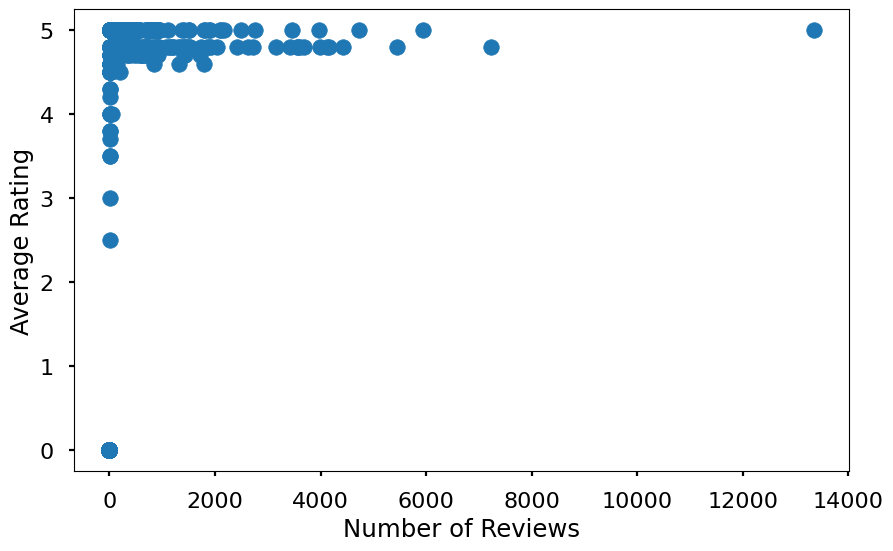

In [ ]:
# @title Average Rating vs Number of Reviews

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(data_df['n_review'], data_df['avg_rating'])
plt.xlabel('Number of Reviews')
_ = plt.ylabel('Average Rating')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           840 non-null    object 
 1   authors         721 non-null    object 
 2   original_price  840 non-null    int64  
 3   current_price   840 non-null    int64  
 4   quantity        820 non-null    float64
 5   catagory        840 non-null    object 
 6   n_review        840 non-null    int64  
 7   avg_rating      840 non-null    float64
 8   pages           736 non-null    float64
 9   manufacturer    833 non-null    object 
 10  cover_link      840 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 72.3+ KB


In [ ]:
id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


Data Preparation

3.1 Handle Value and Missing Data

In [ ]:
data_df.isnull().sum()

,0
title,0
authors,119
original_price,0
current_price,0
quantity,20
catagory,0
n_review,0
avg_rating,0
pages,104
manufacturer,7


In [ ]:
data_df = data_df.drop_duplicates(subset=['title'])

In [ ]:
data_df.authors.value_counts()

,count
authors,
Nhiều tác giả,17
nhieu tac gia,16
Nguyễn Nhật Ánh,11
.,7
Yoshichi Shimada,6
...,...
Benjamin Graham,1
Song Hong Bing,1
Svetlana Alexievich,1


In [ ]:
data_df.loc[data_df.authors == '.' , 'authors'] = "Unknown"

In [ ]:
data_df.authors.value_counts()

,count
authors,
Nhiều tác giả,17
nhieu tac gia,16
Nguyễn Nhật Ánh,11
Unknown,7
Yoshichi Shimada,6
...,...
Benjamin Graham,1
Song Hong Bing,1
Svetlana Alexievich,1


In [ ]:
data_df.authors = data_df.authors.fillna("Unknown")

Quantity

In [ ]:
data_df.quantity = data_df.quantity.fillna(np.mean(data_df.quantity))

Category

In [ ]:
print(data_df.columns)

Index(['title', 'authors', 'original_price', 'current_price', 'quantity',
       'catagory', 'n_review', 'avg_rating', 'pages', 'manufacturer',
       'cover_link'],
      dtype='object')


In [ ]:
data_df.catagory.value_counts()

,count
catagory,
Sách tư duy - Kỹ năng sống,151
Sách Giáo Khoa Cấp 3,49
Truyện ngắn - Tản văn - Tạp Văn,46
Tiểu Thuyết,38
Sách kỹ năng mềm,30
...,...
Dragon Ball Full Color - Phần Sáu: Ma Buu Tập 5,1
Combo Thám Tử Lừng Danh Conan Tập 11 - 20 (Bộ 10 cuốn),1
Dragon Ball Full Color - Phần Sáu: Ma Buu Tập 4,1


In [ ]:
keeping_values = list(pd.DataFrame(data_df.catagory.value_counts()[1:30]).T.columns)
keeping_values

['Sách Giáo Khoa Cấp 3',
 'Truyện ngắn - Tản văn - Tạp Văn',
 'Tiểu Thuyết',
 'Sách kỹ năng mềm',
 'Tác phẩm kinh điển',
 'Bài học kinh doanh',
 'Kiến thức - Bách khoa',
 'Sách kỹ năng làm việc',
 'Sách Học Tiếng Anh',
 'Truyện trinh thám',
 'Sách tài chính',
 'Lĩnh vực khác',
 'Sách quản trị, lãnh đạo',
 'Phật giáo',
 'Sách Marketing - Bán hàng ',
 'Kiến Thức Bách Khoa',
 'Cẩm nang làm cha mẹ',
 'Tiểu sử - Hồi ký',
 'Truyện dài',
 'Văn học thiếu nhi',
 'Truyện Giả tưởng - Huyền Bí - Phiêu Lưu',
 'Sách Học Tiếng Hoa',
 'Triết Học',
 'Sách khởi nghiệp',
 'Sách kinh tế học',
 'Sách Y Học Khác',
 'Sách giáo dục',
 'Sách Y Học Hiện Đại',
 'Sách Giáo Khoa Cấp 1']

In [ ]:
def handle_category(catagory):
    if catagory not in keeping_values:
        return "Others"
    return catagory

data_df.catagory = data_df.catagory.apply(lambda catagory: handle_category(catagory))

In [ ]:
def handle_pages(lst_pages):
    lst_int = []
    for page in lst_pages:
        try:
            lst_int.append(int(page))
        except:
            continue

    return np.mean(lst_int)

mean_pages = handle_pages(list(data_df.pages))

In [ ]:
data_df.pages = data_df.pages.fillna(str(mean_pages))

In [ ]:
# There is one product having the value of pages is "Cuốn".
data_df.query('pages == "Cuốn"')

,title,authors,original_price,current_price,quantity,catagory,n_review,avg_rating,pages,manufacturer,cover_link


In [ ]:
data_df = data_df.query('pages != "Cuốn"')

In [ ]:
data_df.pages = data_df.pages.apply(lambda page: round(float(page)))
data_df.pages = data_df.pages.astype("int64")

In [ ]:
data_df.pages.describe()

,pages
count,834.000000
mean,901.714628
std,14740.459456
min,14.000000
25%,204.000000
50%,312.000000
75%,464.000000
max,426000.000000


In [ ]:
data_df[data_df.pages > 3000]

,title,authors,original_price,current_price,quantity,catagory,n_review,avg_rating,pages,manufacturer,cover_link
414,Combo Dr. Slump Ultimate Edition: Từ Tập 1 Đến...,Akira Toriyama,900000,898000,1.0,Others,0,0.0,3780,Nhà Xuất Bản Kim Đồng,https://salt.tikicdn.com/ts/product/e1/aa/9e/5...
786,Luật Đất Đại Năm 2024,Quốc hội,90000,90000,40.0,Others,3,5.0,426000,Nhà Xuất Bản Lao Động,https://salt.tikicdn.com/ts/product/1d/c5/39/2...


In [ ]:
data_df = data_df.query('pages < 3000')

In [ ]:
data_df.manufacturer.value_counts()

,count
manufacturer,
Nhà Xuất Bản Thế Giới,113
NXB Trẻ,81
Nhà Xuất Bản Tổng hợp TP.HCM,69
Nhà Xuất Bản Dân Trí,68
Nhà Xuất Bản Văn Học,67
Nhà Xuất Bản Hội Nhà Văn,53
Nhà Xuất Bản Giáo Dục Việt Nam,52
Nhà Xuất Bản Thanh Niên,46
Nhà Xuất Bản Kim Đồng,45


Group

In [ ]:
def handle_manufactuner(manufactuner):
    if manufactuner == "hong duc":
        return "Nhà Xuất Bản Hồng Đức"
    elif manufactuner == "NXB Dân Trí":
        return "Nhà Xuất Bản Dân Trí"
    elif manufactuner == "ĐHQG Hà Nội":
        return "Nhà Xuất Bản Đại Học Quốc Gia Hà Nội"
    else:
        return manufactuner

data_df.manufacturer = data_df.manufacturer.apply(lambda manufacturer: handle_manufactuner(manufacturer))

hander miss value

In [ ]:
data_df.manufacturer = data_df.manufacturer.fillna("Unknown")

In [ ]:
data_df.head()

,title,authors,original_price,current_price,quantity,catagory,n_review,avg_rating,pages,manufacturer,cover_link
0,Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C...,Unknown,199000,169000,13154.0,Sách tài chính,244,5.0,268,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/a9/44/6b/f...
1,Sách Combo 2 Cuốn : Tư Duy Ngược + Tư Duy Mở (...,Nguyễn Anh Dũng,276000,138000,2470.0,Others,120,4.8,452,Nhà Xuất Bản Văn Học,https://salt.tikicdn.com/ts/product/48/ec/9b/6...
2,Combo Tư Duy Ngược + Tư Duy Mở (Nguyễn Anh Dũn...,Nguyễn Anh Dũng,276000,135000,1293.0,Others,53,4.7,416,Nhà Xuất Bản Dân Trí,https://salt.tikicdn.com/ts/product/48/ec/9b/c...
3,Búp Sen Xanh,Sơn Tùng,72000,61200,1254.0,Others,76,5.0,444,Nhà Xuất Bản Kim Đồng,https://salt.tikicdn.com/ts/product/9e/62/cc/e...
4,Sưởi Ấm Mặt Trời: Tập 2 Của Cây Cam Ngọt,José Mauro de Vasconcelos,160000,124000,816.0,Truyện dài,37,5.0,376,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/be/b3/b6/7...


create new collum


In [ ]:
data_df['discount'] = round(1 - data_df['current_price']/data_df['original_price'],2)

In [ ]:
def convert_to_usd(vietnamdong):
    usd = vietnamdong/23700
    usd = round(usd, 2)

    return usd

data_df.original_price = data_df.original_price.apply(lambda vietnamdong: convert_to_usd(vietnamdong))
data_df.current_price = data_df.current_price.apply(lambda vietnamdong: convert_to_usd(vietnamdong))

3.2 Change Datatype

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 839
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           832 non-null    object 
 1   authors         832 non-null    object 
 2   original_price  832 non-null    float64
 3   current_price   832 non-null    float64
 4   quantity        832 non-null    float64
 5   catagory        832 non-null    object 
 6   n_review        832 non-null    int64  
 7   avg_rating      832 non-null    float64
 8   pages           832 non-null    int64  
 9   manufacturer    832 non-null    object 
 10  cover_link      832 non-null    object 
 11  discount        832 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 84.5+ KB


In [ ]:
data_df.title = data_df.title.astype("string")
data_df.authors = data_df.authors.astype("string")
data_df.catagory = data_df.catagory.astype("string")
data_df.manufacturer = data_df.manufacturer.astype("string")
data_df.cover_link = data_df.cover_link.astype("string")

data_df.quantity = data_df.quantity.apply(lambda quantity: round(float(quantity)))
data_df.quantity = data_df.quantity.astype("int64")

save file

In [ ]:
data_df.to_csv("prepared_data_book.csv")

4. Exploratory Data Analysis (EDA)

In [ ]:
data_df.head(1)

,title,authors,original_price,current_price,quantity,catagory,n_review,avg_rating,pages,manufacturer,cover_link,discount
0,Kế Toán Vỉa Hè - Thực Hành Báo Cáo Tài Chính C...,Unknown,8.4,7.13,13154,Sách tài chính,244,5.0,268,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/a9/44/6b/f...,0.15


Let create a new dataset to visualization easily.

In [ ]:
eda_df = data_df.drop(['product_id', 'cover_link'], axis=1, errors='ignore')

4.1 Data Overviewing

<ipython-input-65-bce33aae70b6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(eda_df.original_price, color='gray', shade=True, label='Original')
<ipython-input-65-bce33aae70b6>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(eda_df.current_price, color='g', shade=True, label='Current')


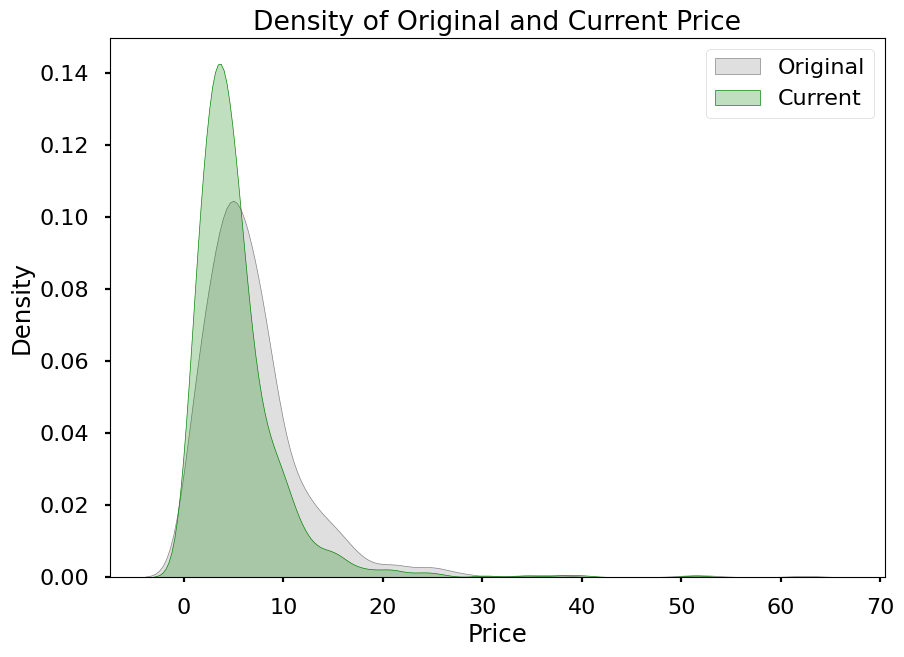

In [ ]:
fig = plt.subplots(figsize=(10, 7))

ax = sns.kdeplot(eda_df.original_price, color='gray', shade=True, label='Original')
ax = sns.kdeplot(eda_df.current_price, color='g', shade=True, label='Current')

plt.xlabel('Price')
plt.title('Density of Original and Current Price')
plt.legend()
plt.show()

Discount per Category

In [ ]:
eda_df.groupby('catagory').discount.mean()

,discount
catagory,
Bài học kinh doanh,0.241739
Cẩm nang làm cha mẹ,0.251667
Kiến Thức Bách Khoa,0.226667
Kiến thức - Bách khoa,0.214286
Lĩnh vực khác,0.234375
Others,0.217791
Phật giáo,0.279231
Sách Giáo Khoa Cấp 1,0.014286
Sách Giáo Khoa Cấp 3,0.000000


Quantity per Category All of Time

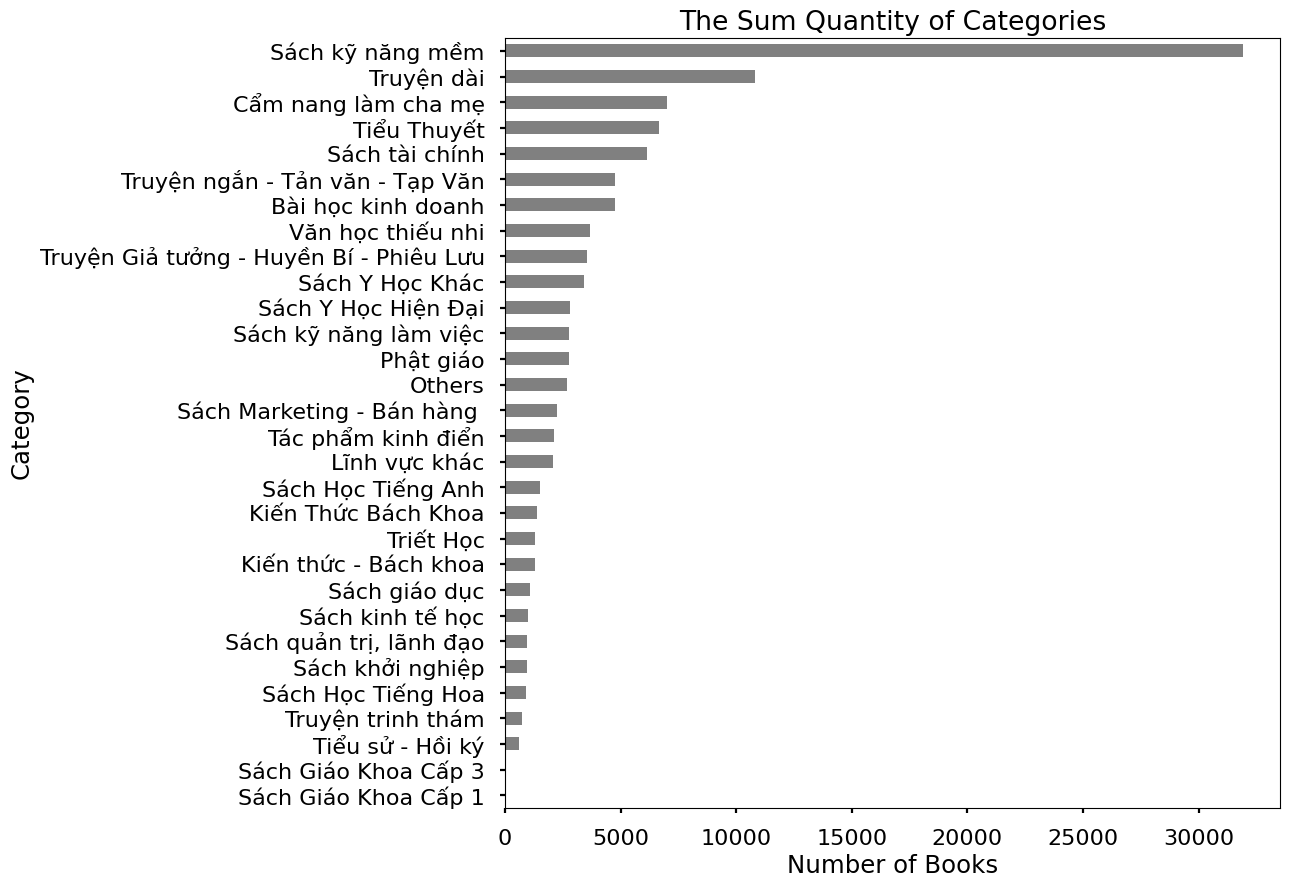

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('catagory').quantity.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.title('The Sum Quantity of Categories')
plt.show()

Rating per Category

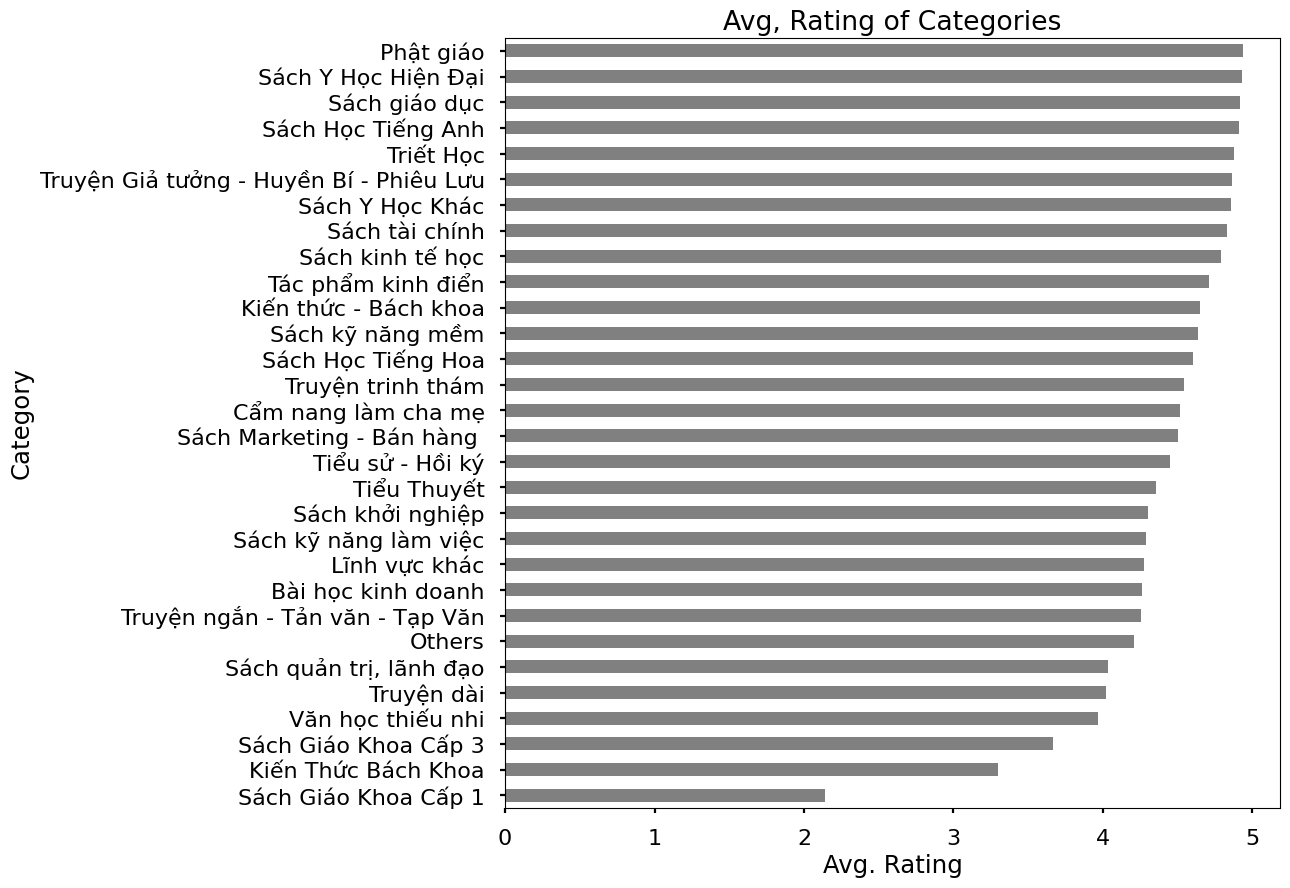

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax=eda_df.groupby('catagory').avg_rating.mean().sort_values(ascending=True).plot(kind='barh', color='gray')

plt.xlabel('Avg. Rating')
plt.ylabel('Category')
plt.title('Avg, Rating of Categories')
plt.show()

4.2 EDA

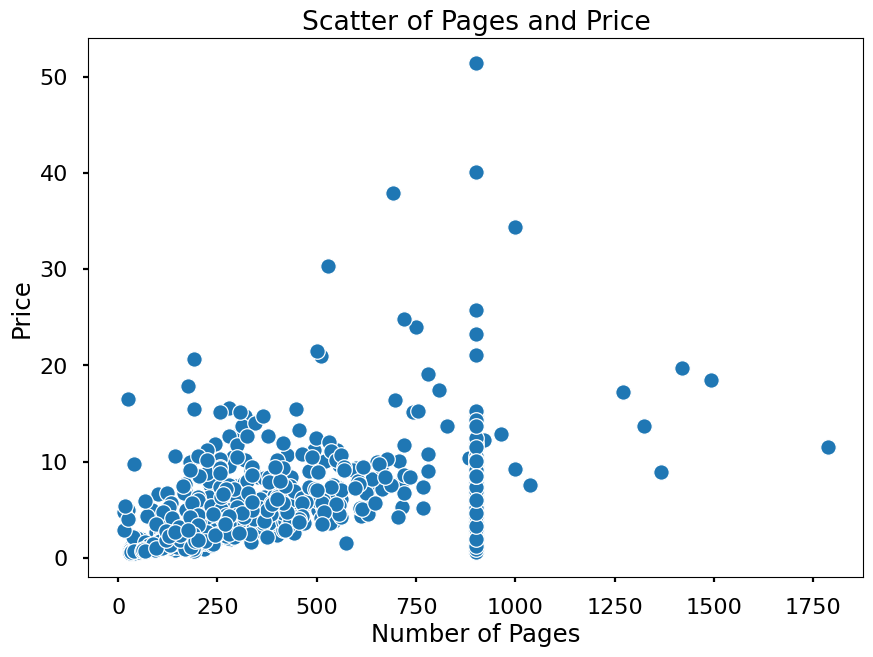

In [ ]:
fig = plt.subplots(figsize=(10, 7))

ax=sns.scatterplot(data=eda_df, x='pages', y='current_price')#, color="",color_continuous_scale='RdBu_r')

plt.xlabel('Number of Pages')
plt.ylabel('Price')
plt.title('Scatter of Pages and Price')
plt.show()